In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Command to tell Python to actually display the graphs
%matplotlib inline

# this library contains a large number of probability distributions as well as a growing library of statistical functions
import scipy.stats as stats  

### NOTES I

In [2]:
# READ DATASET
df = pd.read_excel('PD_modelling_dataset.xlsx')

#### Checking Top 5 rows

In [3]:
df.head()

userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0  4567129.0      0.0                    0.0                     0.0   
1  2635118.0      0.0                    0.0                     0.0   
2  4804232.0      0.0                    0.0                     0.0   
3  1442693.0      0.0                    0.0                     NaN   
4  4575322.0      0.0                    0.0                     0.0   

   acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      NaN                       NaN   
4                      0.0                       0.0   

   acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                               0.0          1.0                     1.0   
1                               NaN          1.0                     1.0   
2                               NaN          NaN                     NaN   
3                               NaN          NaN                     NaN   
4                               NaN          NaN                     NaN   

   acct_worst_status_12_24m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
0                       NaN  ...                14.0                 0.0   
1                       1.0  ...                19.0                 3.0   
2                       NaN  ...                 0.0                 3.0   
3                       NaN  ...                21.0                 0.0   
4                       NaN  ...                 0.0                 0.0   

   status_max_archived_0_6_months  status_max_archived_0_12_months  \
0                             1.0                              1.0   
1                             1.0                              2.0   
2                             1.0                              2.0   
3                             1.0                              1.0   
4                             1.0                              1.0   

   status_max_archived_0_24_months recovery_debt sum_capital_paid_acct_0_12m  \
0                              1.0           0.0                         0.0   
1                              2.0           0.0                         0.0   
2                              2.0           0.0                         0.0   
3                              1.0           0.0                         0.0   
4                              1.0           0.0                         0.0   

   sum_capital_paid_acct_12_24m  sum_paid_inv_0_12m  time_hours  
0                           0.0            178839.0    9.653333  
1                           0.0             49014.0   13.181389  
2                           0.0            124839.0   11.561944  
3                           0.0            324676.0   15.751111  
4                           0.0              7100.0   12.698611  

[5 rows x 36 columns]

#### Checking last 5 rows

In [4]:
df.tail()

userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
99974  4648093.0      NaN                56102.0                     0.0   
99975  1247657.0      NaN                    0.0                     0.0   
99976        NaN      NaN                    NaN                     NaN   
99977        NaN      NaN                    NaN                     NaN   
99978        0.0  10000.0                    0.0                 11836.0   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
99974                      0.0                       0.0   
99975                      0.0                       0.0   
99976                      NaN                       NaN   
99977                      NaN                       NaN   
99978                  11836.0                   11836.0   

       acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
99974                          0.064175          1.0                     2.0   
99975                               NaN          1.0                     1.0   
99976                               NaN          NaN                     NaN   
99977                               NaN          NaN                     NaN   
99978                      59315.000000      54373.0                 54373.0   

       acct_worst_status_12_24m  ...  num_arch_ok_12_24m  num_arch_rem_0_12m  \
99974                       1.0  ...                 1.0                 0.0   
99975                       NaN  ...                 2.0                 1.0   
99976                       NaN  ...                 NaN                 NaN   
99977                       NaN  ...                 NaN                 NaN   
99978                   66761.0  ...                 0.0                 0.0   

       status_max_archived_0_6_months  status_max_archived_0_12_months  \
99974                             1.0                              1.0   
99975                             2.0                              2.0   
99976                             NaN                              NaN   
99977                             NaN                              NaN   
99978                             0.0                              0.0   

       status_max_archived_0_24_months recovery_debt  \
99974                              1.0           0.0   
99975                              2.0           0.0   
99976                              NaN           NaN   
99977                              NaN           NaN   
99978                              0.0           0.0   

      sum_capital_paid_acct_0_12m  sum_capital_paid_acct_12_24m  \
99974                     18339.0                       56180.0   
99975                         0.0                           0.0   
99976                         NaN                           NaN   
99977                         NaN                           NaN   
99978                         0.0                           0.0   

       sum_paid_inv_0_12m  time_hours  
99974             34785.0    9.725278  
99975             30602.0   11.585278  
99976                 NaN         NaN  
99977                 NaN         NaN  
99978                 0.0    0.000000  

[5 rows x 36 columns]

In [5]:
df.drop(['userid'],axis='columns', inplace=True)
df.head()

default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0      0.0                    0.0                     0.0   
1      0.0                    0.0                     0.0   
2      0.0                    0.0                     0.0   
3      0.0                    0.0                     NaN   
4      0.0                    0.0                     0.0   

   acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      NaN                       NaN   
4                      0.0                       0.0   

   acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                               0.0          1.0                     1.0   
1                               NaN          1.0                     1.0   
2                               NaN          NaN                     NaN   
3                               NaN          NaN                     NaN   
4                               NaN          NaN                     NaN   

   acct_worst_status_12_24m  acct_worst_status_3_6m  ...  num_arch_ok_12_24m  \
0                       NaN                     1.0  ...                14.0   
1                       1.0                     1.0  ...                19.0   
2                       NaN                     NaN  ...                 0.0   
3                       NaN                     NaN  ...                21.0   
4                       NaN                     NaN  ...                 0.0   

   num_arch_rem_0_12m  status_max_archived_0_6_months  \
0                 0.0                             1.0   
1                 3.0                             1.0   
2                 3.0                             1.0   
3                 0.0                             1.0   
4                 0.0                             1.0   

   status_max_archived_0_12_months status_max_archived_0_24_months  \
0                              1.0                             1.0   
1                              2.0                             2.0   
2                              2.0                             2.0   
3                              1.0                             1.0   
4                              1.0                             1.0   

  recovery_debt  sum_capital_paid_acct_0_12m  sum_capital_paid_acct_12_24m  \
0           0.0                          0.0                           0.0   
1           0.0                          0.0                           0.0   
2           0.0                          0.0                           0.0   
3           0.0                          0.0                           0.0   
4           0.0                          0.0                           0.0   

   sum_paid_inv_0_12m time_hours  
0            178839.0   9.653333  
1             49014.0  13.181389  
2            124839.0  11.561944  
3            324676.0  15.751111  
4              7100.0  12.698611  

[5 rows x 35 columns]

#### Shape of Dataset

In [6]:
# To print number of rows and columns present in the dataset
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 99979
Number of columns: 35


#### Checking basic info about all Columns

In [7]:
#data types and statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99979 entries, 0 to 99978
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   default                           89977 non-null  float64
 1   acct_amt_added_12_24m             99977 non-null  float64
 2   acct_days_in_dc_12_24m            88141 non-null  float64
 3   acct_days_in_rem_12_24m           88141 non-null  float64
 4   acct_days_in_term_12_24m          88141 non-null  float64
 5   acct_incoming_debt_vs_paid_0_24m  40662 non-null  float64
 6   acct_status                       45604 non-null  float64
 7   acct_worst_status_0_3m            45604 non-null  float64
 8   acct_worst_status_12_24m          33216 non-null  float64
 9   acct_worst_status_3_6m            42275 non-null  float64
 10  acct_worst_status_6_12m           39627 non-null  float64
 11  age                               99977 non-null  float64
 12  avg_

#### We can see that out of 35 columns, 3 are of "object" datatype namely 'merchant_category', 'merchant_group' and 'name_in_email' while the other 32 columns are all numeric in nature having "float64" as datatype.

### DUPLICATE VALUES

In [8]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 2806


default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
408        0.0                    0.0                     0.0   
735        0.0                    0.0                     0.0   
1058       0.0                    0.0                     0.0   
1073       0.0                    0.0                     0.0   
1109       0.0                    0.0                     0.0   
...        ...                    ...                     ...   
99509      NaN                    0.0                     0.0   
99639      NaN                    0.0                     0.0   
99662      NaN                    0.0                     0.0   
99892      NaN                    0.0                     0.0   
99977      NaN                    NaN                     NaN   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
408                        0.0                       0.0   
735                        0.0                       0.0   
1058                       0.0                       0.0   
1073                       0.0                       0.0   
1109                       0.0                       0.0   
...                        ...                       ...   
99509                      0.0                       0.0   
99639                      0.0                       0.0   
99662                      0.0                       0.0   
99892                      0.0                       0.0   
99977                      NaN                       NaN   

       acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
408                                 NaN          NaN                     NaN   
735                                 NaN          NaN                     NaN   
1058                                NaN          NaN                     NaN   
1073                                NaN          NaN                     NaN   
1109                                NaN          NaN                     NaN   
...                                 ...          ...                     ...   
99509                               NaN          NaN                     NaN   
99639                               NaN          NaN                     NaN   
99662                               NaN          NaN                     NaN   
99892                               NaN          NaN                     NaN   
99977                               NaN          NaN                     NaN   

       acct_worst_status_12_24m  acct_worst_status_3_6m  ...  \
408                         NaN                     NaN  ...   
735                         NaN                     NaN  ...   
1058                        NaN                     NaN  ...   
1073                        NaN                     NaN  ...   
1109                        NaN                     NaN  ...   
...                         ...                     ...  ...   
99509                       NaN                     NaN  ...   
99639                       NaN                     NaN  ...   
99662                       NaN                     NaN  ...   
99892                       NaN                     NaN  ...   
99977                       NaN                     NaN  ...   

       num_arch_ok_12_24m  num_arch_rem_0_12m  status_max_archived_0_6_months  \
408                   NaN                 NaN                             NaN   
735                   NaN                 NaN                             NaN   
1058                  NaN                 NaN                             NaN   
1073                  NaN                 NaN                             NaN   
1109                  NaN                 NaN                             NaN   
...                   ...                 ...                             ...   
99509                 NaN                 NaN                             NaN   
99639                 NaN                 NaN                             NaN   
99662                 NaN                 NaN 

In [9]:
df.isnull().sum().sum()

700139

In [10]:
total_missing = df.isnull().sum().sum()
total_entries = df.size
percentage_missing = (total_missing / total_entries) * 100
print(f"Total percentage of missing values: {percentage_missing:.2f}%")

Total percentage of missing values: 20.01%


In [11]:
total_complete = df.notnull().sum().sum()
total_entries = df.size
percentage_complete = (total_complete / total_entries) * 100
print(f"Total percentage of complete values: {percentage_complete:.2f}%")

Total percentage of complete values: 79.99%


### STATISTICS DATA

In [12]:
pd.set_option('display.float_format','{:.2f}'.format)
df.describe(include='all').T

count unique                        top  \
default                          89977.00    NaN                        NaN   
acct_amt_added_12_24m            99977.00    NaN                        NaN   
acct_days_in_dc_12_24m           88141.00    NaN                        NaN   
acct_days_in_rem_12_24m          88141.00    NaN                        NaN   
acct_days_in_term_12_24m         88141.00    NaN                        NaN   
acct_incoming_debt_vs_paid_0_24m 40662.00    NaN                        NaN   
acct_status                      45604.00    NaN                        NaN   
acct_worst_status_0_3m           45604.00    NaN                        NaN   
acct_worst_status_12_24m         33216.00    NaN                        NaN   
acct_worst_status_3_6m           42275.00    NaN                        NaN   
acct_worst_status_6_12m          39627.00    NaN                        NaN   
age                              99977.00    NaN                        NaN   
avg_payment_span_0_12m           76141.00    NaN                        NaN   
avg_payment_span_0_3m            50672.00    NaN                        NaN   
merchant_category                   99977     58  Diversified entertainment   
merchant_group                      99968     13              Entertainment   
has_paid                         88943.00    NaN                        NaN   
max_paid_inv_0_12m               88943.00    NaN                        NaN   
max_paid_inv_0_24m               88943.00    NaN                        NaN   
name_in_email                       88943      9                        F+L   
num_active_div_by_paid_inv_0_12m 70052.00    NaN                        NaN   
num_active_inv                   88943.00    NaN                        NaN   
num_arch_dc_0_12m                88943.00    NaN                        NaN   
num_arch_dc_12_24m               88943.00    NaN                        NaN   
num_arch_ok_0_12m                88943.00    NaN                        NaN   
num_arch_ok_12_24m               88943.00    NaN                        NaN   
num_arch_rem_0_12m               88943.00    NaN                        NaN   
status_max_archived_0_6_months   88943.00    NaN                        NaN   
status_max_archived_0_12_months  88943.00    NaN                        NaN   
status_max_archived_0_24_months  88943.00    NaN                        NaN   
recovery_debt                    88943.00    NaN                        NaN   
sum_capital_paid_acct_0_12m      88943.00    NaN                        NaN   
sum_capital_paid_acct_12_24m     88943.00    NaN                        NaN   
sum_paid_inv_0_12m               88943.00    NaN                        NaN   
time_hours                       88943.00    NaN                        NaN   

                                   freq     mean      std  min     25%  \
default                             NaN     0.13    33.34 0.00    0.00   
acct_amt_added_12_24m               NaN 12255.03 35481.33 0.00    0.00   
acct_days_in_dc_12_24m              NaN     0.36    40.29 0.00    0.00   
acct_days_in_rem_12_24m             NaN     5.18    45.94 0.00    0.00   
acct_days_in_term_12_24m            NaN     0.42    39.97 0.00    0.00   
acct_incoming_debt_vs_paid_0_24m    NaN     2.79   295.33 0.00    0.00   
acct_status                         NaN     2.23   254.61 1.00    1.00   
acct_worst_status_0_3m              NaN     2.37   254.61 1.00    1.00   
acct_worst_status_12_24m            NaN     3.35   366.30 1.00    1.00   
acct_worst_status_3_6m              NaN     2.55   280.63 1.00    1.00   
acct_worst_status_6_12m             NaN     2.78   303.16 1.00    1.00   
age                                 NaN    36.02    13.00 0.00   25.00   
avg_payment_span_0_12m              NaN    18.28    87.25 0.00   10.80   
avg_payment_span_0_3m               NaN    15.96   219.21 0.00    8.40   
merchant_category                 38614      NaN      NaN  NaN     NaN   
merchan

### DROP DUPLICATE VALUES

In [13]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [14]:
cat = []
num = []
for i in df.columns:
  if df[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)
    
print(cat)
print(num)

['merchant_category', 'merchant_group', 'name_in_email']
['default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m', 'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m', 'acct_incoming_debt_vs_paid_0_24m', 'acct_status', 'acct_worst_status_0_3m', 'acct_worst_status_12_24m', 'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age', 'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'has_paid', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'num_active_div_by_paid_inv_0_12m', 'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m', 'status_max_archived_0_6_months', 'status_max_archived_0_12_months', 'status_max_archived_0_24_months', 'recovery_debt', 'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m', 'sum_paid_inv_0_12m', 'time_hours']


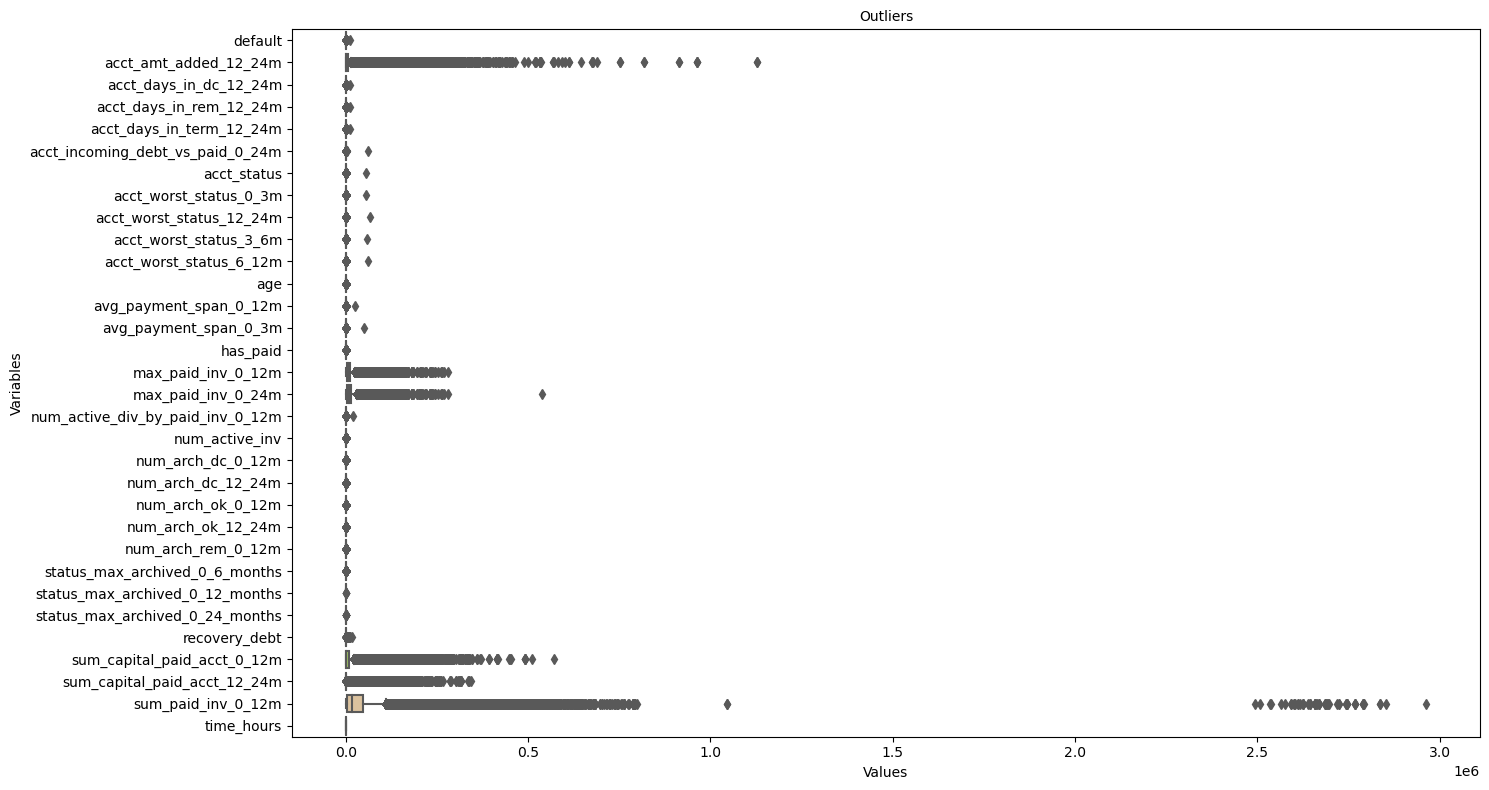

In [15]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Outliers', fontsize=10)
plt.xlabel('Values')
plt.ylabel('Variables')
plt.tight_layout()
plt.show();

## UNIVARIATE ANALYLSIS

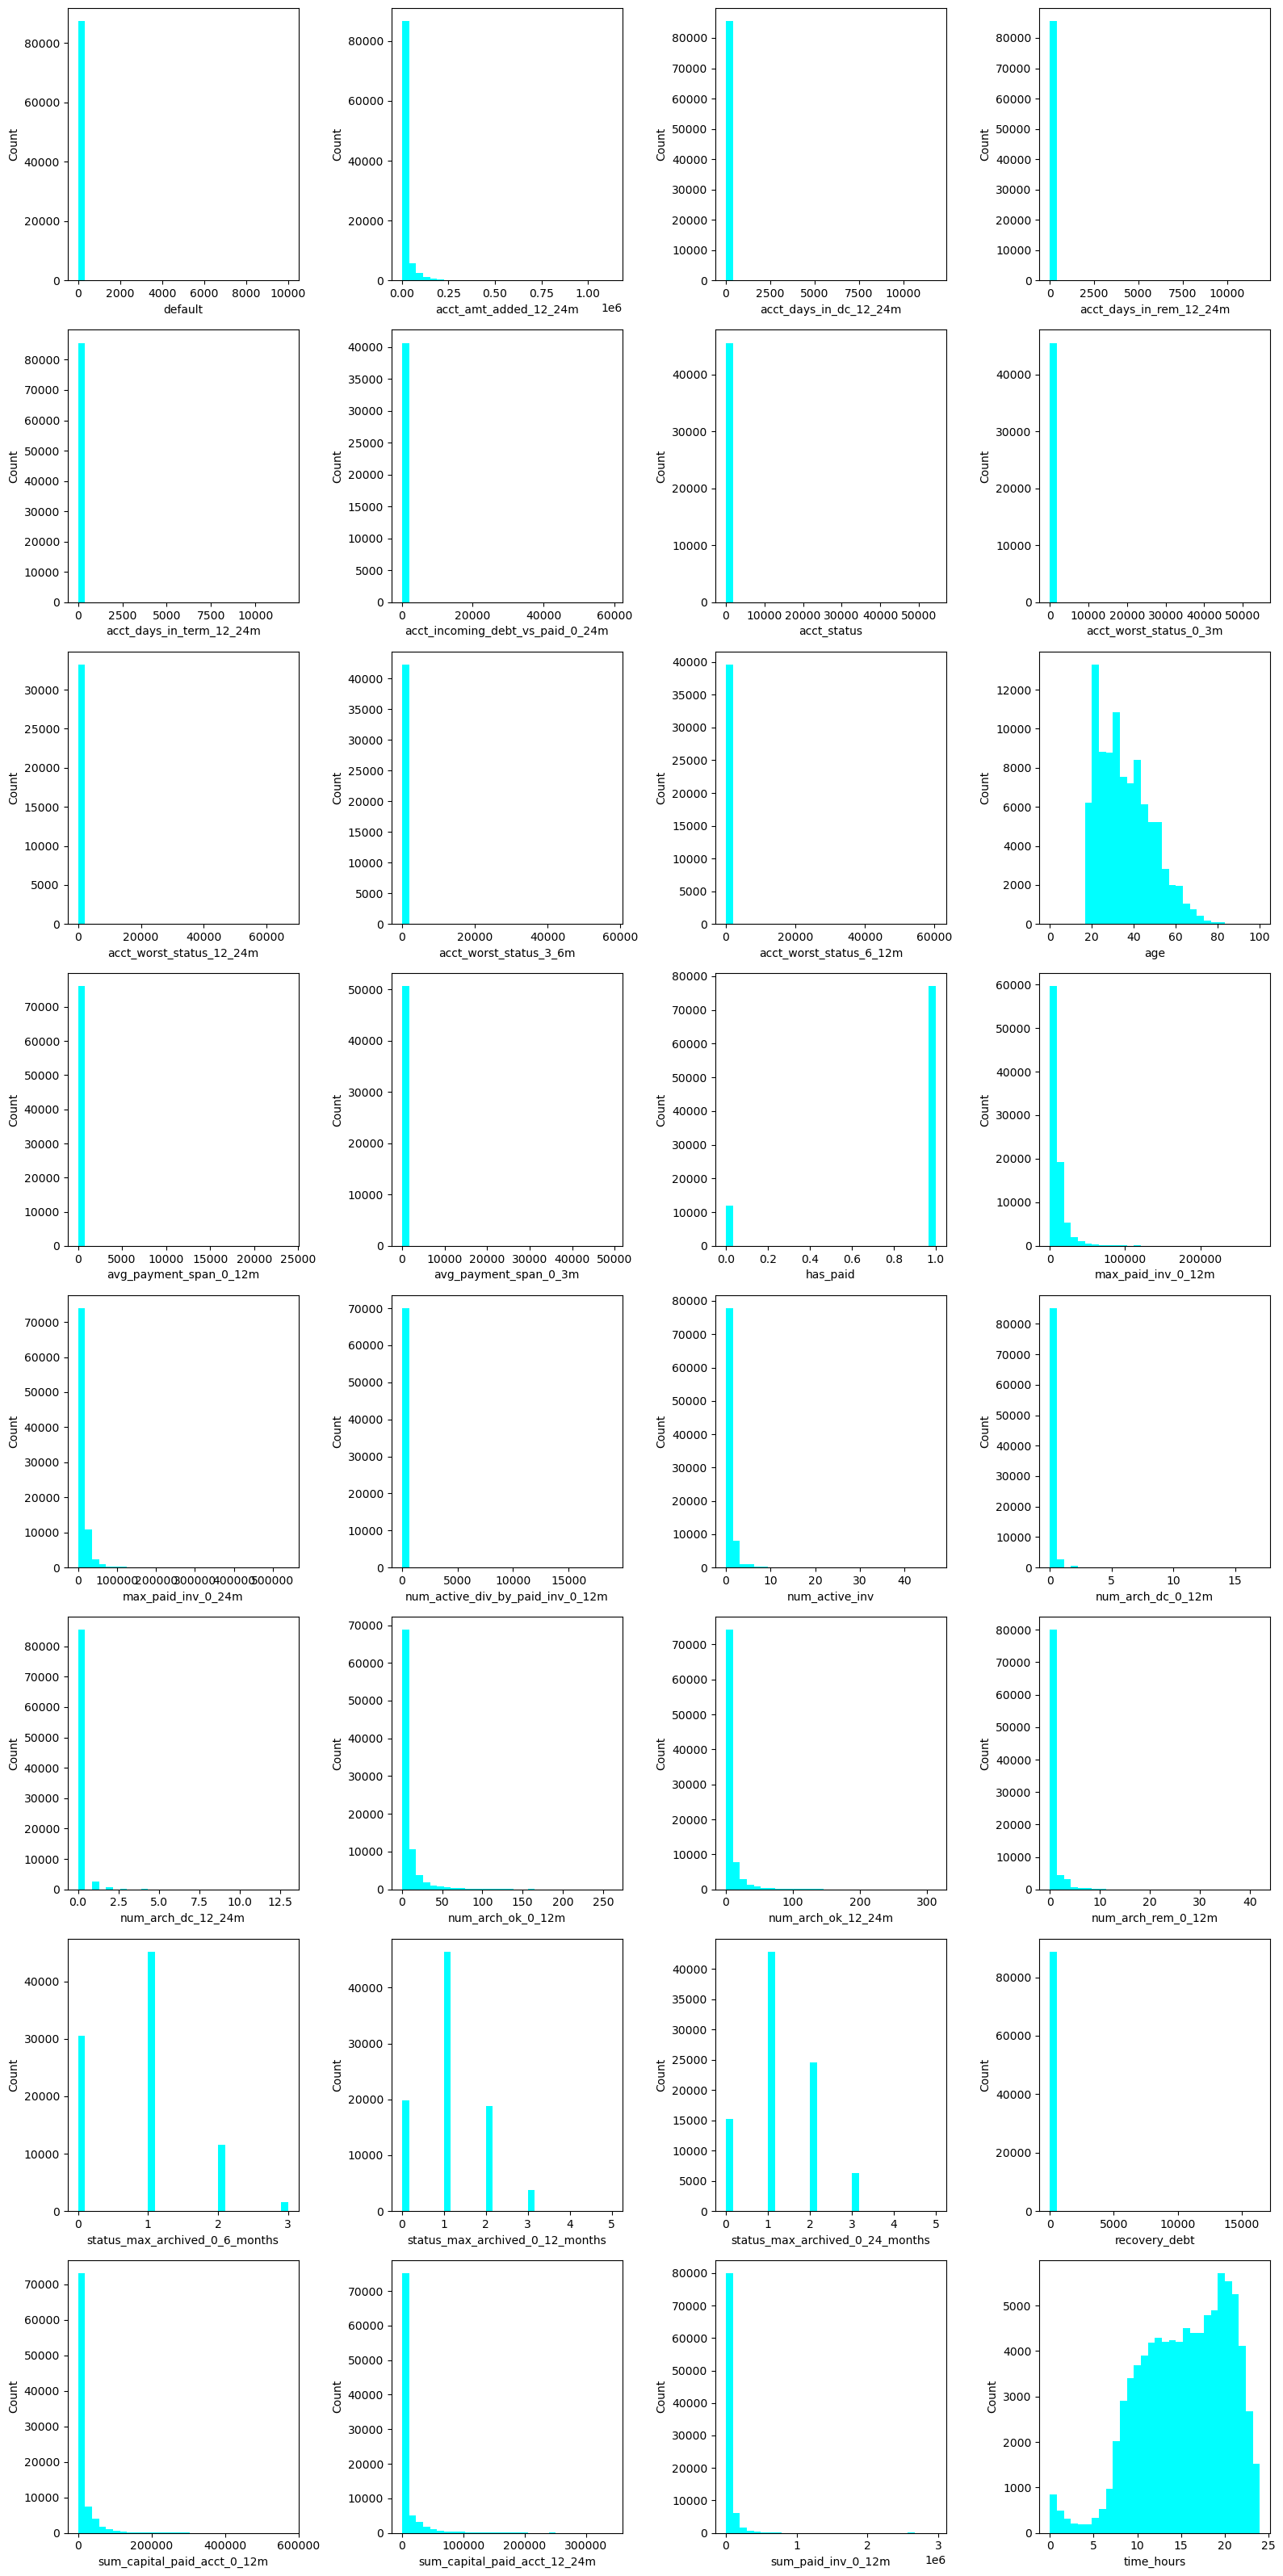

In [16]:
num_cols_per_row = 4
num_rows = (len(df.select_dtypes(include=['float64']).columns) + num_cols_per_row - 1) // num_cols_per_row
plt.figure(figsize=(16, num_rows * 4))
for i, column in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    df[column].plot(kind='hist', bins=30, color='cyan')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show();

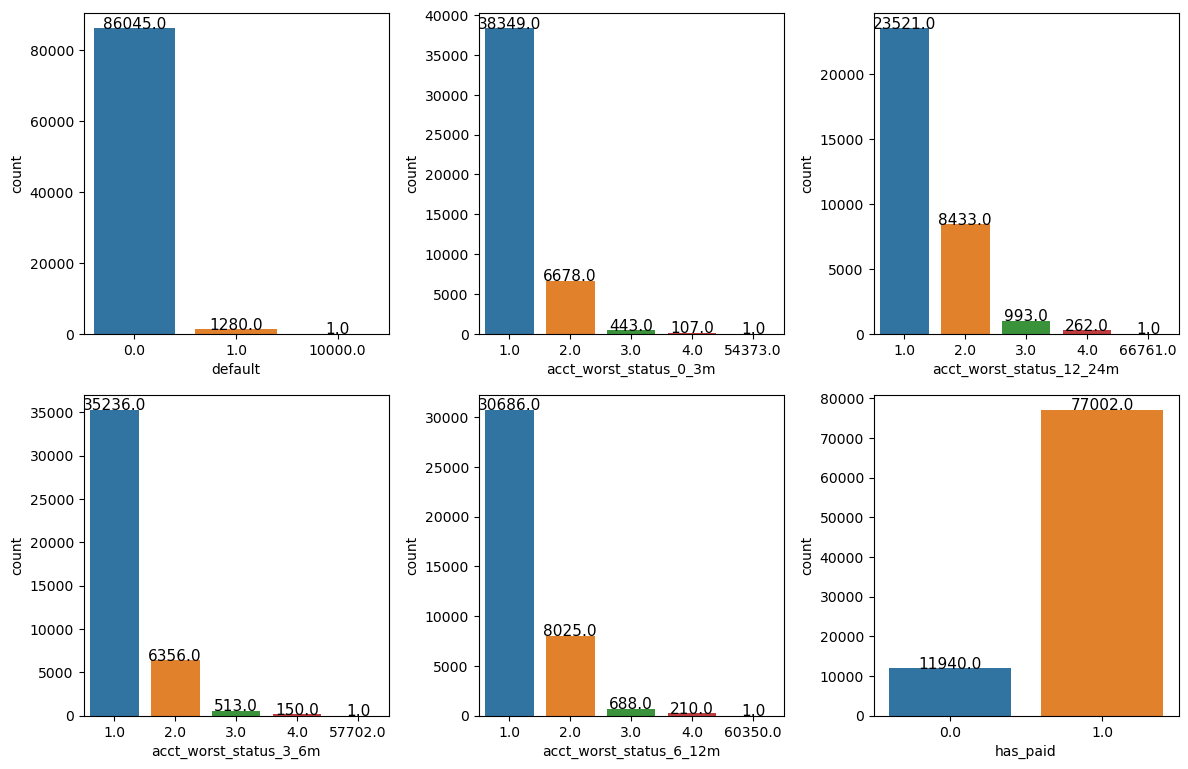

In [17]:
columns_to_count = ["default", "acct_worst_status_0_3m", 
                    "acct_worst_status_12_24m", "acct_worst_status_3_6m", 
                    "acct_worst_status_6_12m", "has_paid"]

plt.figure(figsize=(12, 15))  # Adjust the figure size as needed

for i, column in enumerate(columns_to_count, 1):
    ax = plt.subplot(4, 3, i) # Adjust the subplot parameters based on the number of columns
    sns.countplot(x=column, data=df)
    for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='baseline', fontsize=11, color='black')

plt.tight_layout()
plt.show();

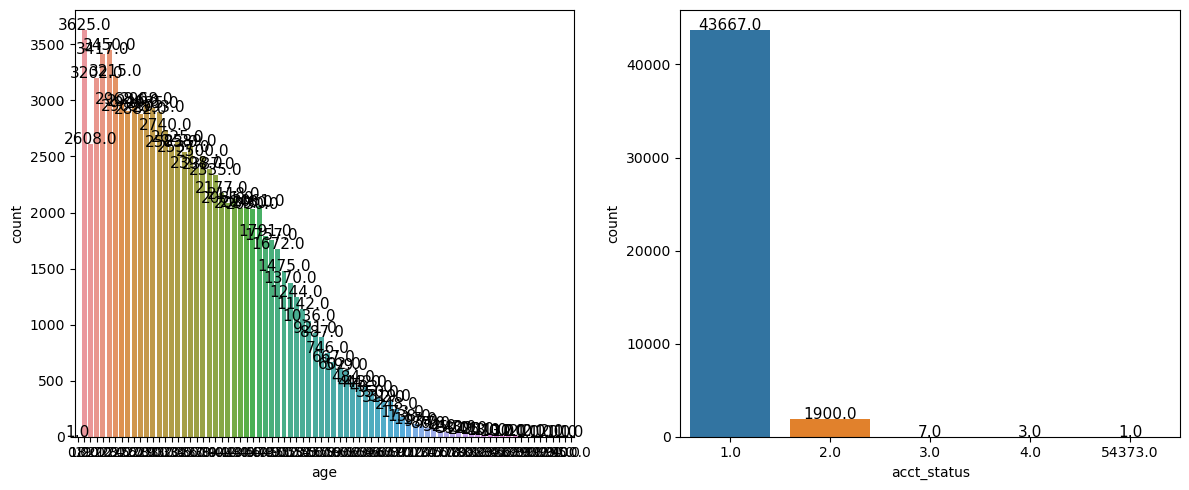

In [18]:
columns_to_count = ["age", "acct_status" ]

plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

for i, column in enumerate(columns_to_count, 1):
    ax = plt.subplot(1, 2, i) # Adjust the subplot parameters based on the number of columns
    sns.countplot(x=column, data=df)
    for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='baseline', fontsize=11, color='black')

plt.tight_layout()
plt.show();

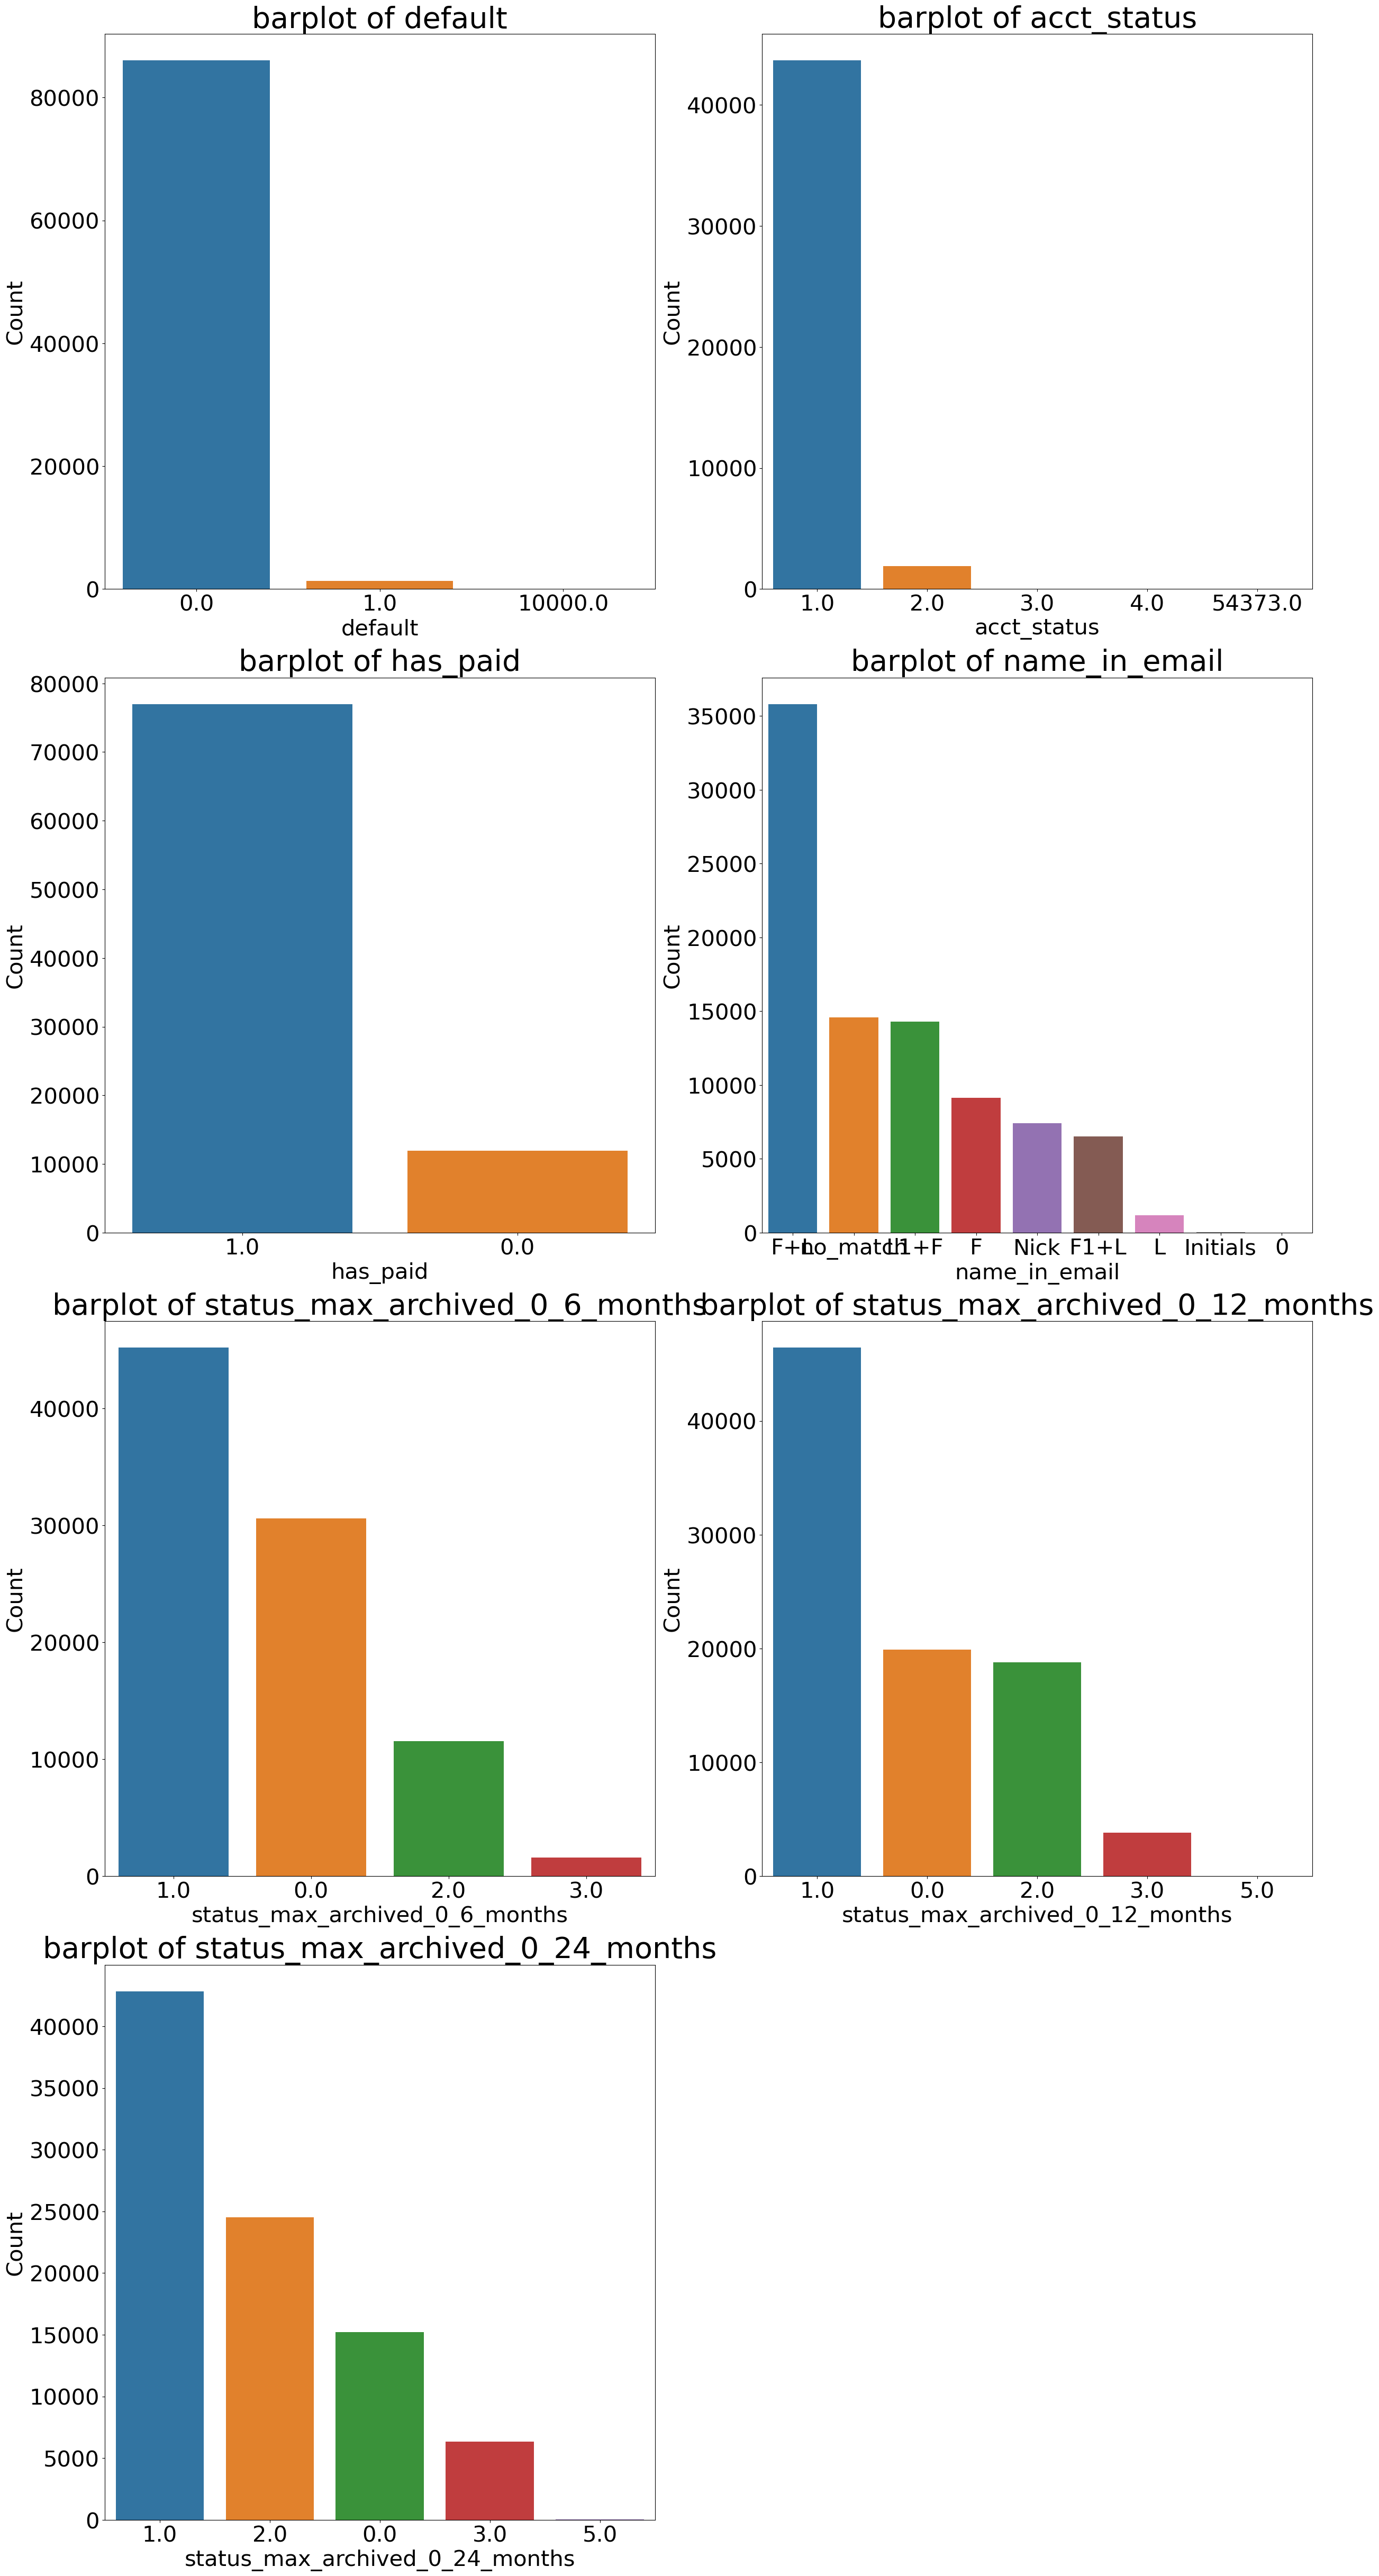

In [19]:
### Categorical 
cat = ['default','acct_status','has_paid','name_in_email','status_max_archived_0_6_months',
       'status_max_archived_0_12_months','status_max_archived_0_24_months']

#plt.figure(figsize=(26,20))
plt.figure(figsize=(25,60))
a=1
for i in cat:
    plt.subplot(5,2,a)
    a=a+1
    sns.countplot(data=df, x=df[i], order=df[i].value_counts().sort_values(ascending=False).index)
    plt.title('barplot of {}'.format(i), fontsize= 40)
    plt.xlabel(i, fontsize=30)
    plt.ylabel('Count', fontsize=30) 
    plt.tick_params(axis='both', which='both', labelsize=30) 
    plt.tight_layout()

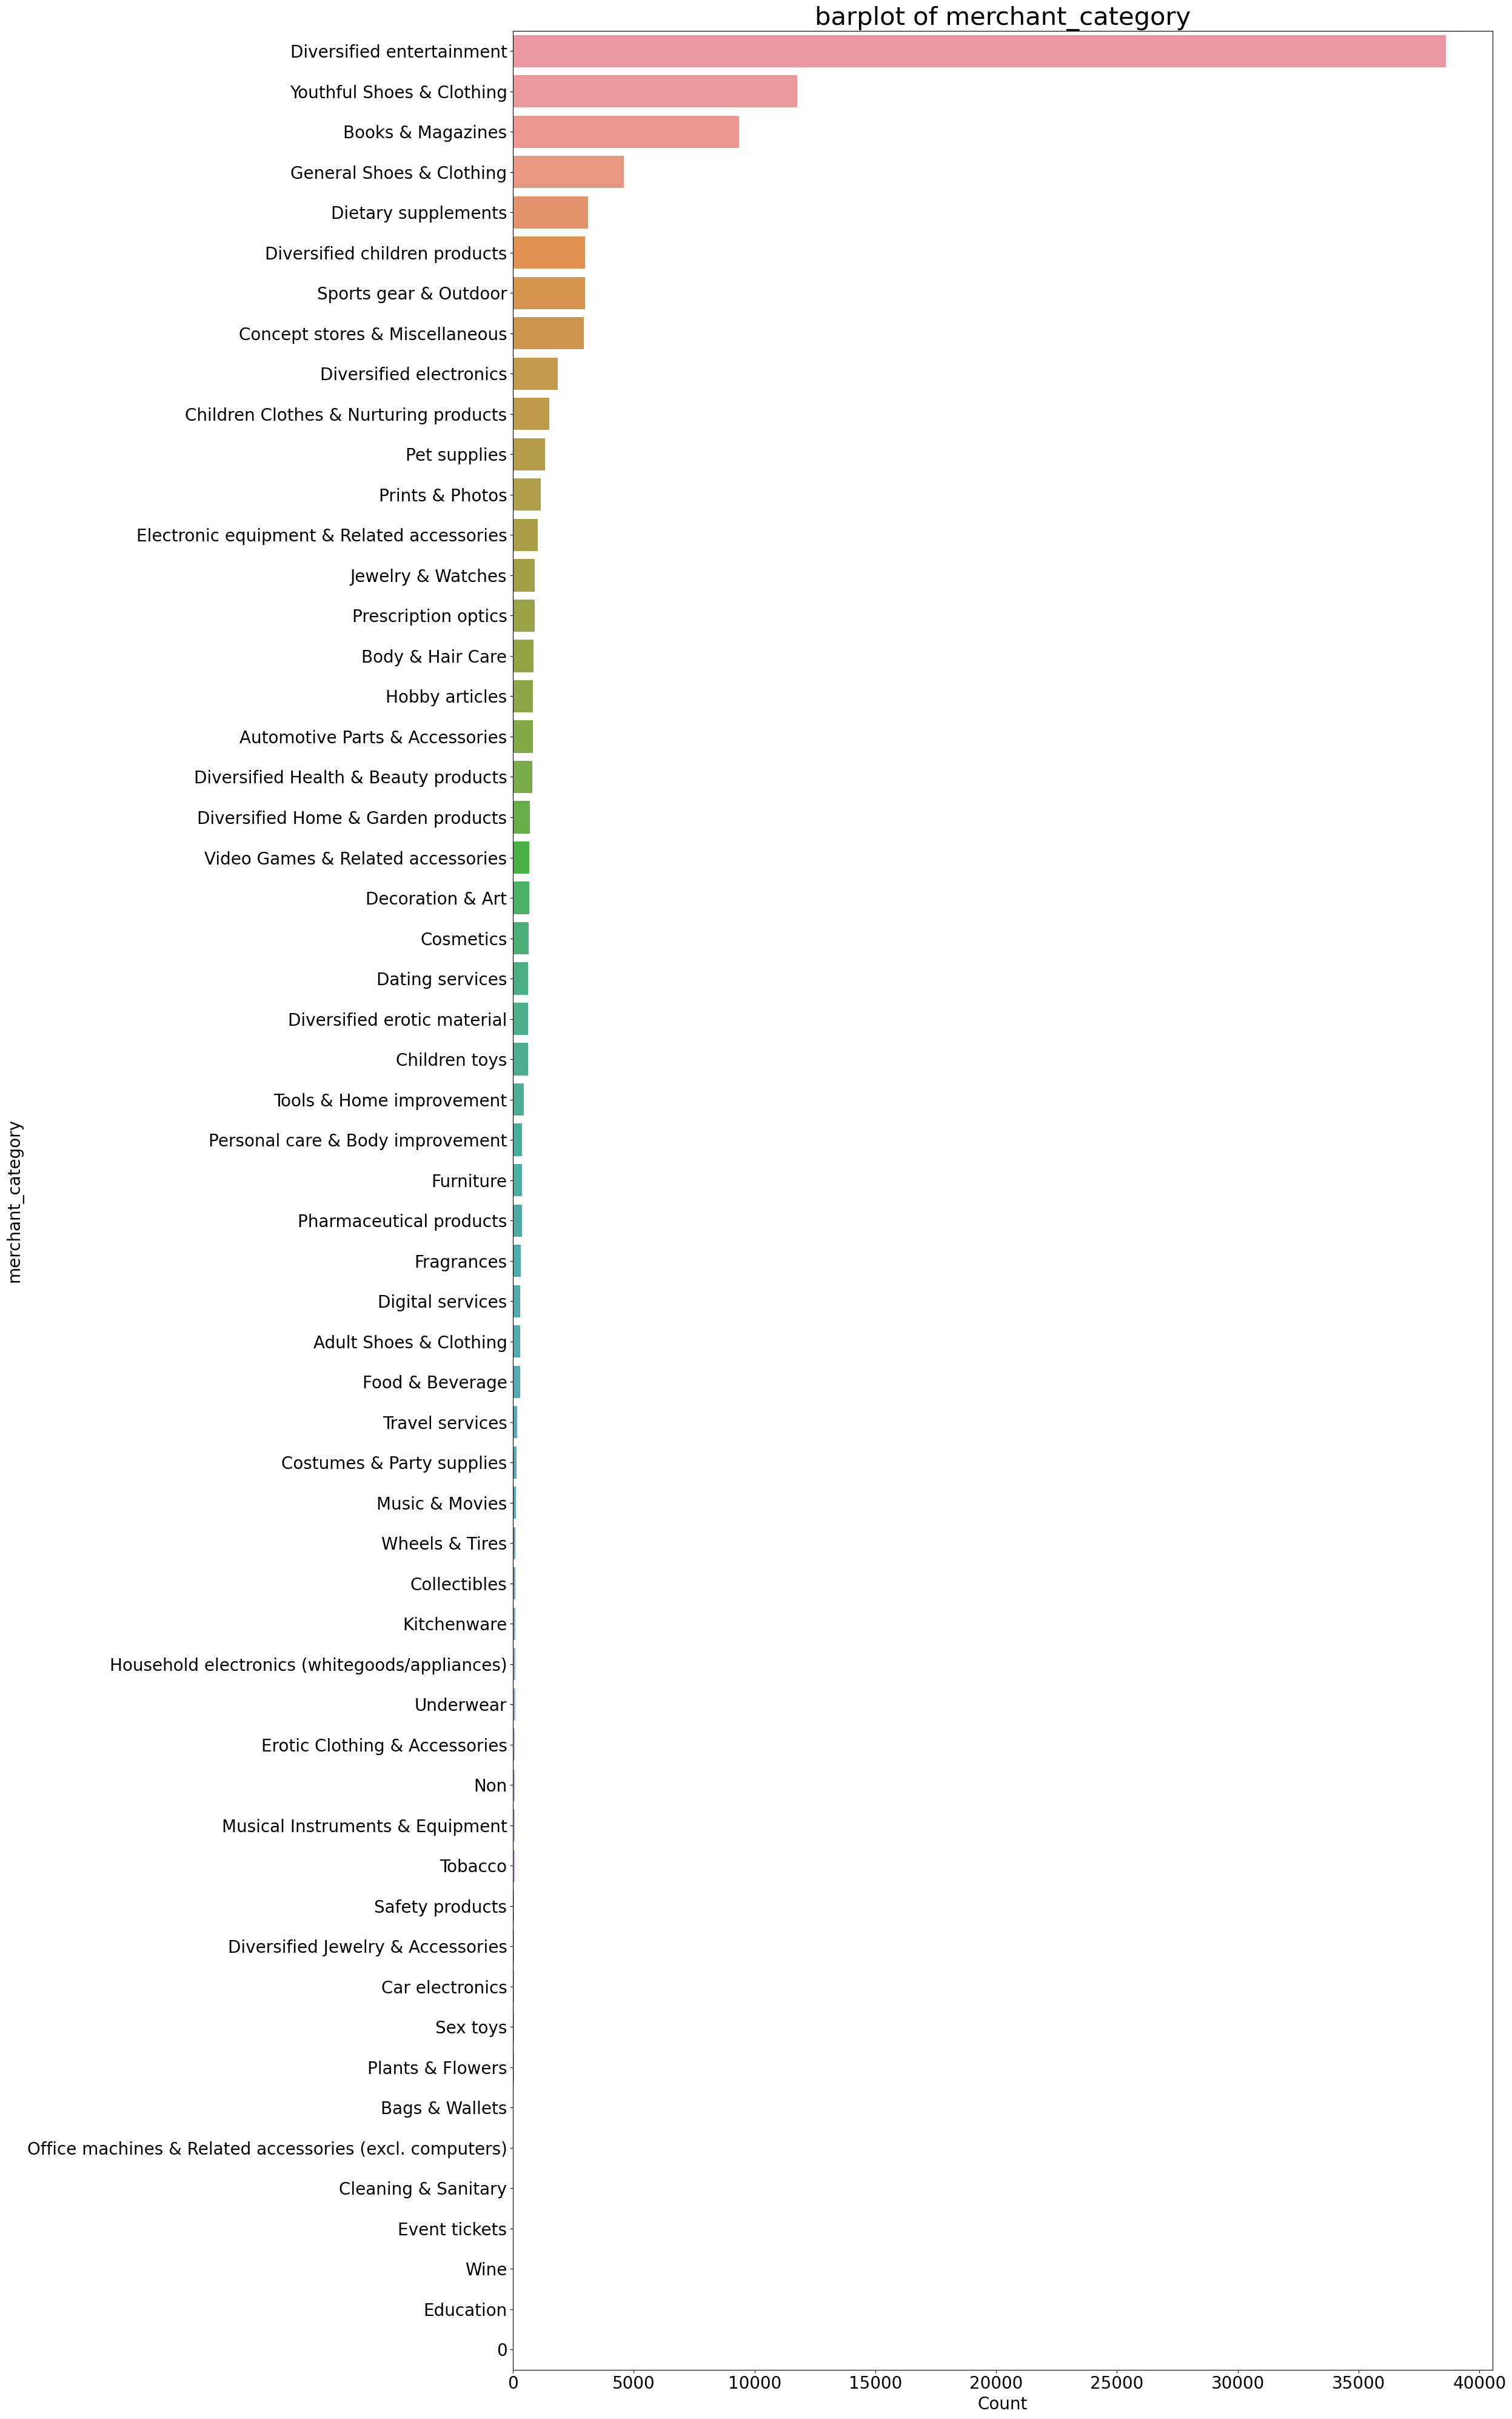

In [20]:
plt.figure(figsize=(25,40))
sns.countplot(data=df, y='merchant_category', order=df['merchant_category'].value_counts().sort_values(ascending=False).index)
plt.title('barplot of merchant_category', fontsize= 30)
plt.ylabel('merchant_category', fontsize=20)
plt.xlabel('Count', fontsize=20) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.tight_layout()

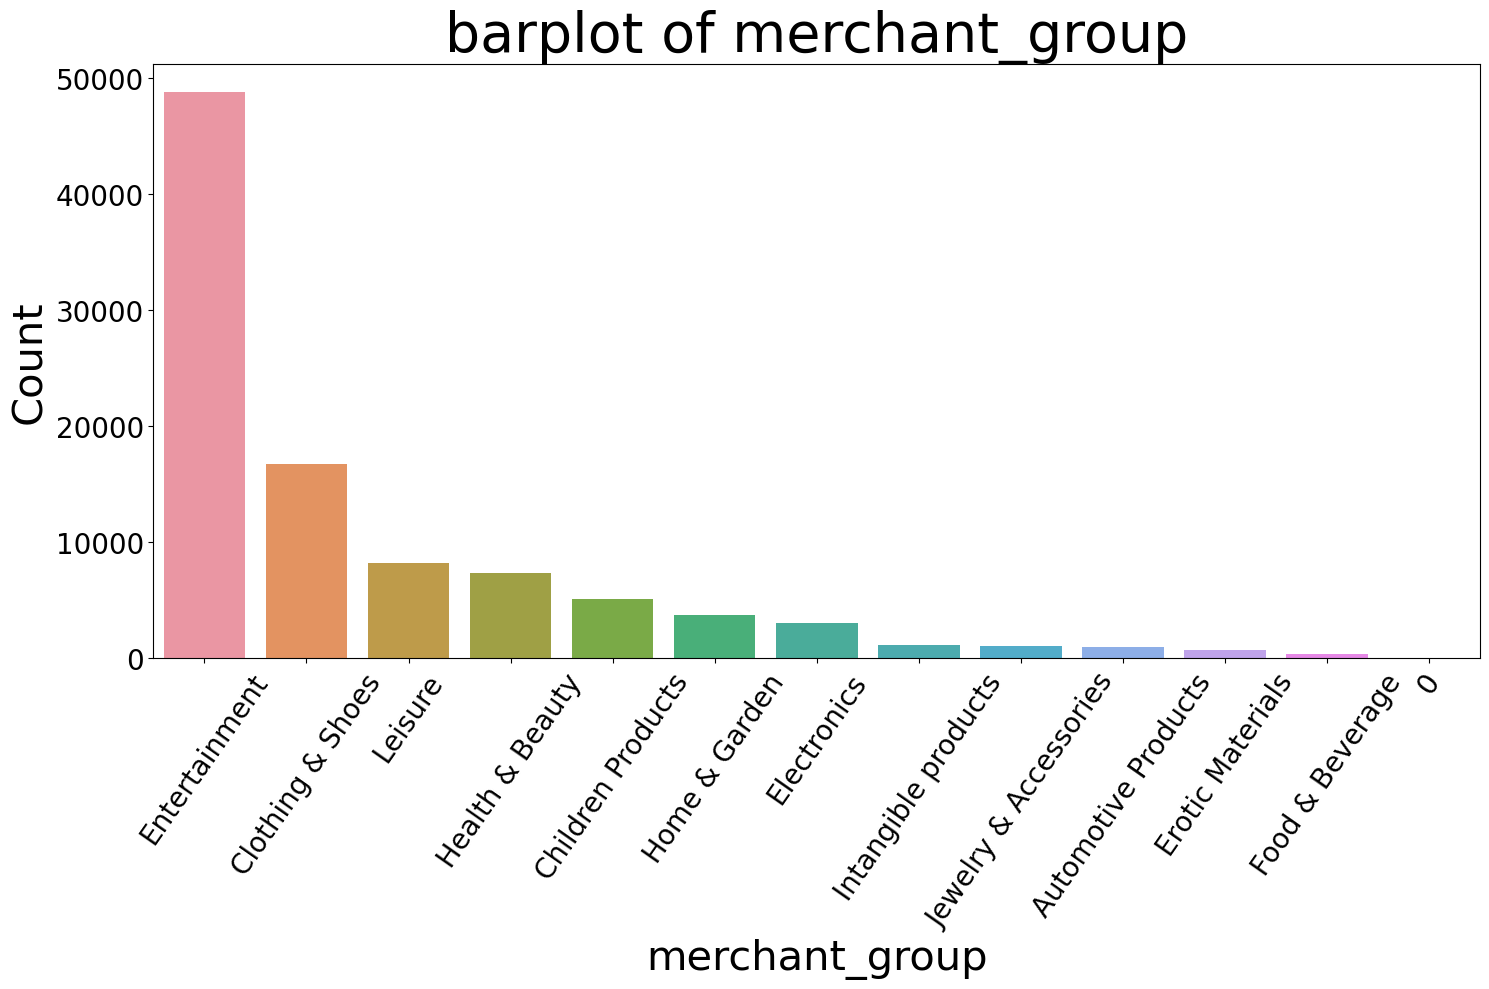

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='merchant_group', order=df['merchant_group'].value_counts().sort_values(ascending=False).index)
plt.title('barplot of merchant_group', fontsize= 40)
plt.xlabel('merchant_group', fontsize=30)
plt.ylabel('Count', fontsize=30) 
plt.xticks(rotation = 55, fontsize=20) 
plt.yticks(fontsize=20) 
plt.tight_layout()

C:\Users\Dell\AppData\Local\Temp\ipykernel_5552\3854742285.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde=True, ax=axes[i, 0], hist_kws={"edgecolor": "black"})
C:\Users\Dell\AppData\Local\Temp\ipykernel_5552\3854742285.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[va

C:\Users\Dell\AppData\Local\Temp\ipykernel_5552\3854742285.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], kde=True, ax=axes[i, 0], hist_kws={"edgecolor": "black"})
C:\Users\Dell\AppData\Local\Temp\ipykernel_5552\3854742285.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[va

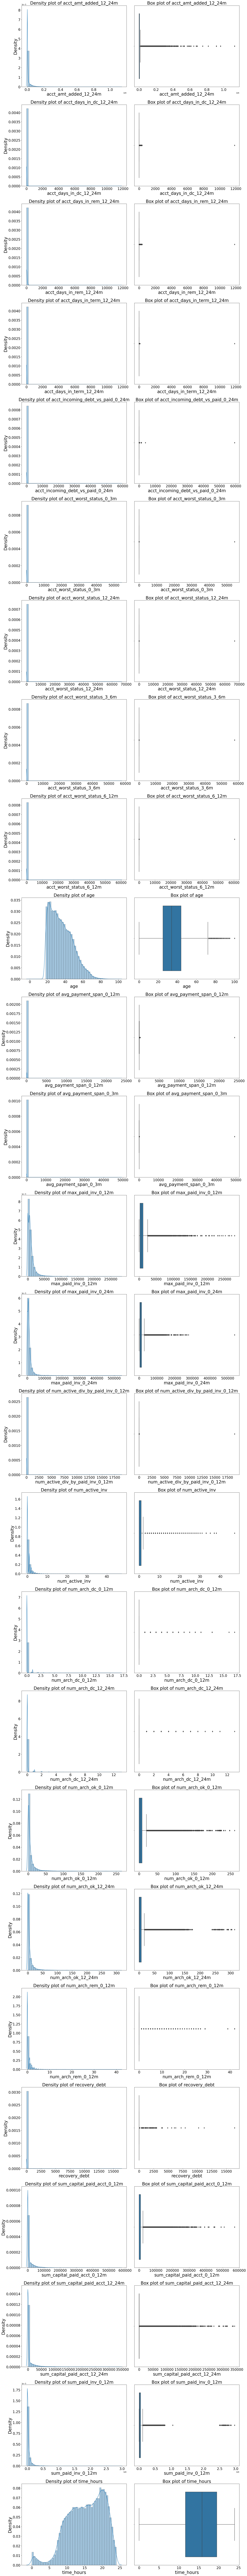

In [22]:
# List of continuous variables
continuous_vars = ['acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m',
       'acct_incoming_debt_vs_paid_0_24m',
       'acct_worst_status_0_3m', 'acct_worst_status_12_24m',
       'acct_worst_status_3_6m', 'acct_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m','num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m', 'recovery_debt',
       'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
       'sum_paid_inv_0_12m', 'time_hours']

# Set the figure dimensions
fig_dims = (20, 8 * len(continuous_vars))

# Create subplots for each continuous variable
fig, axes = plt.subplots(nrows=len(continuous_vars), ncols=2, figsize=fig_dims)

# Iterate through continuous variables
for i, var in enumerate(continuous_vars):
    # Histogram
    sns.distplot(df[var], kde=True, ax=axes[i, 0], hist_kws={"edgecolor": "black"})
    axes[i, 0].set_title('Density plot of {}'.format(var), fontsize= 25)
    axes[i, 0].set_xlabel(var, fontsize=25)
    axes[i, 0].set_ylabel('Density', fontsize=25) 
    axes[i, 0].tick_params(axis='both', which='both', labelsize=20) 

    
    
    # Box plot
    sns.boxplot(x=var, data=df, ax=axes[i, 1])
    axes[i, 1].set_title('Box plot of {}'.format(var), fontsize= 25)
    axes[i, 1].set_xlabel(var, fontsize=25)
    axes[i, 1].tick_params(axis='both', which='both', labelsize=20) 


plt.tight_layout()
plt.show()

## BIVARIATE ANALYSIS

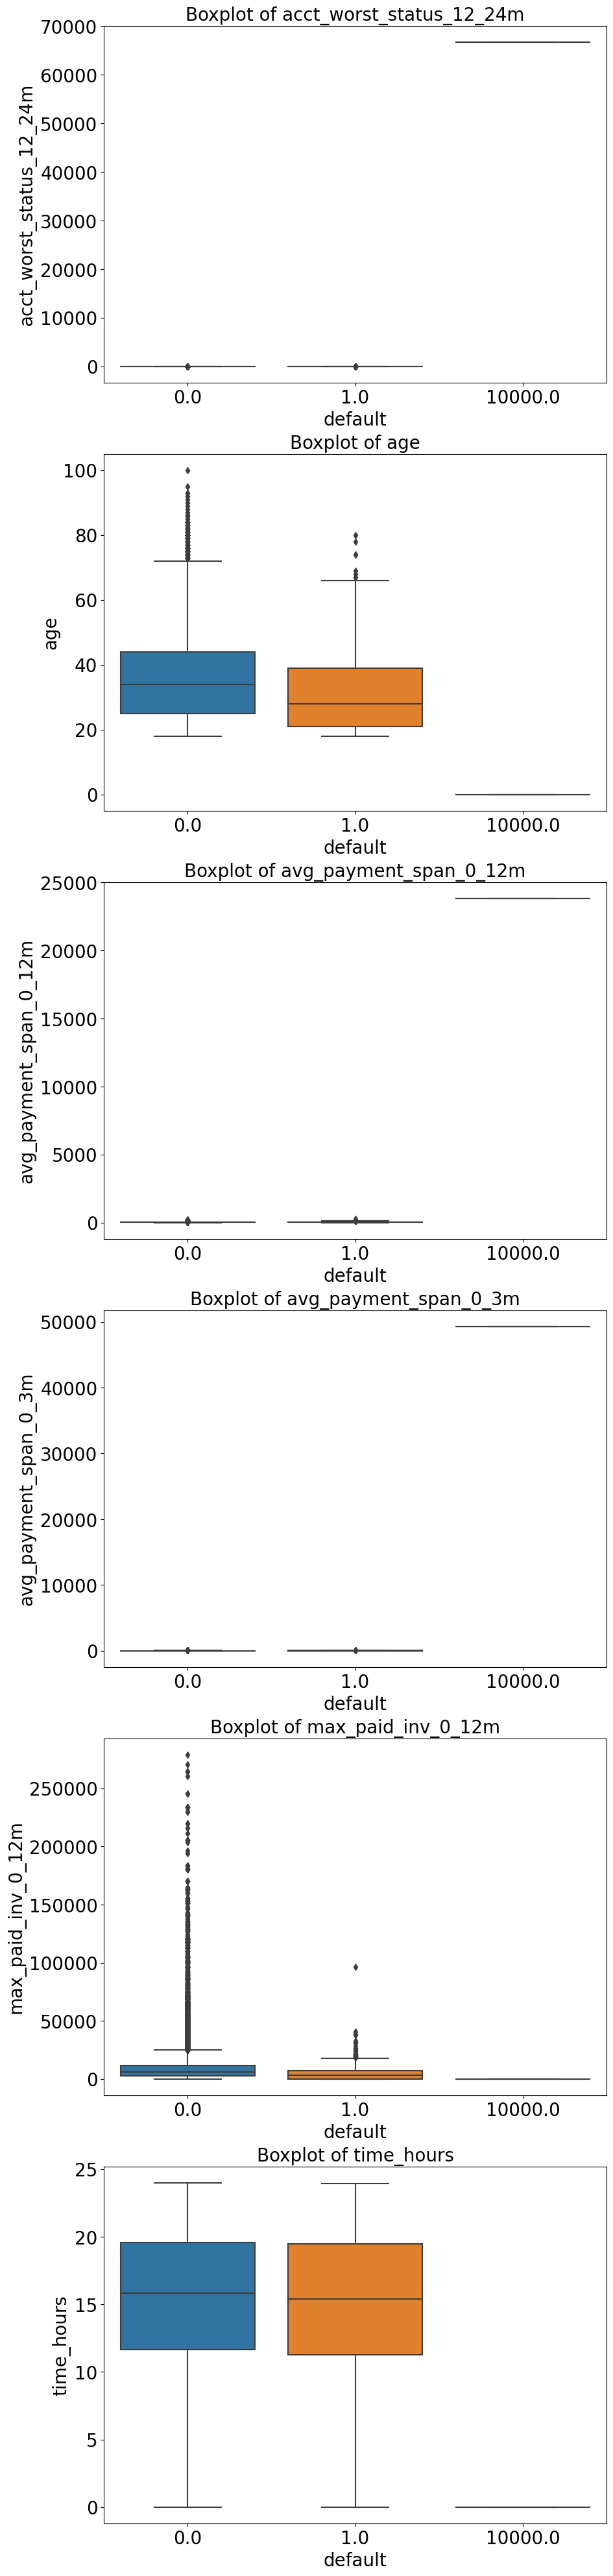

In [23]:
fig, axs = plt.subplots(nrows=6,ncols=1,figsize=(10,50))
sns.boxplot(x='default', y='acct_worst_status_12_24m', data=df, ax=axs[0])
axs[0].set_title('Boxplot of acct_worst_status_12_24m', fontsize=20)
axs[0].set_xlabel('default', fontsize=20)
axs[0].set_ylabel('acct_worst_status_12_24m', fontsize=20)
axs[0].tick_params(axis='both', which='both', labelsize=20) 

sns.boxplot(x='default', y='age', data=df, ax=axs[1])
axs[1].set_title('Boxplot of age', fontsize=20)
axs[1].set_xlabel('default', fontsize=20)
axs[1].set_ylabel('age', fontsize=20)
axs[1].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='avg_payment_span_0_12m', data=df, ax=axs[2])
axs[2].set_title('Boxplot of avg_payment_span_0_12m', fontsize=20)
axs[2].set_xlabel('default', fontsize=20)
axs[2].set_ylabel('avg_payment_span_0_12m', fontsize=20)
axs[2].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='avg_payment_span_0_3m', data=df, ax=axs[3])
axs[3].set_title('Boxplot of avg_payment_span_0_3m', fontsize=20)
axs[3].set_xlabel('default', fontsize=20)
axs[3].set_ylabel('avg_payment_span_0_3m', fontsize=20)
axs[3].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='max_paid_inv_0_12m', data=df, ax=axs[4])
axs[4].set_title('Boxplot of max_paid_inv_0_12m', fontsize=20)
axs[4].set_xlabel('default', fontsize=20)
axs[4].set_ylabel('max_paid_inv_0_12m', fontsize=20)
axs[4].tick_params(axis='both', which='both', labelsize=20)

sns.boxplot(x='default', y='time_hours', data=df, ax=axs[5])
axs[5].set_title('Boxplot of time_hours', fontsize=20)
axs[5].set_xlabel('default', fontsize=20)
axs[5].set_ylabel('time_hours', fontsize=20)
axs[5].tick_params(axis='both', which='both', labelsize=20)

plt.show()

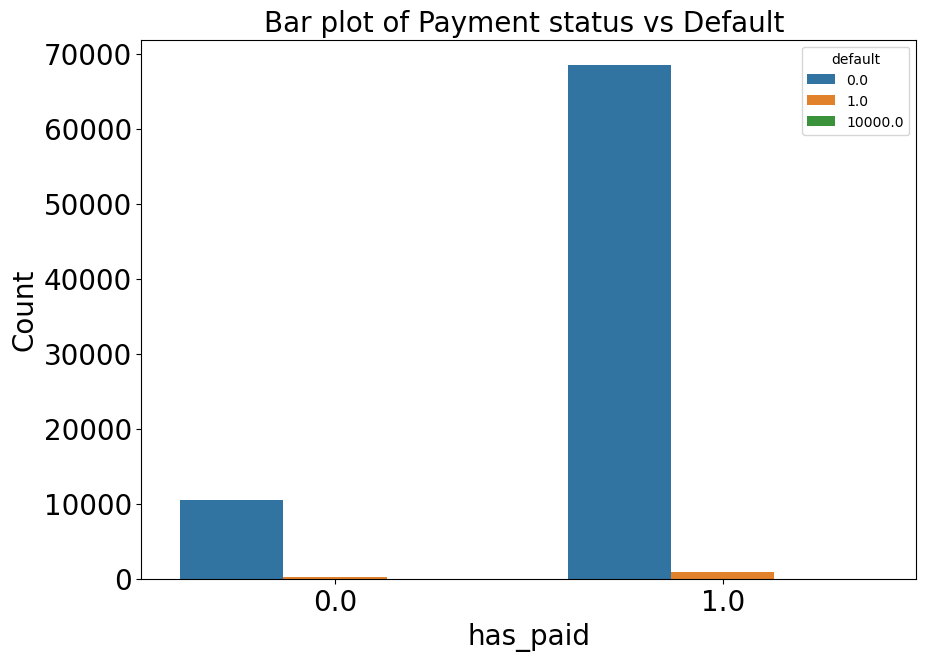

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='has_paid', hue='default')
plt.title('Bar plot of Payment status vs Default ', fontsize= 20)
plt.xlabel('has_paid', fontsize=20)
plt.ylabel('Count', fontsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## MULTIVARIATE ANALYSIS

C:\Users\Dell\AppData\Local\Temp\ipykernel_5552\373284830.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().round(2)


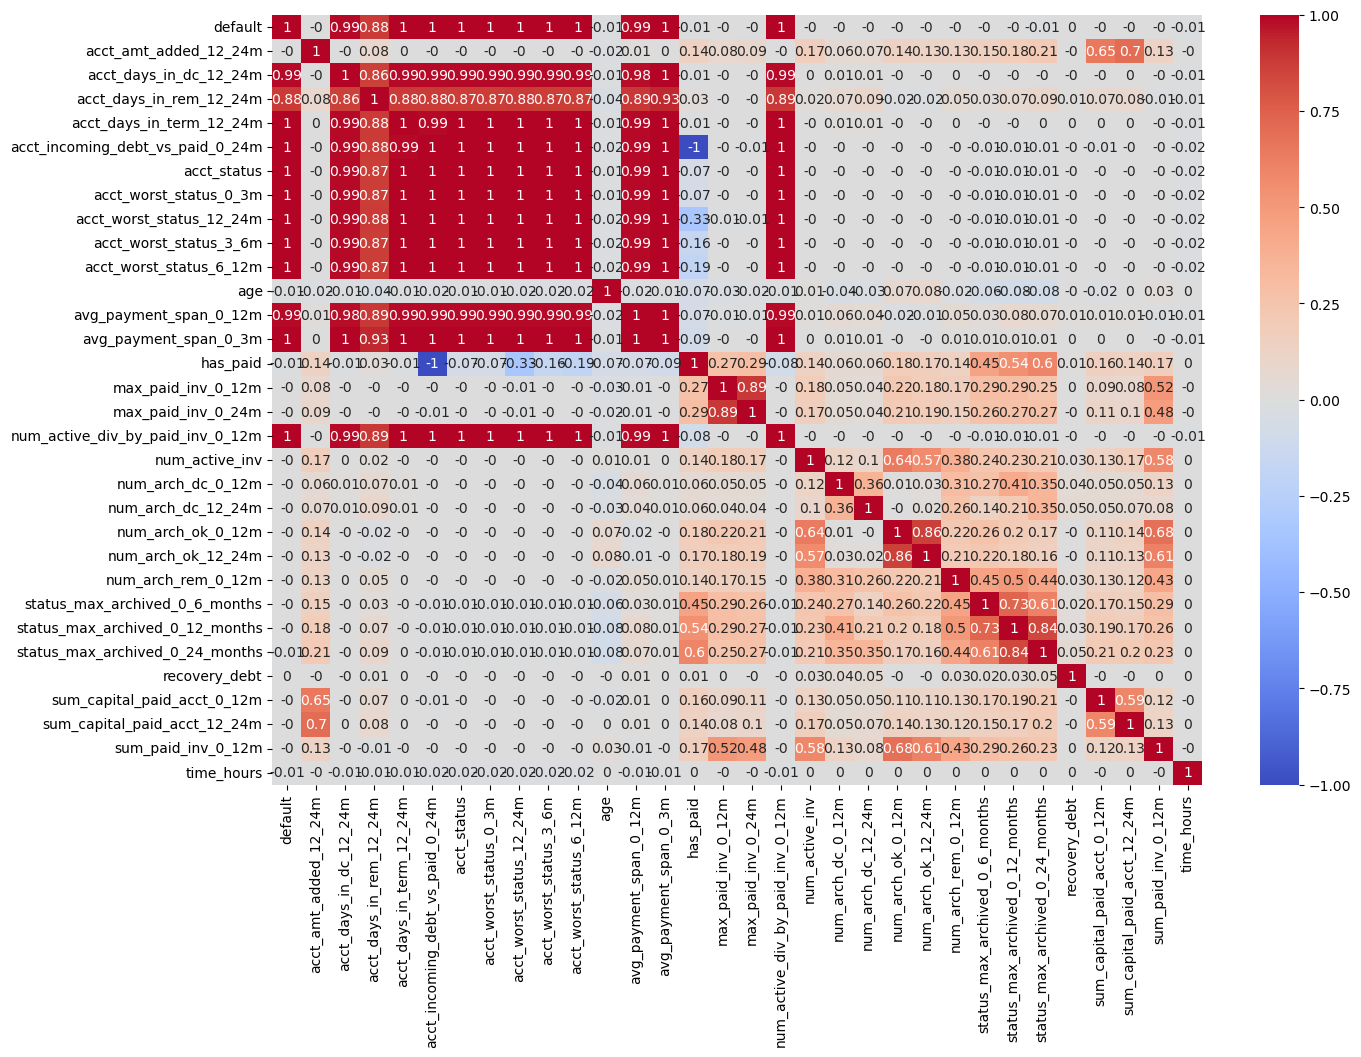

In [25]:
plt.figure(figsize=(15,10))
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show();


### Checking columns which have highest percentage of default values

In [26]:
df['default'].replace(10000, 0, inplace=True)

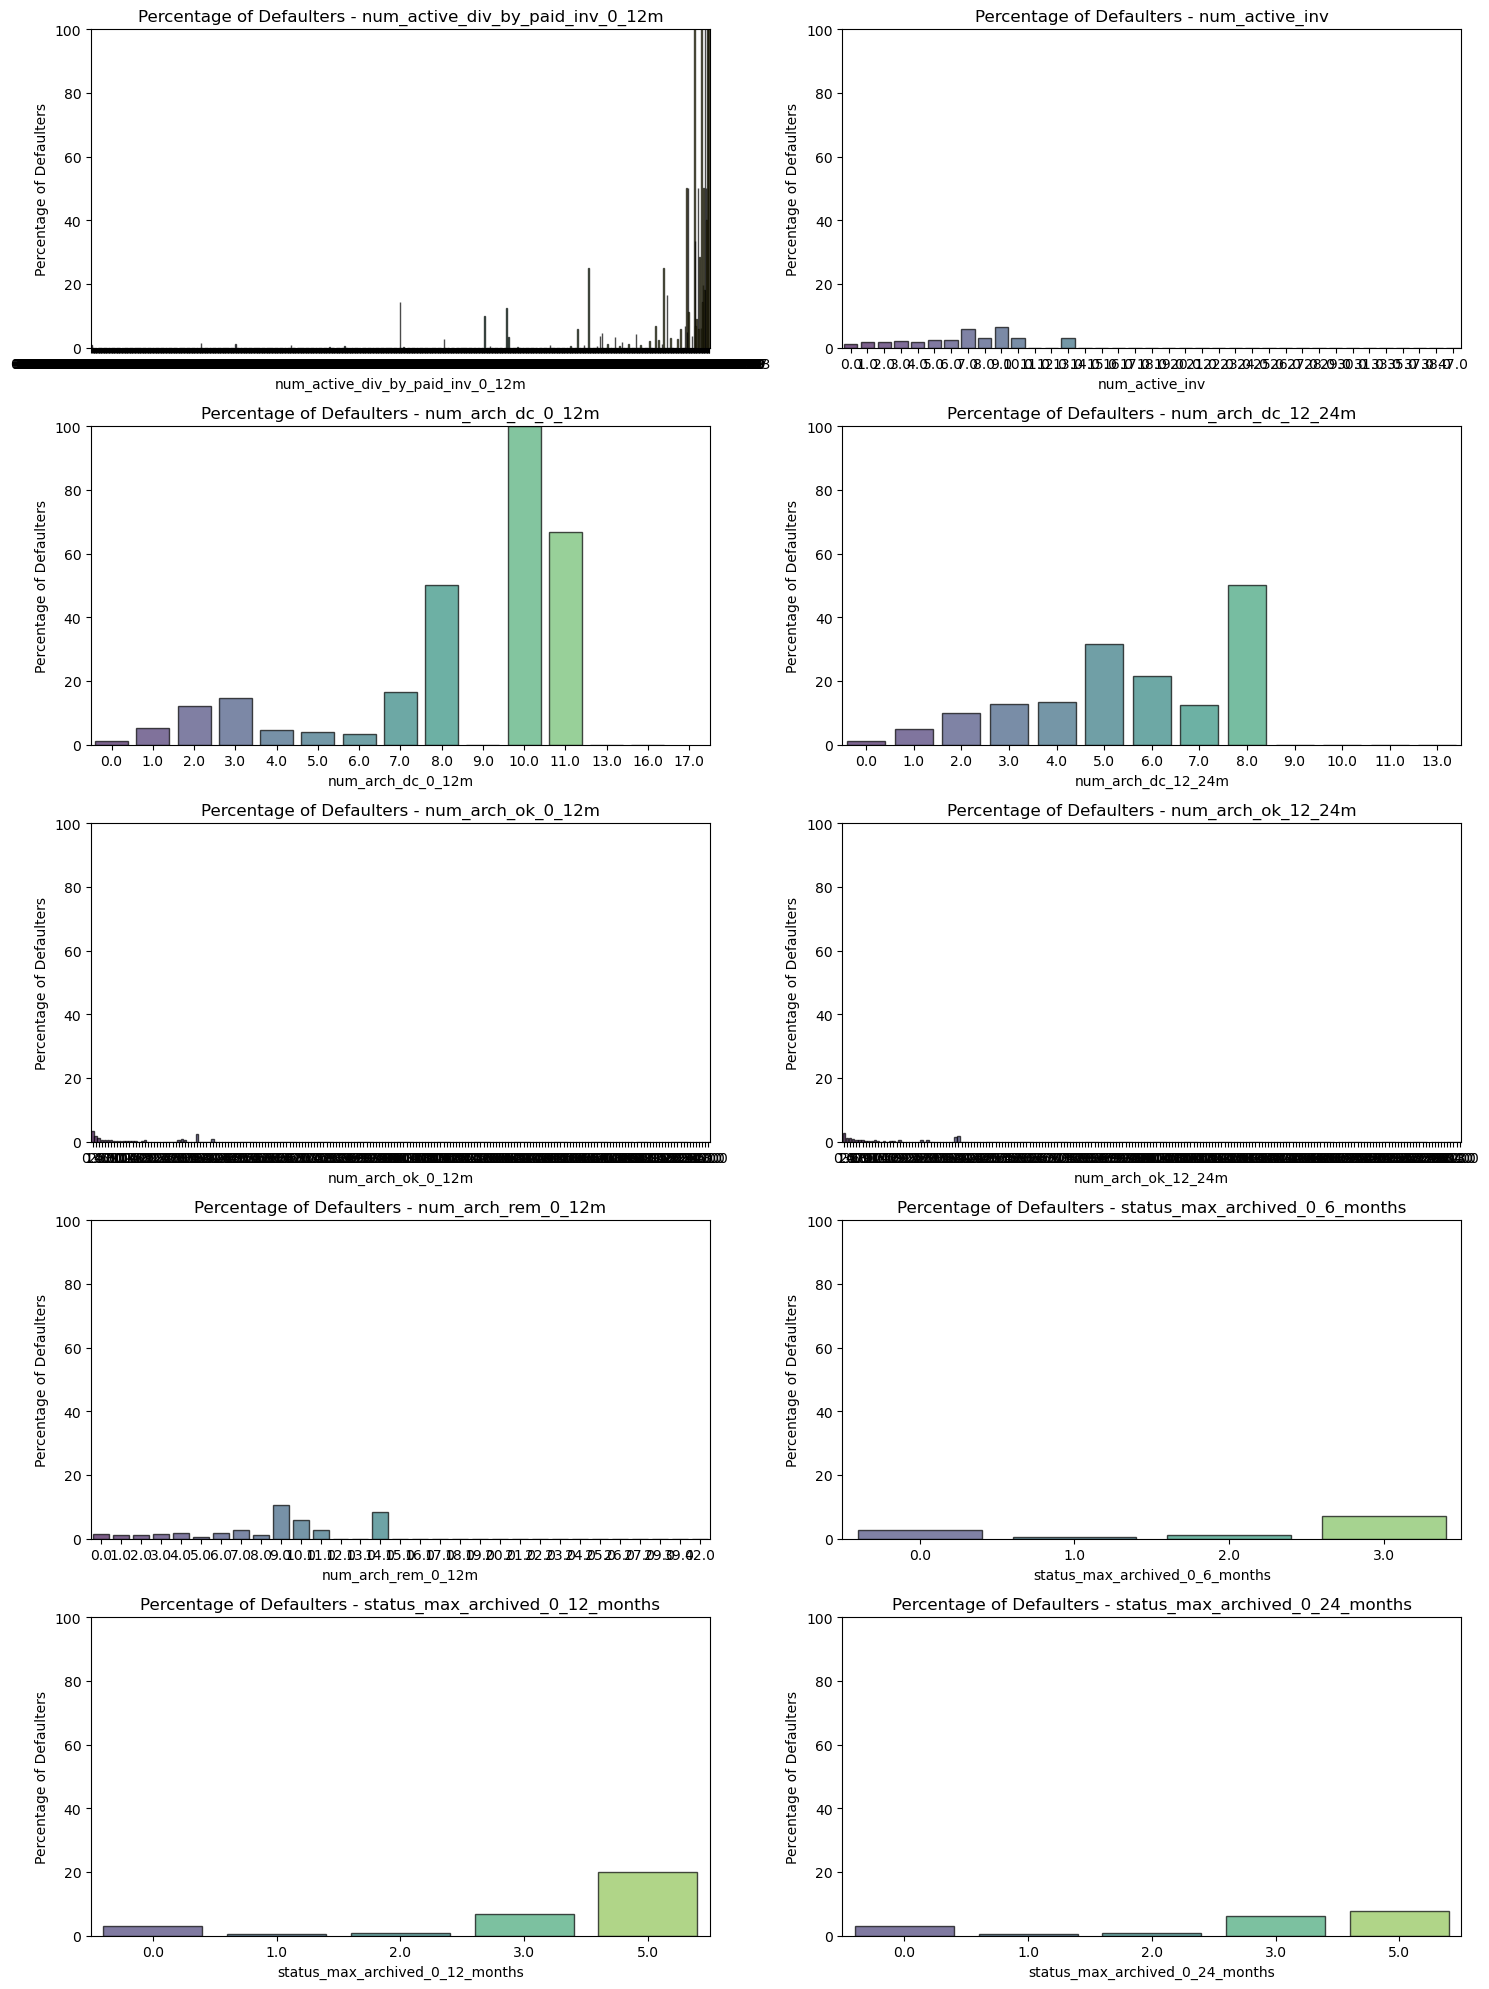

In [27]:
columns_to_visualize = ["num_active_div_by_paid_inv_0_12m", "num_active_inv", "num_arch_dc_0_12m", "num_arch_dc_12_24m", "num_arch_ok_0_12m", "num_arch_ok_12_24m", "num_arch_rem_0_12m", "status_max_archived_0_6_months", "status_max_archived_0_12_months", "status_max_archived_0_24_months"]
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(5, 2, i)
    default_percentage = df.groupby(column)['default'].mean() * 100
    sns.barplot(x=default_percentage.index, y=default_percentage.values, palette='viridis', edgecolor='k', alpha=0.7)
    plt.title(f'Percentage of Defaulters - {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage of Defaulters')
    plt.ylim(0, 100)  # Adjust the y-axis limit to 100 for percentage

plt.tight_layout()
plt.show()

In [28]:
# Drop columns with object datatype and separate the dataframe into X and Y
X = df.select_dtypes(exclude=['object'])  # X contains non-object columns
Y = df.drop(X.columns, axis=1)  # Y contains object columns

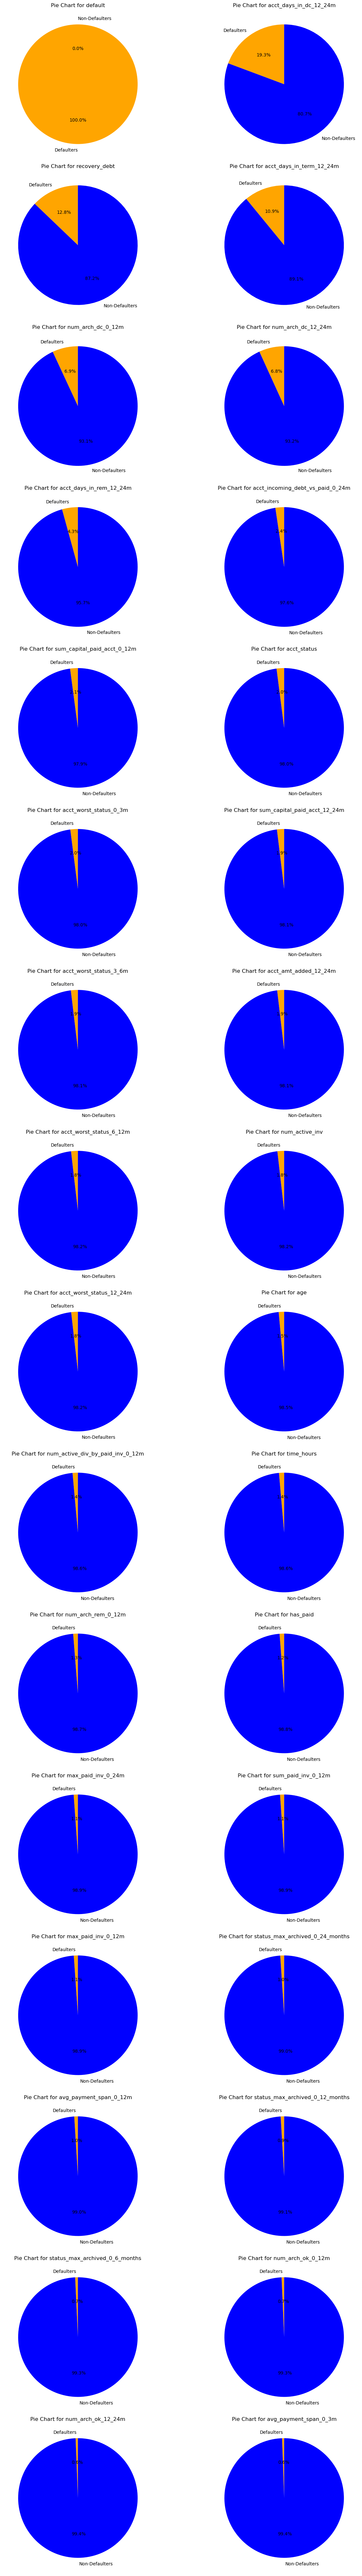

In [29]:
default_percentages = []
column_names = []
for column in X.columns:
    default_counts = X[(X[column] > 0) & (X['default'] == 1)][column].count()
    non_default_counts = X[(X[column] > 0) & (X['default'] == 0)][column].count()
    total_counts = default_counts + non_default_counts
    default_percentage = (default_counts / total_counts) * 100
    default_percentages.append(default_percentage)
    column_names.append(column)
sorted_indices = np.argsort(default_percentages)[::-1]
sorted_column_names = [column_names[i] for i in sorted_indices]
num_plots = len(sorted_column_names)
num_rows = (num_plots + 1) // 2
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
for i, column in enumerate(sorted_column_names):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    default_counts = X[(X[column] > 0) & (X['default'] == 1)][column].count()
    non_default_counts = X[(X[column] > 0) & (X['default'] == 0)][column].count()
    total_counts = default_counts + non_default_counts
    default_percentage = (default_counts / total_counts) * 100
    non_default_percentage = (non_default_counts / total_counts) * 100
    ax.pie([default_percentage, non_default_percentage], labels=['Defaulters', 'Non-Defaulters'],
           autopct='%1.1f%%', colors=['orange', 'blue'], startangle=90)
    ax.set_title(f"Pie Chart for {column}")
if num_plots % 2 != 0:
    fig.delaxes(axes.flat[-1])
plt.tight_layout()
plt.show();

In [30]:
default_percentages = []
column_names = []
default_values = []
non_default_values = []
for column in X.columns:
    default_counts = X[(X[column] > 0) & (X['default'] == 1)][column].count()
    non_default_counts = X[(X[column] > 0) & (X['default'] == 0)][column].count()
    total_counts = default_counts + non_default_counts
    default_percentage = (default_counts / total_counts) * 100
    default_percentages.append(default_percentage)
    column_names.append(column)
    default_values.append(default_percentage)
    non_default_values.append(100 - default_percentage)
df_percentages = pd.DataFrame({
    'Column': column_names,
    'Defaulters': default_values,
    'Non-Defaulters': non_default_values
})
df_percentages = df_percentages.sort_values(by='Defaulters', ascending=False)
df_percentages

Column  Defaulters  Non-Defaulters
0                            default      100.00            0.00
2             acct_days_in_dc_12_24m       19.31           80.69
27                     recovery_debt       12.85           87.15
4           acct_days_in_term_12_24m       10.94           89.06
19                 num_arch_dc_0_12m        6.92           93.08
20                num_arch_dc_12_24m        6.81           93.19
3            acct_days_in_rem_12_24m        4.28           95.72
5   acct_incoming_debt_vs_paid_0_24m        2.36           97.64
28       sum_capital_paid_acct_0_12m        2.10           97.90
6                        acct_status        2.04           97.96
7             acct_worst_status_0_3m        2.04           97.96
29      sum_capital_paid_acct_12_24m        1.94           98.06
9             acct_worst_status_3_6m        1.89           98.11
1              acct_amt_added_12_24m        1.87           98.13
10           acct_worst_status_6_12m        1.84           98.16
18                    num_active_inv        1.82           98.18
8           acct_worst_status_12_24m        1.81           98.19
11                               age        1.47           98.53
17  num_active_div_by_paid_inv_0_12m        1.43           98.57
31                        time_hours        1.39           98.61
23                num_arch_rem_0_12m        1.26           98.74
14                          has_paid        1.23           98.77
16                max_paid_inv_0_24m        1.13           98.87
15                max_paid_inv_0_12m        1.10           98.90
30                sum_paid_inv_0_12m        1.10           98.90
26   status_max_archived_0_24_months        1.04           98.96
12            avg_payment_span_0_12m        0.97           99.03
25   status_max_archived_0_12_months        0.93           99.07
24    status_max_archived_0_6_months        0.73           99.27
21                 num_arch_ok_0_12m        0.69           99.31
22                num_arch_ok_12_24m        0.61           99.39
13             avg_payment_span_0_3m        0.55           99.45

### These are the columns which have high percentage of defaulters. If we take a look at the default column initially, we see a great disparity between defaulters and non-defaulters. therefore, every datapoint is essential to analyse the patterns of defaulters. Hence, dropping the null values of columns is not recommended. Here, "acct_days_in_dc_12_24m", "recovery_debt", "acct_days_in_term_12_24m" have the most datapoints for defaulters. Hence, we will impute these null values using median values of the column. Median remains unaffected by outliers, therefore we will use Median. KNN imputation is the ideal method, however, it is computationally expensive.

In [31]:
selected_columns = ["avg_payment_span_0_12m", "acct_days_in_dc_12_24m", "acct_days_in_rem_12_24m",
                    "acct_days_in_term_12_24m", "default", "num_arch_ok_0_12m", "sum_paid_inv_0_12m",
                    "sum_capital_paid_acct_12_24m", "sum_capital_paid_acct_0_12m", "recovery_debt",
                    "status_max_archived_0_24_months", "status_max_archived_0_12_months",
                    "status_max_archived_0_6_months", "num_arch_rem_0_12m", "num_arch_ok_12_24m",
                    "num_arch_dc_0_12m", "num_arch_dc_12_24m", "num_active_inv", "max_paid_inv_0_24m",
                    "max_paid_inv_0_12m", "has_paid", "time_hours",
                    "acct_amt_added_12_24m", "age"]
default_percentages = []
column_names = []
default_values = []
non_default_values = []
for column in selected_columns:
    default_counts = X[(X[column] > 0) & (X['default'] == 1)][column].count()
    non_default_counts = X[(X[column] > 0) & (X['default'] == 0)][column].count()
    total_counts = default_counts + non_default_counts
    default_percentage = (default_counts / total_counts) * 100
    default_percentages.append(default_percentage)
    column_names.append(column)
    default_values.append(default_percentage)
    non_default_values.append(100 - default_percentage)
df_percentages = pd.DataFrame({
    'Column': column_names,
    'Defaulters': default_values,
    'Non-Defaulters': non_default_values
})
df_percentages = df_percentages.sort_values(by='Defaulters', ascending=False)
df_percentages

Column  Defaulters  Non-Defaulters
4                           default      100.00            0.00
1            acct_days_in_dc_12_24m       19.31           80.69
9                     recovery_debt       12.85           87.15
3          acct_days_in_term_12_24m       10.94           89.06
15                num_arch_dc_0_12m        6.92           93.08
16               num_arch_dc_12_24m        6.81           93.19
2           acct_days_in_rem_12_24m        4.28           95.72
8       sum_capital_paid_acct_0_12m        2.10           97.90
7      sum_capital_paid_acct_12_24m        1.94           98.06
22            acct_amt_added_12_24m        1.87           98.13
17                   num_active_inv        1.82           98.18
23                              age        1.47           98.53
21                       time_hours        1.39           98.61
13               num_arch_rem_0_12m        1.26           98.74
20                         has_paid        1.23           98.77
18               max_paid_inv_0_24m        1.13           98.87
19               max_paid_inv_0_12m        1.10           98.90
6                sum_paid_inv_0_12m        1.10           98.90
10  status_max_archived_0_24_months        1.04           98.96
0            avg_payment_span_0_12m        0.97           99.03
11  status_max_archived_0_12_months        0.93           99.07
12   status_max_archived_0_6_months        0.73           99.27
5                 num_arch_ok_0_12m        0.69           99.31
14               num_arch_ok_12_24m        0.61           99.39

In [32]:
df= pd.concat([X,Y],axis =1)

In [33]:
df.drop_duplicates(inplace= True)
df.duplicated().sum().sum()

0

In [34]:
df.drop(['name_in_email'],axis='columns', inplace=True)
df.head(2)

default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0     0.00                   0.00                    0.00   
1     0.00                   0.00                    0.00   

   acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                     0.00                      0.00   
1                     0.00                      0.00   

   acct_incoming_debt_vs_paid_0_24m  acct_status  acct_worst_status_0_3m  \
0                              0.00         1.00                    1.00   
1                               NaN         1.00                    1.00   

   acct_worst_status_12_24m  acct_worst_status_3_6m  ...  \
0                       NaN                    1.00  ...   
1                      1.00                    1.00  ...   

   status_max_archived_0_6_months  status_max_archived_0_12_months  \
0                            1.00                             1.00   
1                            1.00                             2.00   

   status_max_archived_0_24_months  recovery_debt  \
0                             1.00           0.00   
1                             2.00           0.00   

   sum_capital_paid_acct_0_12m  sum_capital_paid_acct_12_24m  \
0                         0.00                          0.00   
1                         0.00                          0.00   

   sum_paid_inv_0_12m  time_hours    merchant_category   merchant_group  
0           178839.00        9.65  Dietary supplements  Health & Beauty  
1            49014.00       13.18    Books & Magazines    Entertainment  

[2 rows x 34 columns]

### Null Value Treatment

In [35]:
null_percentage = (df.isnull().sum() / len(df)) * 100
sorted_null_percentage = null_percentage.sort_values(ascending=False).round(2)
print("Percentage of null values in each column (sorted in descending order):")
print(sorted_null_percentage)

Percentage of null values in each column (sorted in descending order):
acct_worst_status_12_24m           65.82
acct_worst_status_6_12m            59.24
acct_incoming_debt_vs_paid_0_24m   58.17
acct_worst_status_3_6m             56.51
acct_status                        53.10
acct_worst_status_0_3m             53.10
avg_payment_span_0_3m              47.89
num_active_div_by_paid_inv_0_12m   27.91
avg_payment_span_0_12m             21.74
acct_days_in_dc_12_24m             11.94
acct_days_in_rem_12_24m            11.94
acct_days_in_term_12_24m           11.94
default                            10.13
num_arch_rem_0_12m                  8.47
num_arch_ok_12_24m                  8.47
sum_capital_paid_acct_0_12m         8.47
recovery_debt                       8.47
status_max_archived_0_24_months     8.47
status_max_archived_0_12_months     8.47
status_max_archived_0_6_months      8.47
has_paid                            8.47
num_arch_ok_0_12m                   8.47
sum_paid_inv_0_12m         

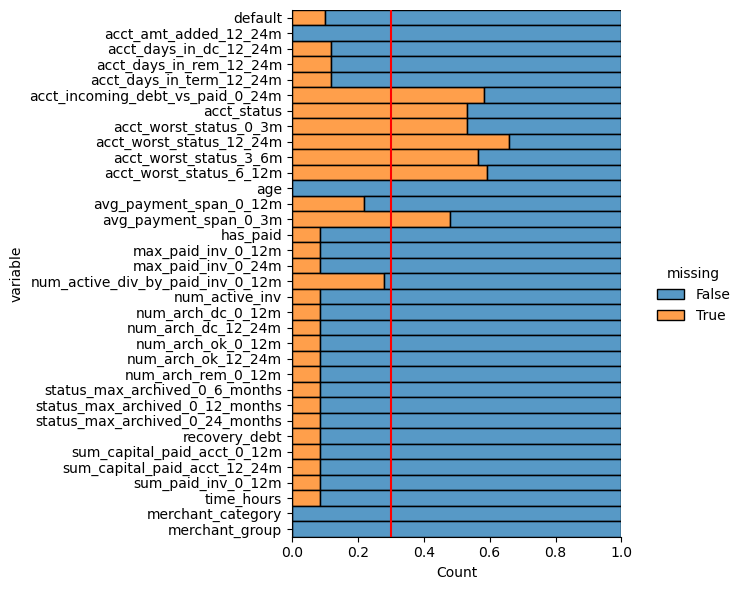

In [36]:
sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=6,
    aspect=1.1
)
plt.axvline(0.3, color='r');

#### As our dataset is huge, we will remove columns which have percentage of null values approx 30% or more.

DataFrame after dropping columns with more than 30% null values:


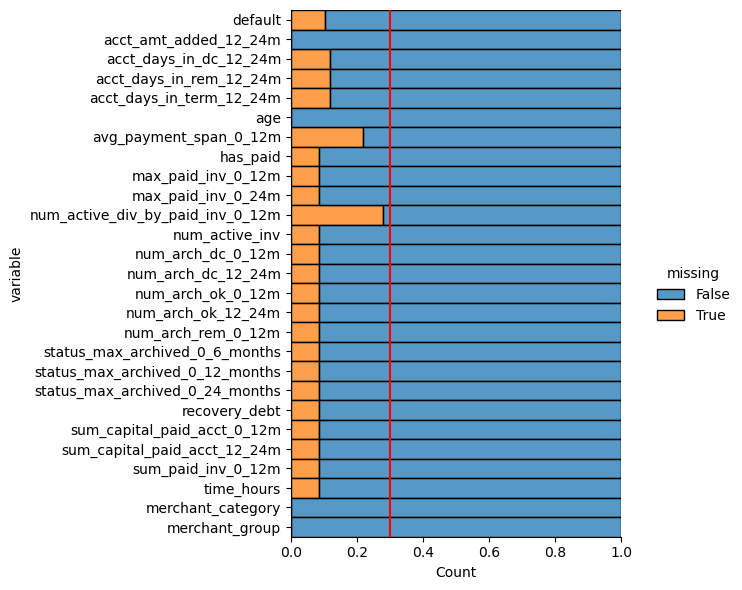

In [37]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100
# Drop columns where null values are greater than 30%
columns_to_drop = null_percentage[null_percentage > 30].index
df_2 = df.drop(columns=columns_to_drop)

# Print the cleaned DataFrame
print("DataFrame after dropping columns with more than 30% null values:")
sns.displot(
    data=df_2.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=6,
    aspect=1.1
)
#### specifying a threshold value
plt.axvline(0.3, color='r');

In [38]:
df_2.drop(["num_active_div_by_paid_inv_0_12m"],axis='columns', inplace=True)
null_percentage = (df_2.isnull().sum() / len(df_2)) * 100
sorted_null_percentage = null_percentage.sort_values(ascending=False)
print("Percentage of null values in each column (sorted in descending order):")
print(sorted_null_percentage)

Percentage of null values in each column (sorted in descending order):
avg_payment_span_0_12m            21.74
acct_days_in_dc_12_24m            11.94
acct_days_in_rem_12_24m           11.94
acct_days_in_term_12_24m          11.94
default                           10.13
num_arch_rem_0_12m                 8.47
time_hours                         8.47
sum_paid_inv_0_12m                 8.47
sum_capital_paid_acct_12_24m       8.47
sum_capital_paid_acct_0_12m        8.47
recovery_debt                      8.47
status_max_archived_0_24_months    8.47
status_max_archived_0_12_months    8.47
status_max_archived_0_6_months     8.47
num_arch_ok_0_12m                  8.47
num_arch_ok_12_24m                 8.47
num_arch_dc_12_24m                 8.47
num_arch_dc_0_12m                  8.47
num_active_inv                     8.47
max_paid_inv_0_24m                 8.47
max_paid_inv_0_12m                 8.47
has_paid                           8.47
merchant_group                     0.01
acct_amt_

### Null Value Treatment (Simple Imputer using Median)

In [39]:
from sklearn.impute import SimpleImputer
columns_to_impute = [
    'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'acct_days_in_rem_12_24m',
    'sum_capital_paid_acct_0_12m', 'sum_capital_paid_acct_12_24m',
    'acct_amt_added_12_24m', 'num_active_inv', 'age', 'time_hours',
    'num_arch_rem_0_12m', 'has_paid', 'max_paid_inv_0_24m',
    'max_paid_inv_0_12m', 'sum_paid_inv_0_12m', 'status_max_archived_0_24_months',
    'avg_payment_span_0_12m', 'status_max_archived_0_12_months',
    'status_max_archived_0_6_months', 'num_arch_ok_0_12m', 'num_arch_ok_12_24m','acct_days_in_dc_12_24m','recovery_debt', 
    'acct_days_in_term_12_24m'
]

imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the specified columns
df_2[columns_to_impute] = imputer.fit_transform(df_2[columns_to_impute])
null_counts = df_2[columns_to_impute].isnull().sum()
null_counts

num_arch_dc_0_12m                  0
num_arch_dc_12_24m                 0
acct_days_in_rem_12_24m            0
sum_capital_paid_acct_0_12m        0
sum_capital_paid_acct_12_24m       0
acct_amt_added_12_24m              0
num_active_inv                     0
age                                0
time_hours                         0
num_arch_rem_0_12m                 0
has_paid                           0
max_paid_inv_0_24m                 0
max_paid_inv_0_12m                 0
sum_paid_inv_0_12m                 0
status_max_archived_0_24_months    0
avg_payment_span_0_12m             0
status_max_archived_0_12_months    0
status_max_archived_0_6_months     0
num_arch_ok_0_12m                  0
num_arch_ok_12_24m                 0
acct_days_in_dc_12_24m             0
recovery_debt                      0
acct_days_in_term_12_24m           0
dtype: int64

In [40]:
df_2['merchant_group'].fillna(df_2['merchant_group'].mode()[0], inplace=True)


In [41]:
df_2['merchant_category'].fillna(df_2['merchant_category'].mode()[0], inplace=True)

In [42]:
df_2.shape

(97173, 26)

In [43]:
null_percentage = (df_2.isnull().sum() / len(df_2)) * 100
sorted_null_percentage = null_percentage.sort_values(ascending=False).round(2)
print("Percentage of null values in each column (sorted in descending order):")
print(sorted_null_percentage)

Percentage of null values in each column (sorted in descending order):
default                           10.13
acct_amt_added_12_24m              0.00
merchant_category                  0.00
time_hours                         0.00
sum_paid_inv_0_12m                 0.00
sum_capital_paid_acct_12_24m       0.00
sum_capital_paid_acct_0_12m        0.00
recovery_debt                      0.00
status_max_archived_0_24_months    0.00
status_max_archived_0_12_months    0.00
status_max_archived_0_6_months     0.00
num_arch_rem_0_12m                 0.00
num_arch_ok_12_24m                 0.00
num_arch_ok_0_12m                  0.00
num_arch_dc_12_24m                 0.00
num_arch_dc_0_12m                  0.00
num_active_inv                     0.00
max_paid_inv_0_24m                 0.00
max_paid_inv_0_12m                 0.00
has_paid                           0.00
avg_payment_span_0_12m             0.00
age                                0.00
acct_days_in_term_12_24m           0.00
acct_days

In [44]:
df_2['default'].fillna(0, inplace=True)

In [45]:
df_2.isnull().sum()

default                            0
acct_amt_added_12_24m              0
acct_days_in_dc_12_24m             0
acct_days_in_rem_12_24m            0
acct_days_in_term_12_24m           0
age                                0
avg_payment_span_0_12m             0
has_paid                           0
max_paid_inv_0_12m                 0
max_paid_inv_0_24m                 0
num_active_inv                     0
num_arch_dc_0_12m                  0
num_arch_dc_12_24m                 0
num_arch_ok_0_12m                  0
num_arch_ok_12_24m                 0
num_arch_rem_0_12m                 0
status_max_archived_0_6_months     0
status_max_archived_0_12_months    0
status_max_archived_0_24_months    0
recovery_debt                      0
sum_capital_paid_acct_0_12m        0
sum_capital_paid_acct_12_24m       0
sum_paid_inv_0_12m                 0
time_hours                         0
merchant_category                  0
merchant_group                     0
dtype: int64

### As we can see, missing values from all the variables including the target variable has been treated

#### The target variable 'default' has around 10% values as missing, so while imputing the remaining missing values, we are leaving the target variable as the data is highly imbalanced and simply imputing the missing values with Mode won't do justice to the target variable, infact it will increase the imbalance even more.
#### So first we will impute the remaining missing values in the independent variables and then impute the missing values in the target variable 'default' using 'Mode' value.
#### For this we will be imputing the missing values in the independent variables with median value as there are outliers present in the data.

### OUTLIER TREATMENT

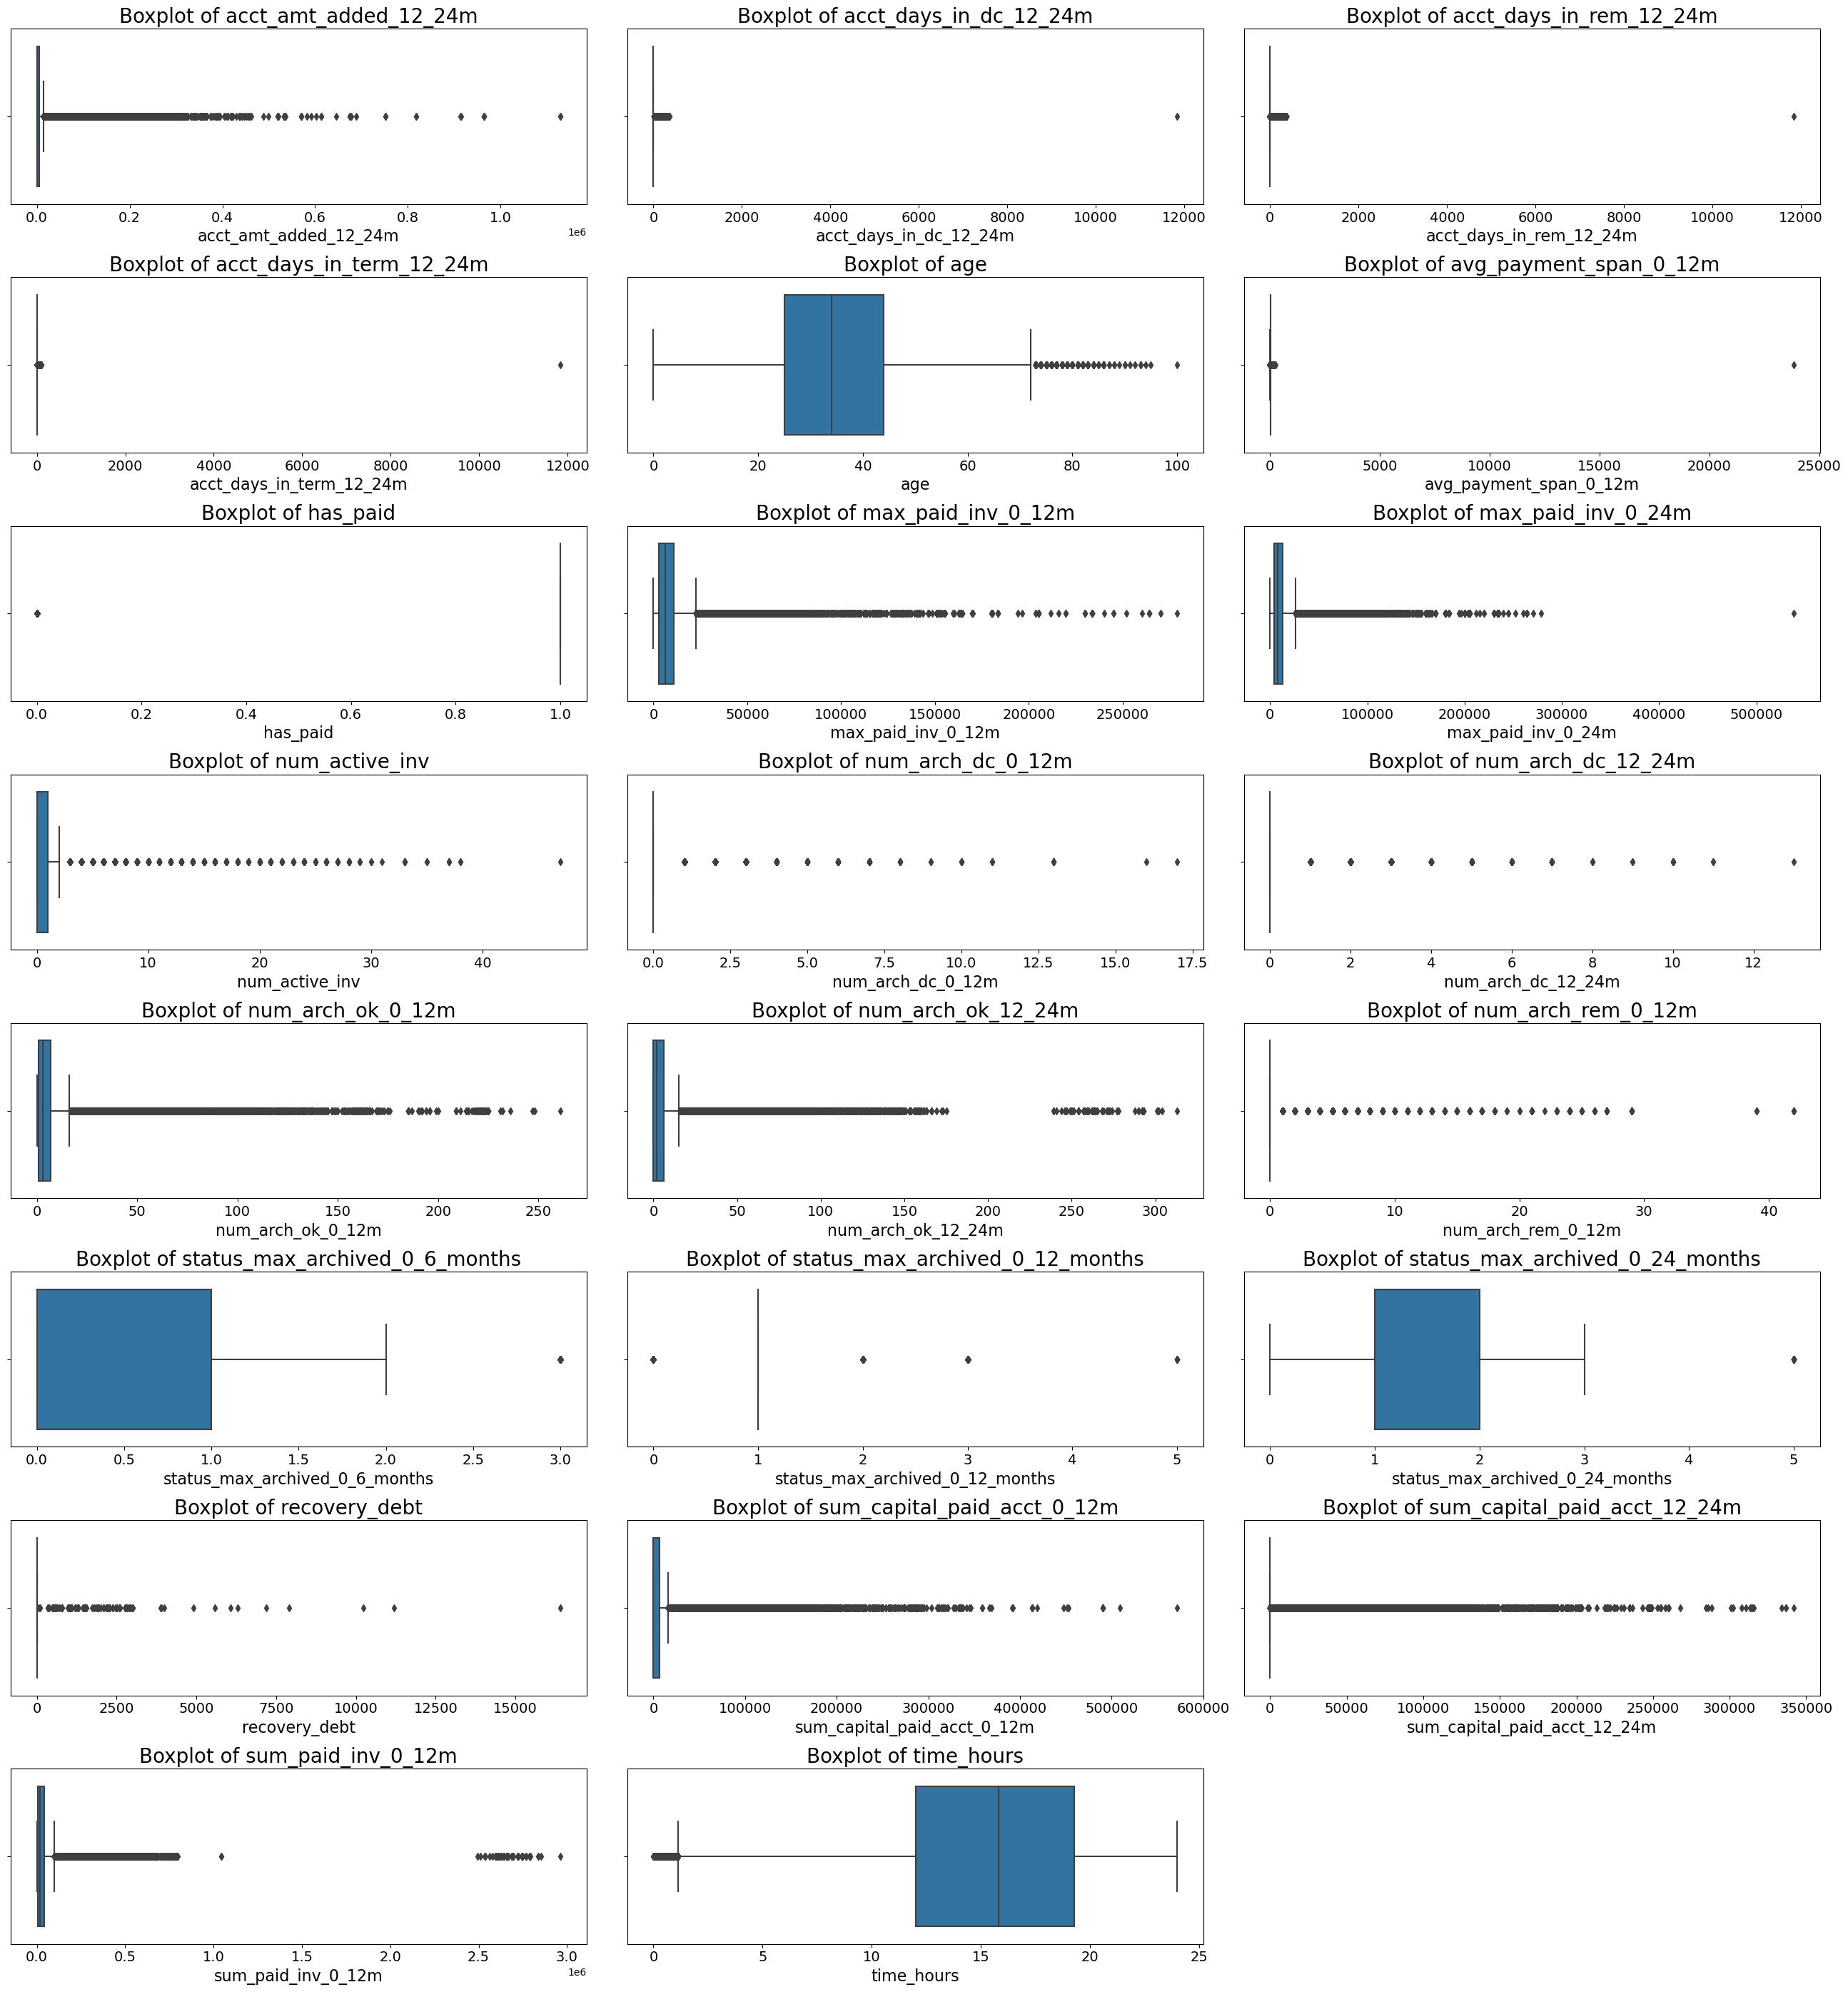

In [46]:
plt.figure(figsize=(26,28))  # Setting the figure size
p = 1  # Initialize a counter for subplot

# Loop through each column in the DataFrame, excluding specific ones
for i in df_2.drop(['default','merchant_category','merchant_group'], axis=1):
    plt.subplot(8, 3, p)  # Create a subplot grid with 8 rows and 3 columns
    p += 1  # Increment the subplot index
    
    sns.boxplot(data=df_2, x=df_2[i])  # Create a boxplot for the column
    plt.title('Boxplot of {}'.format(i), fontsize=20)  # Set the title
    plt.xticks(fontsize=14)  # Set the font size for x-tick labels
    plt.xlabel(i, fontsize=16)  # Set the font size for x-axis label

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show() 

#### All the variables have outliers except 'time_hours'.
#### Some variables have one or two outliers while some have a large number of outliers.
#### Thus, we are going to use Inter-quartile-range (IQR) method for treating the outliers.

In [47]:
for i in df_2.drop(['default','merchant_category','merchant_group'], axis=1):
    q1 = df_2[i].quantile(0.25)  # Calculate the first quartile
    q3 = df_2[i].quantile(0.75)  # Calculate the third quartile
    iqr = q3 - q1  # Calculate the interquartile range (IQR)
    
    ul = q3 + (1.5 * iqr)  # Calculate the upper limit for outliers
    ll = q1 - (1.5 * iqr)  # Calculate the lower limit for outliers
    
    # Cap values greater than the upper limit
    df_2[i] = np.where(df_2[i] > ul, ul, df_2[i])
    
    # Floor values less than the lower limit
    df_2[i] = np.where(df_2[i] < ll, ll, df_2[i])

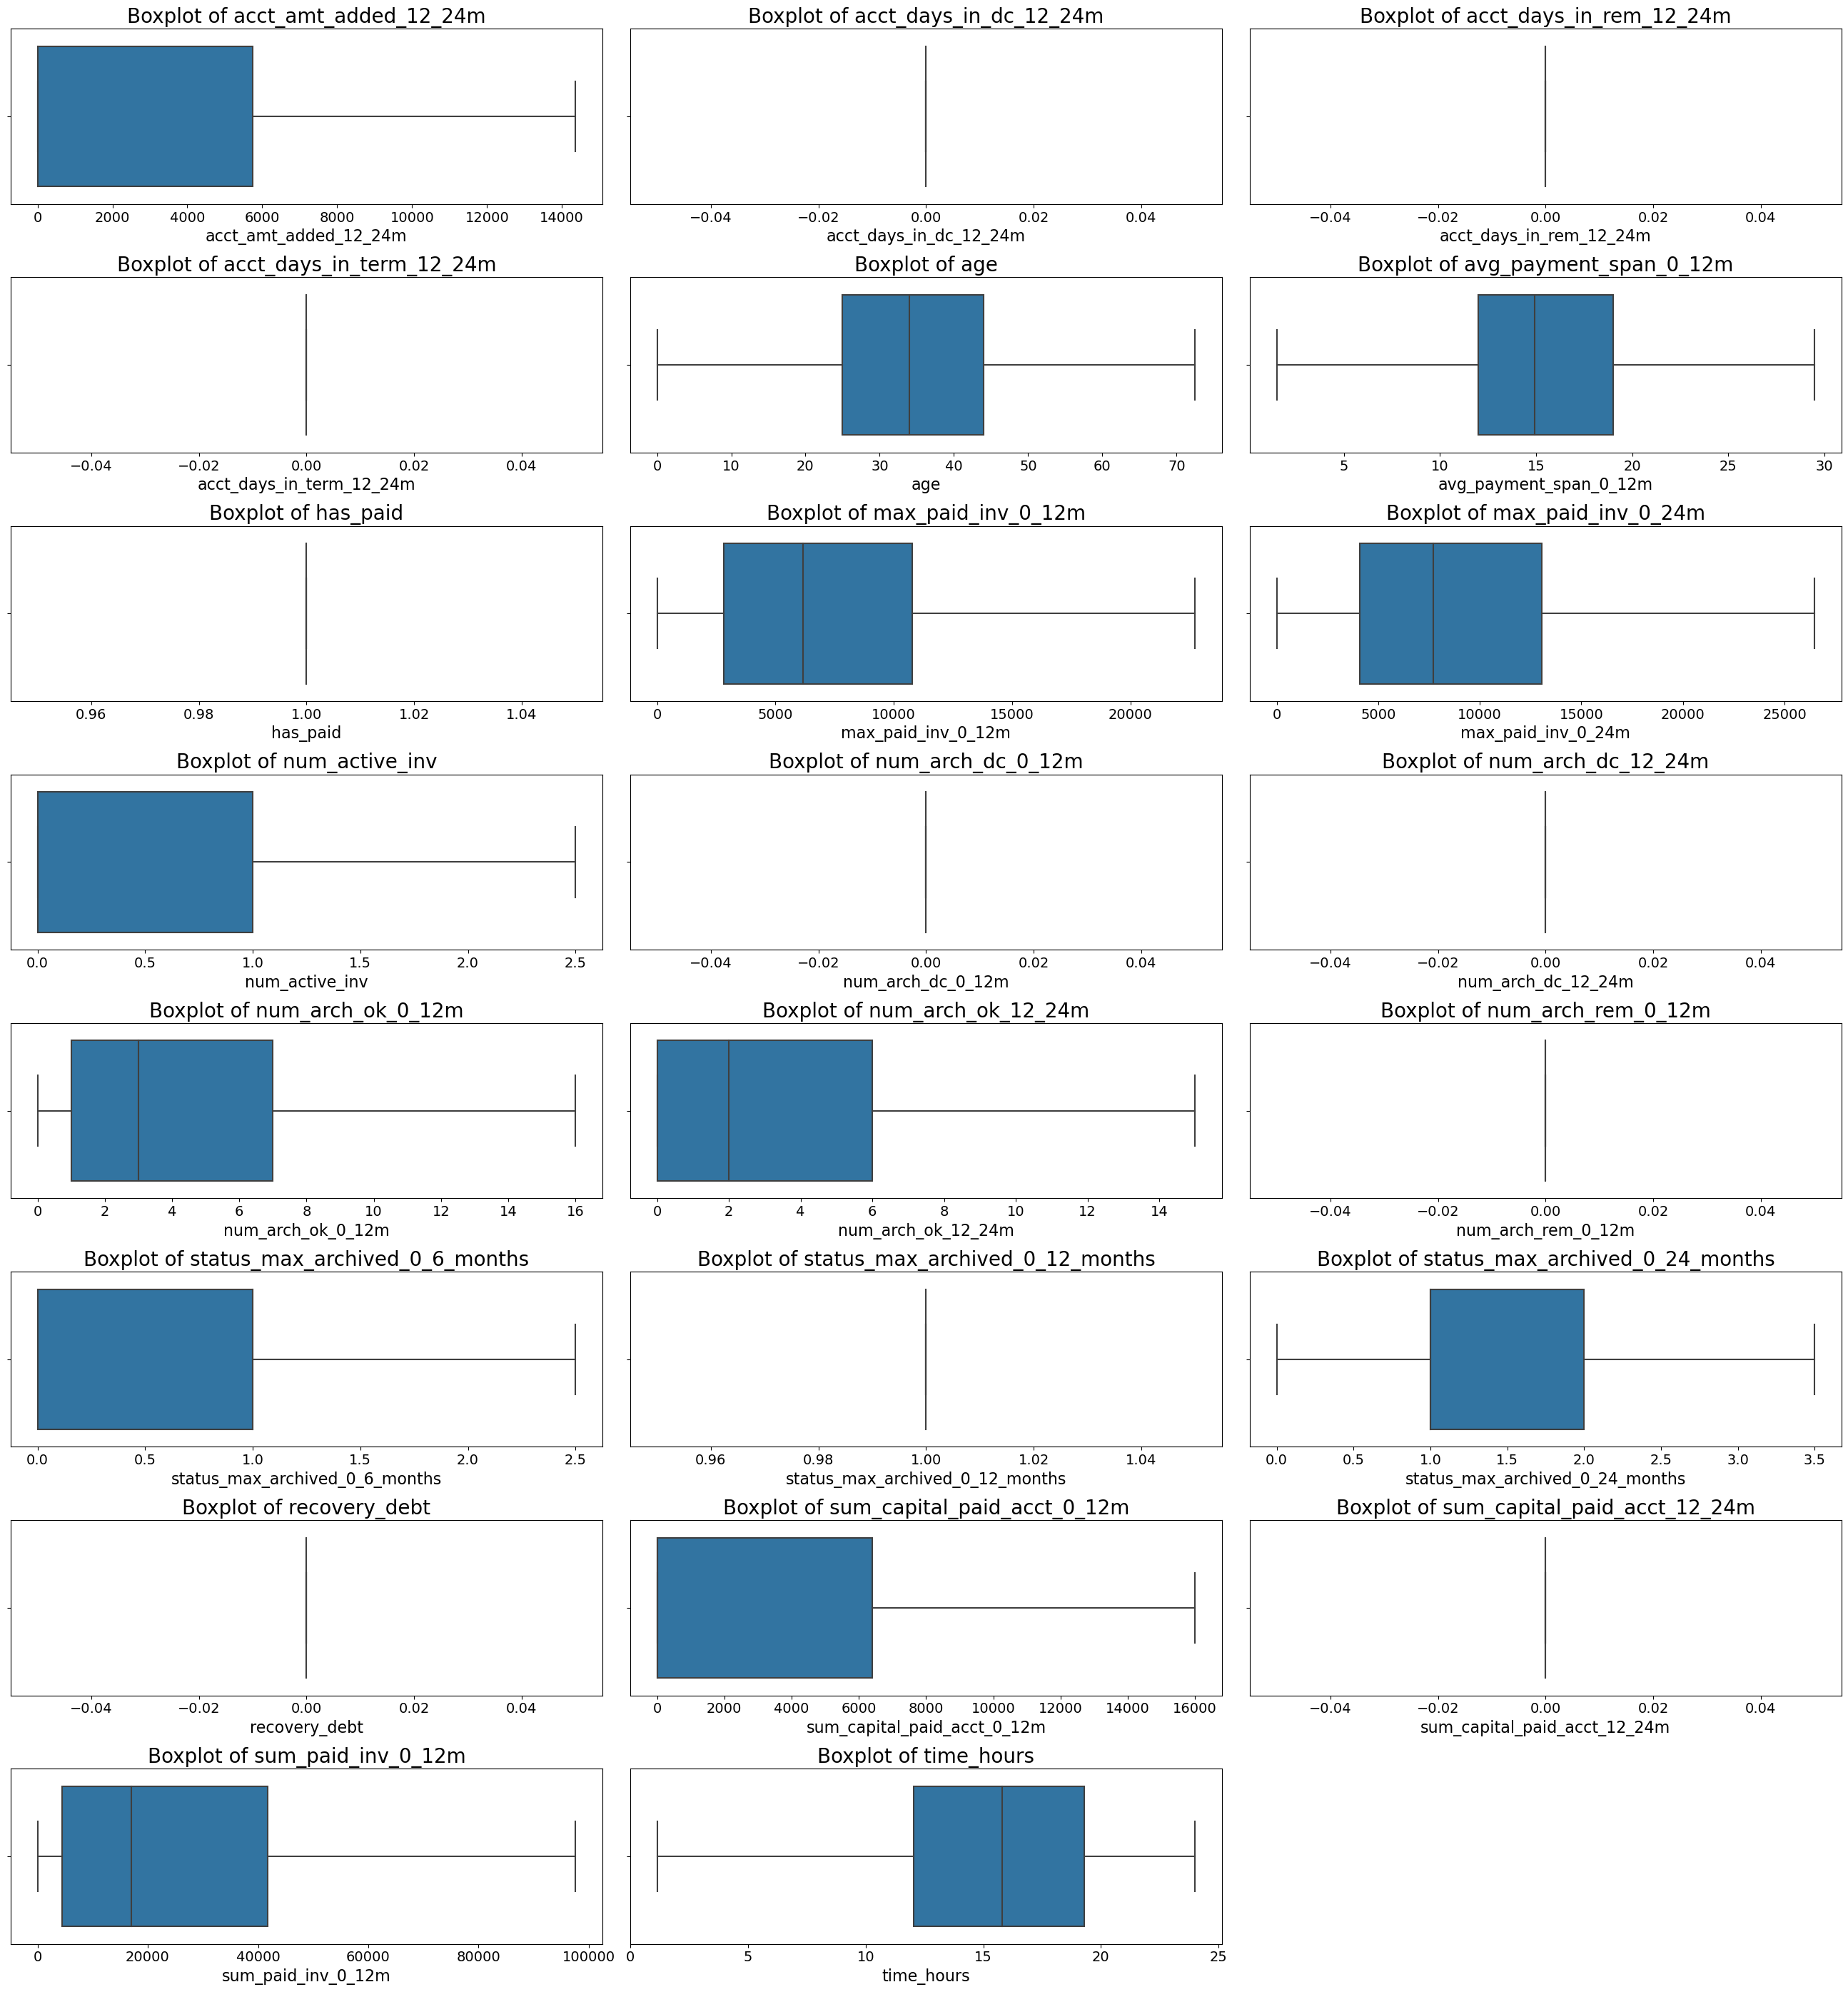

In [48]:
plt.figure(figsize=(26, 28))
p = 1
for i in df_2.drop(['default', 'merchant_category', 'merchant_group'], axis=1):
    plt.subplot(8, 3, p) 
    p += 1
    sns.boxplot(data=df_2, x=df_2[i]) 
    plt.title('Boxplot of {}'.format(i), fontsize=20)
    plt.xticks(fontsize=14)
    plt.xlabel(i, fontsize=16)
    plt.tight_layout()

plt.show()

##### As we can see outliers, all the outliers now have been treated

In [49]:
df_2.describe().T

count     mean      std  min     25%  \
default                         97173.00     0.01     0.11 0.00    0.00   
acct_amt_added_12_24m           97173.00  3462.01  5836.70 0.00    0.00   
acct_days_in_dc_12_24m          97173.00     0.00     0.00 0.00    0.00   
acct_days_in_rem_12_24m         97173.00     0.00     0.00 0.00    0.00   
acct_days_in_term_12_24m        97173.00     0.00     0.00 0.00    0.00   
age                             97173.00    35.63    12.58 0.00   25.00   
avg_payment_span_0_12m          97173.00    15.95     6.70 1.50   12.00   
has_paid                        97173.00     1.00     0.00 1.00    1.00   
max_paid_inv_0_12m              97173.00  7634.93  6634.08 0.00 2820.00   
max_paid_inv_0_24m              97173.00  9423.95  7666.97 0.00 4085.00   
num_active_inv                  97173.00     0.43     0.75 0.00    0.00   
num_arch_dc_0_12m               97173.00     0.00     0.00 0.00    0.00   
num_arch_dc_12_24m              97173.00     0.00     0.00 0.00    0.00   
num_arch_ok_0_12m               97173.00     4.70     5.25 0.00    1.00   
num_arch_ok_12_24m              97173.00     4.02     4.99 0.00    0.00   
num_arch_rem_0_12m              97173.00     0.00     0.00 0.00    0.00   
status_max_archived_0_6_months  97173.00     0.83     0.66 0.00    0.00   
status_max_archived_0_12_months 97173.00     1.00     0.00 1.00    1.00   
status_max_archived_0_24_months 97173.00     1.23     0.79 0.00    1.00   
recovery_debt                   97173.00     0.00     0.00 0.00    0.00   
sum_capital_paid_acct_0_12m     97173.00  3837.04  6405.61 0.00    0.00   
sum_capital_paid_acct_12_24m    97173.00     0.00     0.00 0.00    0.00   
sum_paid_inv_0_12m              97173.00 28526.84 31006.71 0.00 4495.00   
time_hours                      97173.00    15.39     4.79 1.13   12.02   

                                     50%      75%      max  
default                             0.00     0.00     1.00  
acct_amt_added_12_24m               0.00  5745.00 14362.50  
acct_days_in_dc_12_24m              0.00     0.00     0.00  
acct_days_in_rem_12_24m             0.00     0.00     0.00  
acct_days_in_term_12_24m            0.00     0.00     0.00  
age                                34.00    44.00    72.50  
avg_payment_span_0_12m             14.92    19.00    29.50  
has_paid                            1.00     1.00     1.00  
max_paid_inv_0_12m               6170.00 10785.00 22732.50  
max_paid_inv_0_24m               7720.00 13044.00 26482.50  
num_active_inv                      0.00     1.00     2.50  
num_arch_dc_0_12m                   0.00     0.00     0.00  
num_arch_dc_12_24m                  0.00     0.00     0.00  
num_arch_ok_0_12m                   3.00     7.00    16.00  
num_arch_ok_12_24m                  2.00     6.00    15.00  
num_arch_rem_0_12m                  0.00     0.00     0.00  
status_max_archived_0_6_months      1.00     1.00     2.50  
status_max_archived_0_12_months     1.00     1.00     1.00  
status_max_archived_0_24_months     1.00     2.00     3.50  
recovery_debt                       0.00     0.00     0.00  
sum_capital_paid_acct_0_12m         0.00  6400.00 16000.00  
sum_capital_paid_acct_12_24m        0.00     0.00     0.00  
sum_paid_inv_0_12m              17057.50 41730.00 97582.50  
time_hours                         15.81    19.28    24.00

#### As we can see some of the variables have only zeroes left in their columns. Therefore dropping such variables which are of no use in our analysis

### Removal of Unwanted Variables

In [50]:
df_2.drop(['acct_days_in_dc_12_24m','acct_days_in_rem_12_24m','acct_days_in_term_12_24m',
              'num_arch_dc_0_12m','num_arch_dc_12_24m','num_arch_rem_0_12m',
              'recovery_debt','sum_capital_paid_acct_12_24m','has_paid',
              'status_max_archived_0_12_months'],axis=1, inplace = True)

In [51]:
df_2.describe().T

count     mean      std  min     25%  \
default                         97173.00     0.01     0.11 0.00    0.00   
acct_amt_added_12_24m           97173.00  3462.01  5836.70 0.00    0.00   
age                             97173.00    35.63    12.58 0.00   25.00   
avg_payment_span_0_12m          97173.00    15.95     6.70 1.50   12.00   
max_paid_inv_0_12m              97173.00  7634.93  6634.08 0.00 2820.00   
max_paid_inv_0_24m              97173.00  9423.95  7666.97 0.00 4085.00   
num_active_inv                  97173.00     0.43     0.75 0.00    0.00   
num_arch_ok_0_12m               97173.00     4.70     5.25 0.00    1.00   
num_arch_ok_12_24m              97173.00     4.02     4.99 0.00    0.00   
status_max_archived_0_6_months  97173.00     0.83     0.66 0.00    0.00   
status_max_archived_0_24_months 97173.00     1.23     0.79 0.00    1.00   
sum_capital_paid_acct_0_12m     97173.00  3837.04  6405.61 0.00    0.00   
sum_paid_inv_0_12m              97173.00 28526.84 31006.71 0.00 4495.00   
time_hours                      97173.00    15.39     4.79 1.13   12.02   

                                     50%      75%      max  
default                             0.00     0.00     1.00  
acct_amt_added_12_24m               0.00  5745.00 14362.50  
age                                34.00    44.00    72.50  
avg_payment_span_0_12m             14.92    19.00    29.50  
max_paid_inv_0_12m               6170.00 10785.00 22732.50  
max_paid_inv_0_24m               7720.00 13044.00 26482.50  
num_active_inv                      0.00     1.00     2.50  
num_arch_ok_0_12m                   3.00     7.00    16.00  
num_arch_ok_12_24m                  2.00     6.00    15.00  
status_max_archived_0_6_months      1.00     1.00     2.50  
status_max_archived_0_24_months     1.00     2.00     3.50  
sum_capital_paid_acct_0_12m         0.00  6400.00 16000.00  
sum_paid_inv_0_12m              17057.50 41730.00 97582.50  
time_hours                         15.81    19.28    24.00

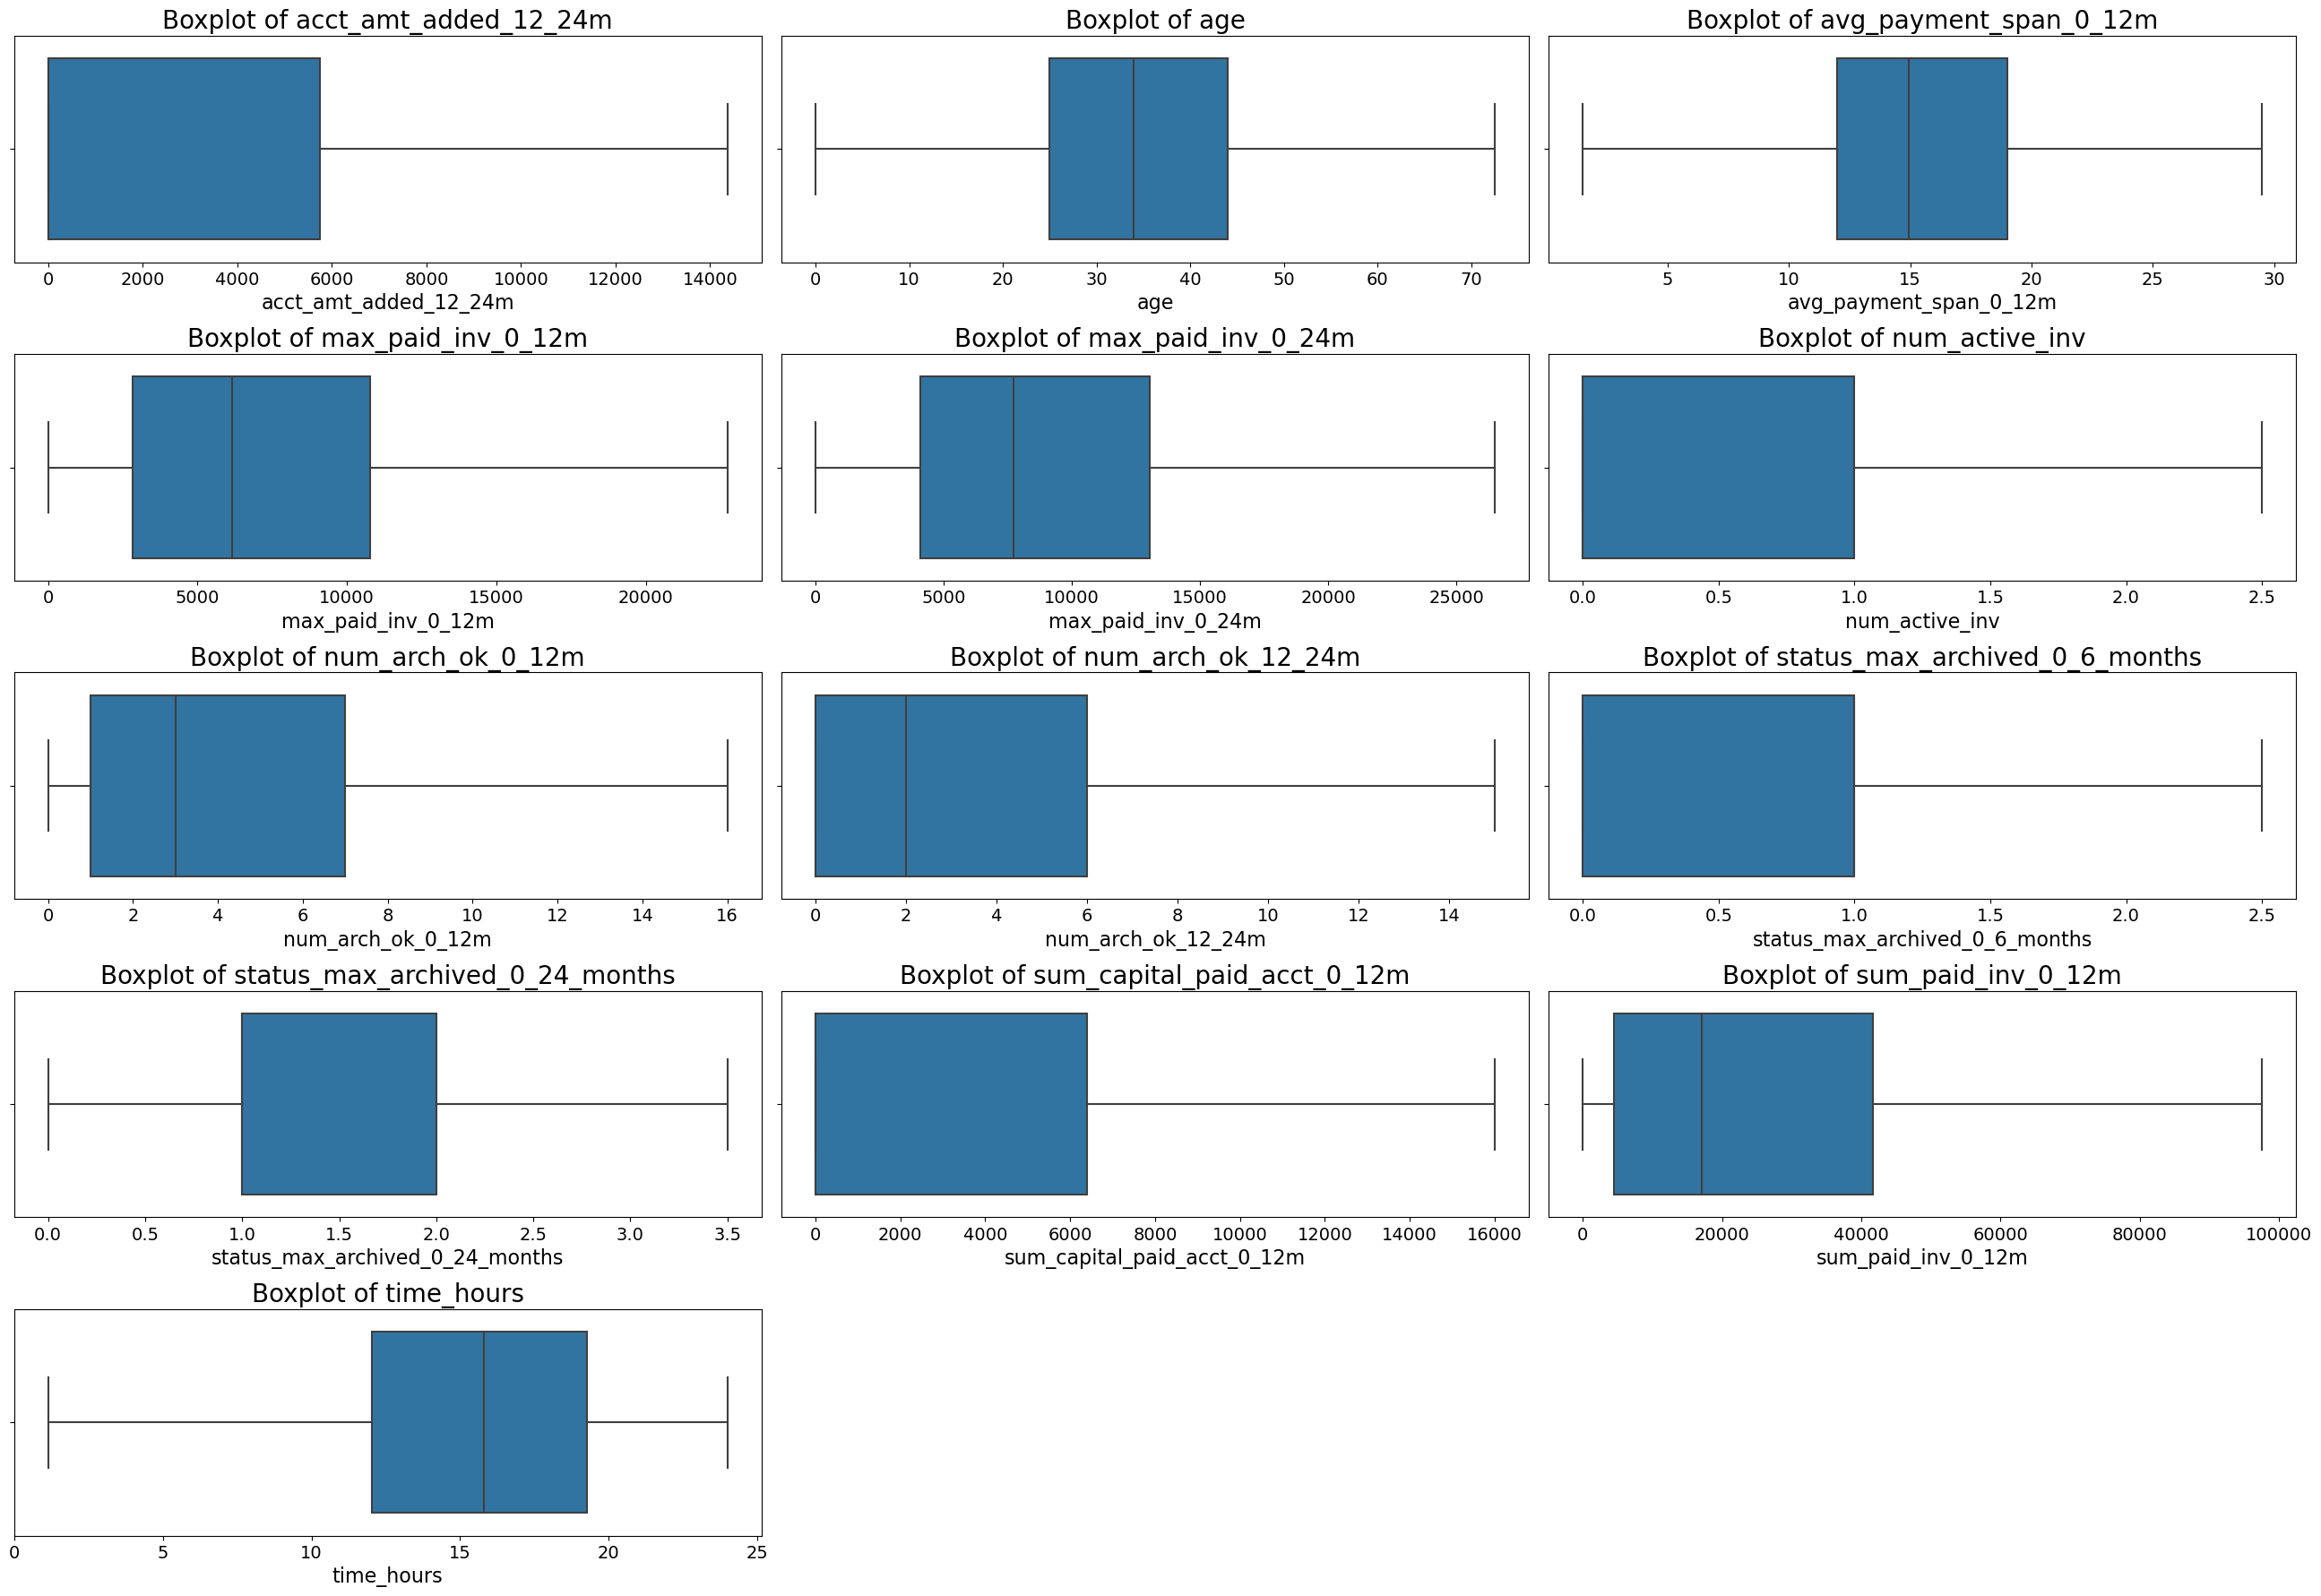

In [52]:
plt.figure(figsize=(26, 28))
p = 1

# Iterate through columns in df_2 excluding 'default', 'merchant_category', and 'merchant_group'
for i in df_2.drop(['default', 'merchant_category', 'merchant_group'], axis=1).columns:
    plt.subplot(8, 3, p)
    p += 1
    sns.boxplot(data=df_2, x=df_2[i])  # Use df_2 here to match the columns
    plt.title('Boxplot of {}'.format(i), fontsize=20)
    plt.xticks(fontsize=14)
    plt.xlabel(i, fontsize=16)
    plt.tight_layout()

plt.show()

### VARIABLE TRANSFORMATION

In [53]:
predictors = df_2.drop(['default','merchant_category','merchant_group'],axis=1)
response = df_2['default']

### Scaling the predictors using StandardScaler (response binary in nature, doesn't need scaling)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [55]:
credit_scaled = pd.concat([scaled_predictors, response], axis = 1)

In [56]:
credit_scaled.columns

Index(['acct_amt_added_12_24m', 'age', 'avg_payment_span_0_12m',
       'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'num_active_inv',
       'num_arch_ok_0_12m', 'num_arch_ok_12_24m',
       'status_max_archived_0_6_months', 'status_max_archived_0_24_months',
       'sum_capital_paid_acct_0_12m', 'sum_paid_inv_0_12m', 'time_hours',
       'default'],
      dtype='object')

In [57]:
credit_scaled.head()

acct_amt_added_12_24m   age  avg_payment_span_0_12m  max_paid_inv_0_12m  \
0                  -0.59 -1.24                   -0.49                2.28   
1                  -0.59  1.14                    1.47                0.92   
2                  -0.59 -1.08                    0.60                2.28   
3                  -0.59  0.03                   -1.68                2.28   
4                  -0.59 -0.85                   -0.44               -0.08   

   max_paid_inv_0_24m  num_active_inv  num_arch_ok_0_12m  num_arch_ok_12_24m  \
0                2.22            2.08               1.58                2.00   
1                0.56           -0.57               0.82                2.20   
2                2.22            0.76               1.20               -0.81   
3                2.22            0.76               2.15                2.20   
4               -0.30           -0.57              -0.71               -0.81   

   status_max_archived_0_6_months  status_max_archived_0_24_months  \
0                            0.26                            -0.29   
1                            0.26                             0.98   
2                            0.26                             0.98   
3                            0.26                            -0.29   
4                            0.26                            -0.29   

   sum_capital_paid_acct_0_12m  sum_paid_inv_0_12m  time_hours  default  
0                        -0.60                2.23       -1.20     0.00  
1                        -0.60                0.66       -0.46     0.00  
2                        -0.60                2.23       -0.80     0.00  
3                        -0.60                2.23        0.08     0.00  
4                        -0.60               -0.69       -0.56     0.00

In [58]:
credit_scaled.describe().T

count  mean  std   min   25%   50%  75%  \
acct_amt_added_12_24m           97173.00 -0.00 1.00 -0.59 -0.59 -0.59 0.39   
age                             97173.00  0.00 1.00 -2.83 -0.85 -0.13 0.67   
avg_payment_span_0_12m          97173.00 -0.00 1.00 -2.16 -0.59 -0.15 0.45   
max_paid_inv_0_12m              97173.00 -0.00 1.00 -1.15 -0.73 -0.22 0.47   
max_paid_inv_0_24m              97173.00  0.00 1.00 -1.23 -0.70 -0.22 0.47   
num_active_inv                  97173.00 -0.00 1.00 -0.57 -0.57 -0.57 0.76   
num_arch_ok_0_12m               97173.00  0.00 1.00 -0.90 -0.71 -0.32 0.44   
num_arch_ok_12_24m              97173.00 -0.00 1.00 -0.81 -0.81 -0.41 0.40   
status_max_archived_0_6_months  97173.00  0.00 1.00 -1.25 -1.25  0.26 0.26   
status_max_archived_0_24_months 97173.00  0.00 1.00 -1.56 -0.29 -0.29 0.98   
sum_capital_paid_acct_0_12m     97173.00 -0.00 1.00 -0.60 -0.60 -0.60 0.40   
sum_paid_inv_0_12m              97173.00  0.00 1.00 -0.92 -0.78 -0.37 0.43   
time_hours                      97173.00  0.00 1.00 -2.97 -0.70  0.09 0.81   
default                         97173.00  0.01 0.11  0.00  0.00  0.00 0.00   

                                 max  
acct_amt_added_12_24m           1.87  
age                             2.93  
avg_payment_span_0_12m          2.02  
max_paid_inv_0_12m              2.28  
max_paid_inv_0_24m              2.22  
num_active_inv                  2.75  
num_arch_ok_0_12m               2.15  
num_arch_ok_12_24m              2.20  
status_max_archived_0_6_months  2.52  
status_max_archived_0_24_months 2.89  
sum_capital_paid_acct_0_12m     1.90  
sum_paid_inv_0_12m              2.23  
time_hours                      1.80  
default                         1.00

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_k

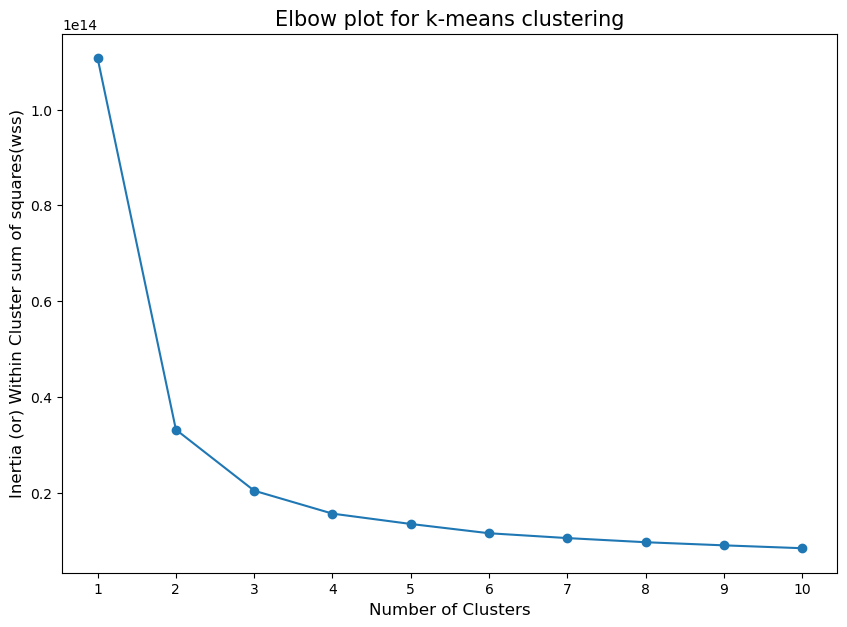

In [59]:
from sklearn.cluster import KMeans
wss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state = 123)
    kmeans.fit(predictors)
    wss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.xticks(np.arange(1,11))
plt.plot(range(1,11),wss,marker='o')
plt.title('Elbow plot for k-means clustering', fontsize=15)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia (or) Within Cluster sum of squares(wss)', fontsize=12)
plt.show()

In [60]:
k_means=KMeans(n_clusters=3, random_state = 123)
k_means.fit(predictors)
clusters = k_means.labels_
df_2.insert(0,'Clusters', clusters)
df_2.head()

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters  default  acct_amt_added_12_24m   age  avg_payment_span_0_12m  \
0         1     0.00                   0.00 20.00                   12.69   
1         2     0.00                   0.00 50.00                   25.83   
2         1     0.00                   0.00 22.00                   20.00   
3         1     0.00                   0.00 36.00                    4.69   
4         0     0.00                   0.00 25.00                   13.00   

   max_paid_inv_0_12m  max_paid_inv_0_24m  num_active_inv  num_arch_ok_0_12m  \
0            22732.50            26482.50            2.00              13.00   
1            13749.00            13749.00            0.00               9.00   
2            22732.50            26482.50            1.00              11.00   
3            22732.50            26482.50            1.00              16.00   
4             7100.00             7100.00            0.00               1.00   

   num_arch_ok_12_24m  status_max_archived_0_6_months  \
0               14.00                            1.00   
1               15.00                            1.00   
2                0.00                            1.00   
3               15.00                            1.00   
4                0.00                            1.00   

   status_max_archived_0_24_months  sum_capital_paid_acct_0_12m  \
0                             1.00                         0.00   
1                             2.00                         0.00   
2                             2.00                         0.00   
3                             1.00                         0.00   
4                             1.00                         0.00   

   sum_paid_inv_0_12m  time_hours                           merchant_category  \
0            97582.50        9.65                         Dietary supplements   
1            49014.00       13.18                           Books & Magazines   
2            97582.50       11.56                   Diversified entertainment   
3            97582.50       15.75                   Diversified entertainment   
4             7100.00       12.70  Electronic equipment & Related accessories   

    merchant_group  
0  Health & Beauty  
1    Entertainment  
2    Entertainment  
3    Entertainment  
4      Electronics

In [61]:
df_2.Clusters.value_counts().sort_index()

0    59563
1    15379
2    22231
Name: Clusters, dtype: int64

In [62]:
credit1_sub = df_2[['merchant_group','Clusters','age','acct_amt_added_12_24m','avg_payment_span_0_12m']]
credit1_sub.head()

merchant_group  Clusters   age  acct_amt_added_12_24m  \
0  Health & Beauty         1 20.00                   0.00   
1    Entertainment         2 50.00                   0.00   
2    Entertainment         1 22.00                   0.00   
3    Entertainment         1 36.00                   0.00   
4      Electronics         0 25.00                   0.00   

   avg_payment_span_0_12m  
0                   12.69  
1                   25.83  
2                   20.00  
3                    4.69  
4                   13.00

In [63]:
Freq = credit1_sub.groupby('merchant_group').Clusters.value_counts().sort_index()
Freq

merchant_group         Clusters
0                      0               1
Automotive Products    0             668
                       1              80
                       2             189
Children Products      0            3046
                       1             842
                       2            1220
Clothing & Shoes       0            9481
                       1            2698
                       2            4548
Electronics            0            2086
                       1             345
                       2             603
Entertainment          0           26885
                       1            9465
                       2           12439
Erotic Materials       0             525
                       1              77
                       2             145
Food & Beverage        0             242
                       1              56
                       2              57
Health & Beauty        0            4345
                       1 

In [64]:
credit_profile = credit1_sub.groupby(['merchant_group','Clusters']).mean()
credit_profile.insert(0,'Frequency', Freq)
credit_profile

Frequency   age  acct_amt_added_12_24m  \
merchant_group        Clusters                                           
0                     0                 1  0.00                   0.00   
Automotive Products   0               668 37.23                2142.29   
                      1                80 34.61                3989.53   
                      2               189 34.79                3683.74   
Children Products     0              3046 35.17                2743.50   
                      1               842 32.61                7286.83   
                      2              1220 32.58                5737.98   
Clothing & Shoes      0              9481 30.36                2822.92   
                      1              2698 30.79                6951.34   
                      2              4548 29.53                5639.55   
Electronics           0              2086 37.33                2820.70   
                      1               345 33.92                4947.13   
                      2               603 34.53                4985.39   
Entertainment         0             26885 37.62                2058.31   
                      1              9465 38.03                4400.64   
                      2             12439 37.32                3593.58   
Erotic Materials      0               525 34.68                2401.66   
                      1                77 33.05                5210.20   
                      2               145 32.45                5165.83   
Food & Beverage       0               242 39.39                3186.00   
                      1                56 38.52                4608.38   
                      2                57 32.96                6399.74   
Health & Beauty       0              4345 33.90                2606.57   
                      1              1133 31.68                5766.85   
                      2              1878 31.05                4792.18   
Home & Garden         0              2459 39.80                2680.70   
                      1               483 34.16                6041.89   
                      2               776 34.76                5434.06   
Intangible products   0               957 45.87                2510.47   
                      1                48 35.67                7100.12   
                      2               117 37.14                5106.56   
Jewelry & Accessories 0               647 34.78                3352.41   
                      1               152 31.81                7274.27   
                      2               259 32.97                5801.96   
Leisure               0              8221 35.85                4441.19   

                                avg_payment_span_0_12m  
merchant_group        Clusters                          
0                     0                          29.50  
Automotive Products   0                          15.24  
                      1                          15.92  
                      2                          16.16  
Children Products     0                          16.13  
                      1                          18.19  
                      2                          18.42  
Clothing & Shoes      0                          16.50  
                      1                          18.43  
                      2                          19.05  
Electronics           0                          15.39  
                      1                          15.58  
                      2                          16.68  
Entertainment         0                          15.02  
                      1                          14.76  
                      2                          15.37  
Erotic Materials      0                          15.98  
                      1                          15.71  
                      2                          18.18  
Food & Beverage       0                          14.97  
                      1                

## NOTES 2: MODEL BUILDING & TUNING

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.gridspec as gridspec
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response,
                                        test_size = 0.30, random_state = 1, stratify = response)

In [67]:
response.value_counts(normalize=True)

0.00   0.99
1.00   0.01
Name: default, dtype: float64

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state=1, sampling_strategy=0.67)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [69]:
from collections import Counter
print('Original class distribution:', Counter(y_train))
print('Resampled class distribution:', Counter(y_res))

Original class distribution: Counter({0.0: 67125, 1.0: 896})
Resampled class distribution: Counter({0.0: 67125, 1.0: 44973})


In [70]:
print('Resampled class proportion:')
print('---------------------------')
print(y_res.value_counts(normalize=True), '\n\n')

# Print the original class distribution
print('Original class proportion:')
print('--------------------------')
print(y_train.value_counts(normalize=True))

Resampled class proportion:
---------------------------
0.00   0.60
1.00   0.40
Name: default, dtype: float64 


Original class proportion:
--------------------------
0.00   0.99
1.00   0.01
Name: default, dtype: float64


In [71]:
X_train1 = X_res.copy()
X_test1 = X_test.copy()

### LOGISTIC REGRESSION

In [72]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train1)

In [73]:
X_test2 = sm.add_constant(X_test1)

In [74]:
logit_model = sm.Logit(y_res, X_train2)  
result_lgr = logit_model.fit()

print(result_lgr.summary())

Optimization terminated successfully.
         Current function value: 0.491424
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               112098
Model:                          Logit   Df Residuals:                   112084
Method:                           MLE   Df Model:                           13
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.2703
Time:                        18:13:40   Log-Likelihood:                -55088.
converged:                       True   LL-Null:                       -75497.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.6711      0.040     16.748  

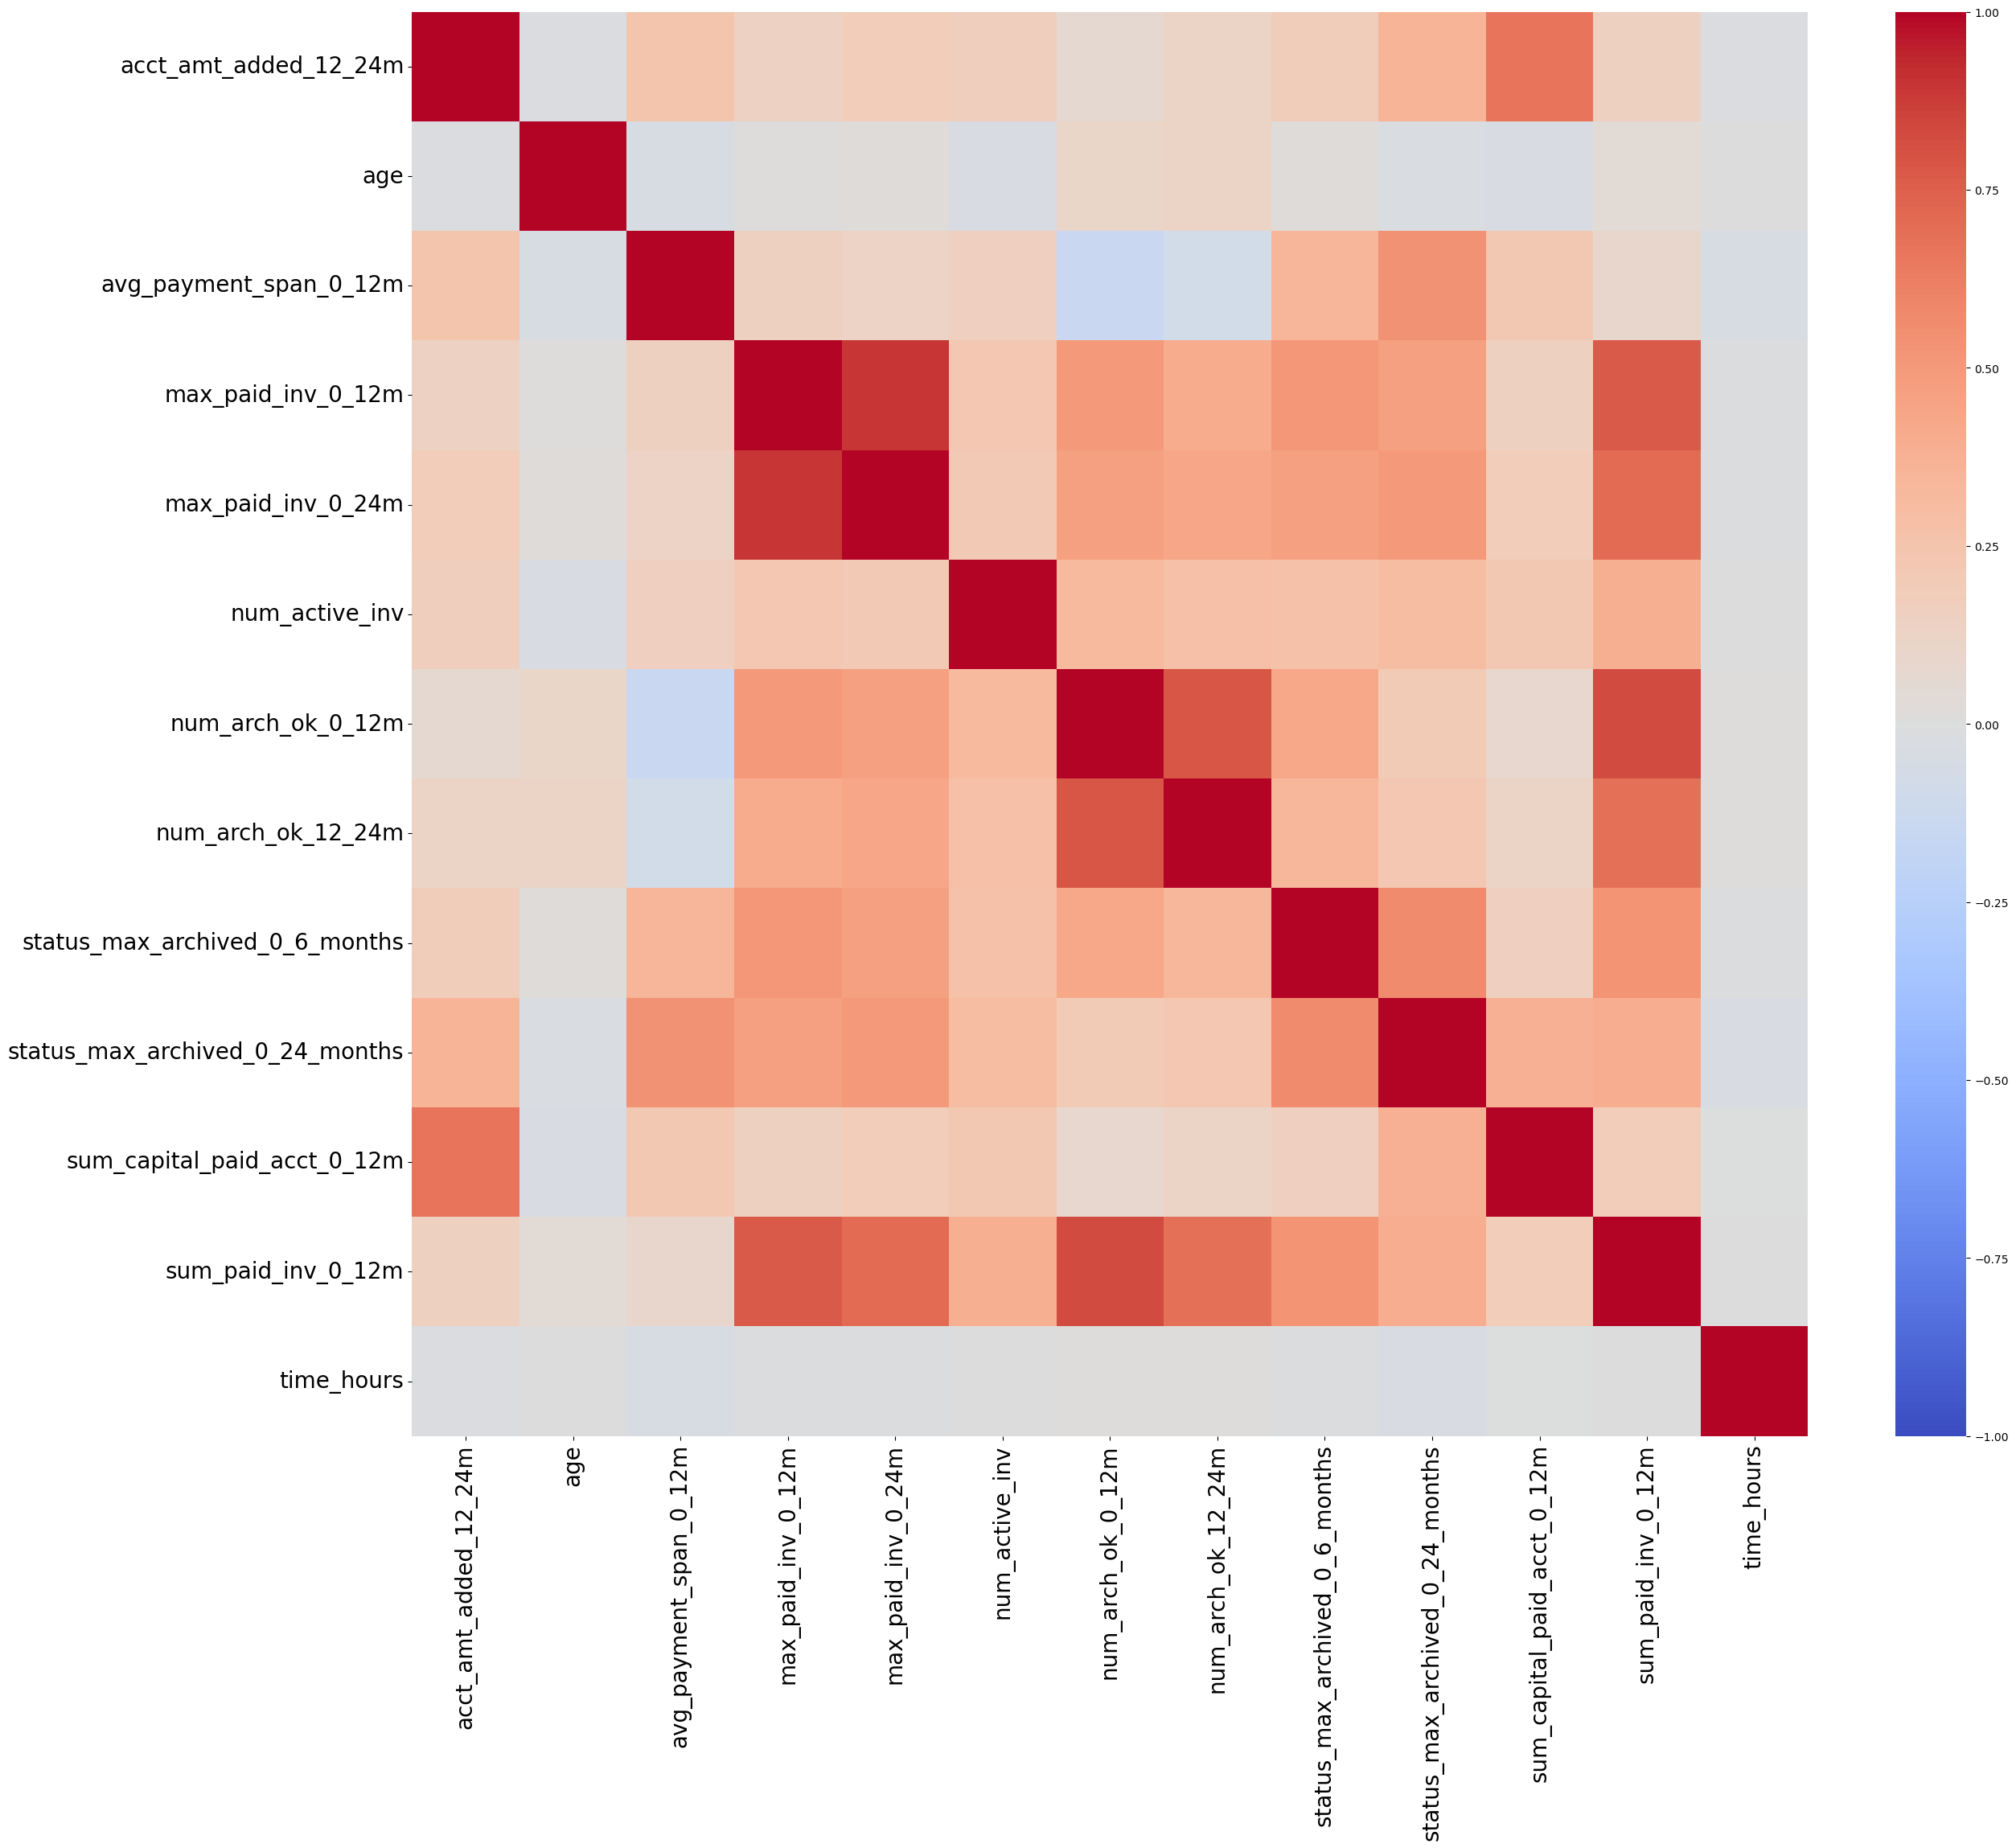

In [75]:
plt.figure(figsize = (28,23))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cor_matrix = X_train1.corr()
sns.heatmap(cor_matrix, cmap = 'coolwarm', vmin = -1, vmax= 1)
plt.show()

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
i= pd.Series([vif(X_train2.values, j) for j in range(X_train2.shape[1])],index=X_train2.columns)
i.sort_values(ascending =False, inplace = True)
print('VIF Values for the variables:')
print('-----------------------------')
print(i)

VIF Values for the variables:
-----------------------------
const                             29.35
sum_paid_inv_0_12m                 7.79
max_paid_inv_0_12m                 6.88
num_arch_ok_0_12m                  5.83
max_paid_inv_0_24m                 5.45
num_arch_ok_12_24m                 2.85
status_max_archived_0_24_months    2.37
sum_capital_paid_acct_0_12m        1.94
status_max_archived_0_6_months     1.90
acct_amt_added_12_24m              1.87
avg_payment_span_0_12m             1.74
num_active_inv                     1.27
age                                1.03
time_hours                         1.00
dtype: float64


In [77]:
pseudo_r_squared = np.round(result_lgr.prsquared, 3)
print("Pseudo R-squared with all the variables present:", pseudo_r_squared)

Pseudo R-squared with all the variables present: 0.27


In [78]:
X_train3 = X_train2.drop(["sum_paid_inv_0_12m"], axis=1)
logit_model2 = sm.Logit(y_res, X_train3)  
result_lgr2 = logit_model2.fit()
pseudo_r_squared = np.round(result_lgr2.prsquared, 3)
print("Pseudo R-squared after dropping 'sum_paid_inv_0_12m':", pseudo_r_squared)

Optimization terminated successfully.
         Current function value: 0.494729
         Iterations 7
Pseudo R-squared after dropping 'sum_paid_inv_0_12m': 0.265


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Compute VIF for each feature in the dataset
vif_values = pd.Series([vif(X_train3.values, j) for j in range(X_train3.shape[1])], index=X_train3.columns)

# Sort VIF values in descending order for better interpretation
vif_values.sort_values(ascending=False, inplace=True)

# Display the VIF values
print('VIF Values for the variables:')
print('-----------------------------')
print(vif_values)

VIF Values for the variables:
-----------------------------
const                             28.44
max_paid_inv_0_12m                 5.55
max_paid_inv_0_24m                 5.44
num_arch_ok_0_12m                  3.43
num_arch_ok_12_24m                 2.82
status_max_archived_0_24_months    2.36
sum_capital_paid_acct_0_12m        1.93
status_max_archived_0_6_months     1.90
acct_amt_added_12_24m              1.87
avg_payment_span_0_12m             1.66
num_active_inv                     1.23
age                                1.03
time_hours                         1.00
dtype: float64


In [80]:
# Drop the variable 'max_paid_inv_0_12m' from the training set
X_train4 = X_train3.drop(["max_paid_inv_0_12m"], axis=1)

# Fit the logistic regression model
logit_model3 = sm.Logit(y_res, X_train4)
result_lgr3 = logit_model3.fit()

# Calculate the Pseudo R-squared value and round it to 3 decimal places
pseudo_r_squared = np.round(result_lgr3.prsquared, 3)
print("Pseudo R-squared after dropping 'max_paid_inv_0_12m':", pseudo_r_squared)

Optimization terminated successfully.
         Current function value: 0.495113
         Iterations 7
Pseudo R-squared after dropping 'max_paid_inv_0_12m': 0.265


In [81]:
# Compute VIF for each feature in X_train4
i = pd.Series([vif(X_train4.values, j) for j in range(X_train4.shape[1])], index=X_train4.columns)

# Sort VIF values in descending order
i.sort_values(ascending=False, inplace=True)

# Print the VIF values
print('VIF Values for the variables:')
print('-----------------------------')
print(i)

VIF Values for the variables:
-----------------------------
const                             28.43
num_arch_ok_0_12m                  3.25
num_arch_ok_12_24m                 2.74
status_max_archived_0_24_months    2.36
sum_capital_paid_acct_0_12m        1.93
acct_amt_added_12_24m              1.87
status_max_archived_0_6_months     1.85
max_paid_inv_0_24m                 1.67
avg_payment_span_0_12m             1.65
num_active_inv                     1.23
age                                1.02
time_hours                         1.00
dtype: float64


#### No significant multicollinearity is present in the dataset, as the VIF values are generally below 5, with only the constant showing a high VIF. This is normal for the constant term.
#### The highest VIF among the non-constant variables is 3.25, which is still well below the typical threshold of concern (5 or 10). This indicates that multicollinearity is not a significant issue for your predictors.

### Interpretation:
VIF for constant (28.43): This value is expected to be high, as the constant isn't directly related to multicollinearity among the independent variables.
The other variables have relatively low VIF values, which suggests that there is no severe collinearity, meaning you likely don't need to drop any more variables at this stage based on multicollinearity concerns.

In [82]:
y_res.value_counts()

0.00    67125
1.00    44973
Name: default, dtype: int64

In [83]:
y_test.value_counts()

0.00    28768
1.00      384
Name: default, dtype: int64

In [84]:
print("\nNormalized resampled class distribution:")
print(y_res.value_counts(normalize=True))
print("\nNormalized test set class distribution:")
print(y_test.value_counts(normalize=True))


Normalized resampled class distribution:
0.00   0.60
1.00   0.40
Name: default, dtype: float64

Normalized test set class distribution:
0.00   0.99
1.00   0.01
Name: default, dtype: float64


In [85]:
# Building logistic regression model after treating multicollinearity
logit_model = sm.Logit(y_res, X_train4)  # X_train4 is after VIF treatment
result_lgr = logit_model.fit()

# Output the summary of the model
print(result_lgr.summary())

# Getting the Pseudo R-squared
pseudo_r_squared = np.round(result_lgr.prsquared, 3)
print("Pseudo R-squared:", pseudo_r_squared)

Optimization terminated successfully.
         Current function value: 0.495113
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               112098
Model:                          Logit   Df Residuals:                   112086
Method:                           MLE   Df Model:                           11
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.2649
Time:                        18:13:49   Log-Likelihood:                -55501.
converged:                       True   LL-Null:                       -75497.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.4629      0.039     11.854  

In [86]:
X_train1 = X_train1.drop(["sum_paid_inv_0_12m", "max_paid_inv_0_12m", "sum_capital_paid_acct_0_12m"], axis=1)
X_test1 = X_test1.drop(["sum_paid_inv_0_12m", "max_paid_inv_0_12m", "sum_capital_paid_acct_0_12m"], axis=1)

In [87]:
X_train2 = sm.add_constant(X_train1)

In [88]:
X_test2 = sm.add_constant(X_test1)

In [89]:
# Building logistic regression model after treating multicollinearity
logit_model = sm.Logit(y_res, X_train2)  # X_train4 is after VIF treatment
result_lgr = logit_model.fit()

# Output the summary of the model
print(result_lgr.summary())

# Getting the Pseudo R-squared
pseudo_r_squared = np.round(result_lgr.prsquared, 3)
print("Pseudo R-squared:", pseudo_r_squared)

Optimization terminated successfully.
         Current function value: 0.495118
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               112098
Model:                          Logit   Df Residuals:                   112087
Method:                           MLE   Df Model:                           10
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.2649
Time:                        18:13:50   Log-Likelihood:                -55502.
converged:                       True   LL-Null:                       -75497.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.4642      0.039     11.891  

### All variables have very low p-values (P>|z|), which means they are statistically significant at any common significance level (0.01, 0.05, etc.).

In [90]:
train_pred_lgr = result_lgr.predict(X_train2)
test_pred_lgr = result_lgr.predict(X_test2)

In [91]:
y_class_train_pred = [1 if p > 0.5 else 0 for p in train_pred_lgr]

In [92]:
y_class_test_pred = [1 if p > 0.5 else 0 for p in test_pred_lgr]

In [93]:
from sklearn import metrics

print('Classification Report for Train Data:')
print('------------------------------------')
print(metrics.classification_report(y_res, y_class_train_pred))
print('======================================================\n')

print('Classification Report for Test Data:')
print('-----------------------------------')
print(metrics.classification_report(y_test, y_class_test_pred))

Classification Report for Train Data:
------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79     67125
         1.0       0.69      0.70      0.69     44973

    accuracy                           0.75    112098
   macro avg       0.74      0.74      0.74    112098
weighted avg       0.75      0.75      0.75    112098


Classification Report for Test Data:
-----------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88     28768
         1.0       0.04      0.62      0.07       384

    accuracy                           0.79     29152
   macro avg       0.52      0.70      0.48     29152
weighted avg       0.98      0.79      0.87     29152



In [94]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [95]:
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression()

# Train the model on training data
model.fit(X_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
# Get predicted probabilities for the positive class
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and find optimal threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Adjust predictions based on the optimal threshold
adjusted_predictions = np.where(predicted_probabilities > optimal_threshold, 1, 0)

# Evaluate the new classification
from sklearn.metrics import classification_report
print(classification_report(y_test, adjusted_predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.66      0.80     28768
         1.0       0.03      0.69      0.05       384

    accuracy                           0.66     29152
   macro avg       0.51      0.68      0.42     29152
weighted avg       0.98      0.66      0.79     29152



In [97]:
print('The optimum Cut-off value is:',optimal_threshold)

The optimum Cut-off value is: 0.012811063101656622


In [99]:
y_class_train_pred = [1 if pred > 0.013 else 0 for pred in train_pred_lgr]

In [100]:
y_class_test_pred = [1 if pred > 0.013 else 0 for pred in test_pred_lgr]


In [101]:
print("Updated classification_report for train data:")
print("--------------------------------------------")
print(metrics.classification_report(y_res, y_class_train_pred))
print("======================================================\n")
print("Updated classification_report for test data:")
print("-------------------------------------------")
print(metrics.classification_report(y_test, y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.15      0.26     67125
         1.0       0.44      1.00      0.61     44973

    accuracy                           0.49    112098
   macro avg       0.72      0.57      0.43    112098
weighted avg       0.77      0.49      0.40    112098


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25     28768
         1.0       0.02      1.00      0.03       384

    accuracy                           0.15     29152
   macro avg       0.51      0.57      0.14     29152
weighted avg       0.99      0.15      0.24     29152



#### OBSERVATIONS:
1. The model is performing reasonably well on the training data but exhibits significant overfitting on the testing data.
2. The model is biased towards the majority class (class 0), especially on the testing data.
3. The model might be struggling to accurately classify instances of class 1, particularly on the testing data.

### Updated Confusion matrix for the train data based on optimum threshold of 0.013:

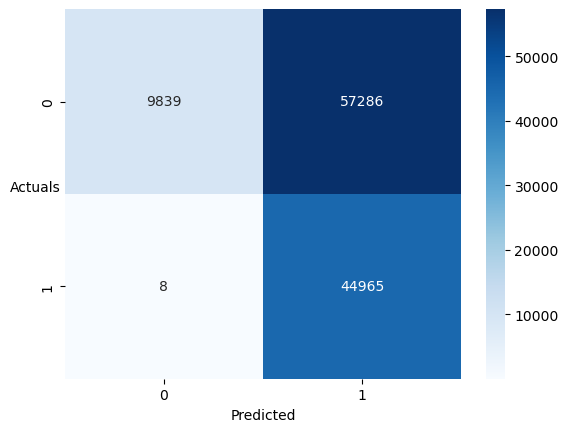

In [102]:
#Calculate Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_res, y_class_train_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.show()

### Updated Confusion matrix for the test data based on optimum threshold of 0.013:

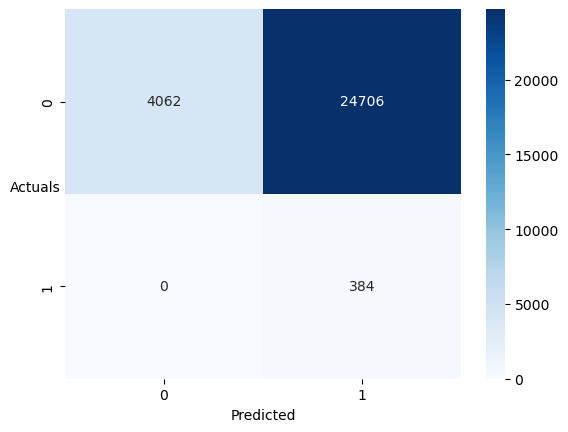

In [103]:
confusion_matrix = metrics.confusion_matrix(y_test, y_class_test_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.show()

AUC for training data: 0.828


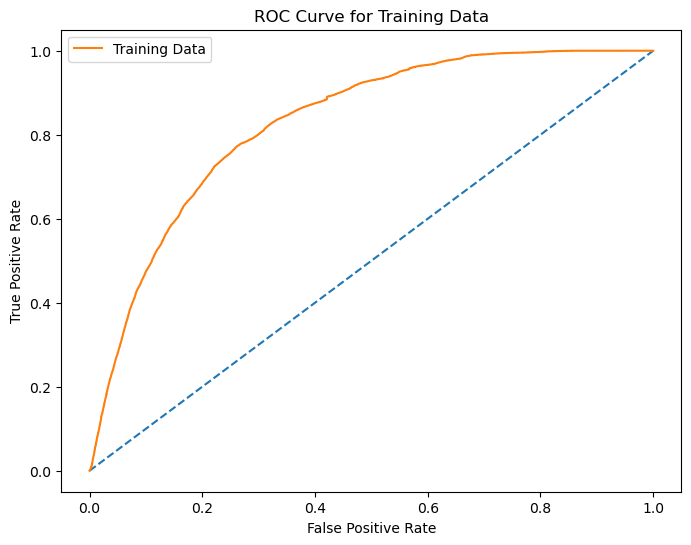

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate AUC for training data
train_auc = roc_auc_score(y_res, train_pred_lgr)
print('AUC for training data: %.3f' % train_auc)

# Calculate ROC curve for training data
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, train_pred_lgr)

# Plot ROC curve for training data
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line (random classifier)
plt.plot(train_fpr, train_tpr, label='Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend()
plt.show()

AUC for testing data: 0.799


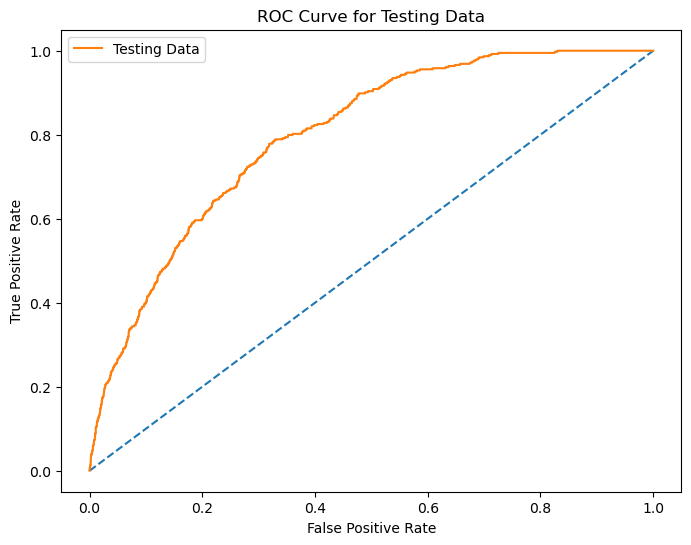

In [105]:
# Calculate AUC for testing data
test_auc = roc_auc_score(y_test, test_pred_lgr)
print('AUC for testing data: %.3f' % test_auc)

# Calculate ROC curve for testing data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_pred_lgr)

# Plot ROC curve for testing data
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line (random classifier)
plt.plot(test_fpr, test_tpr, label='Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Data')
plt.legend()
plt.show()

### RANDOM FOREST CLASSIFIER

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [107]:
random_forest_classifier = RandomForestClassifier()

In [108]:
random_forest_classifier.fit(X_train, y_train)
predictions = random_forest_classifier.predict(X_test)
accuracy_rcf = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy_rcf * 100))

Accuracy: 98.54%


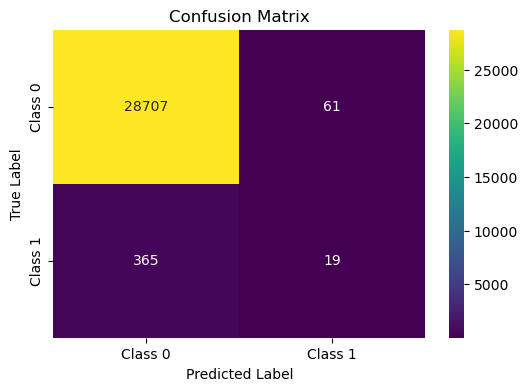

In [109]:
# Assuming 'predictions' contains the predicted labels after threshold adjustment
conf_matrix_rcf = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rcf, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [110]:
target_names = ['Non-Defaulters: 0', 'Defaulters: 1']
class_report_rcf = classification_report(y_test, predictions, target_names =target_names, output_dict=True)
class_report_df = pd.DataFrame(class_report_rcf).transpose()
class_report_df

precision  recall  f1-score  support
Non-Defaulters: 0       0.99    1.00      0.99 28768.00
Defaulters: 1           0.24    0.05      0.08   384.00
accuracy                0.99    0.99      0.99     0.99
macro avg               0.61    0.52      0.54 29152.00
weighted avg            0.98    0.99      0.98 29152.00

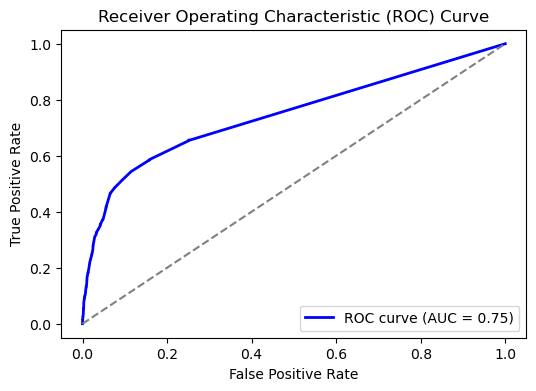

AUC Score: 0.75


In [111]:
# Make predictions
predictions = random_forest_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc_rcf = roc_auc_score(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rcf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC Score
print("AUC Score: {:.2f}".format(roc_auc_rcf))

### 3) BAGGING

In [112]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

bag_model = BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=10, n_jobs=-1), n_estimators=10, random_state=1, n_jobs=-1)

bag_model.fit(X_train1, y_res)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                        n_jobs=-1),
                  n_jobs=-1, random_state=1)

In [113]:
train_pred_bag = bag_model.predict(X_train1)
test_pred_bag = bag_model.predict(X_test1)

In [114]:
print('train data:')
print('-----------')
print(metrics.classification_report(y_res, train_pred_bag))

print('======================================================')

print('test data:')
print('----------')
print(metrics.classification_report(y_test, test_pred_bag))

train data:
-----------
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     67125
         1.0       0.86      0.89      0.88     44973

    accuracy                           0.90    112098
   macro avg       0.90      0.90      0.90    112098
weighted avg       0.90      0.90      0.90    112098

test data:
----------
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     28768
         1.0       0.05      0.43      0.10       384

    accuracy                           0.89     29152
   macro avg       0.52      0.67      0.52     29152
weighted avg       0.98      0.89      0.93     29152



### TRAINING DATA
Class 0 (majority class):

Precision (0.93) and Recall (0.91): High values, indicating the model performs well on class 0 (negative class).
F1-score (0.92): This indicates good balance between precision and recall for class 0.

Class 1 (minority class):

Precision (0.86) and Recall (0.89): Also strong, showing that the model is learning well on both classes in the training set.
F1-score (0.88): High score, suggesting balanced performance.

Overall Accuracy (0.90): The model has learned the training data well, but there’s a risk of overfitting due to the large gap in class performance when compared to the test set.

#### TESTING DATA
Test Data (Performance on Test Set):
Class 0 (majority class):

Precision (0.99) and Recall (0.90): Still very high, but the recall has dropped compared to the training data, suggesting the model is slightly less confident in catching all negatives.

Class 1 (minority class):

Precision (0.05): Very low, indicating that the model is predicting many false positives (instances wrongly predicted as class 1).
Recall (0.43): The model is catching some positives, but it's missing over half of the true positives.
F1-score (0.10): Very low, which is expected due to the poor precision and modest recall.
Overall Accuracy (0.89): The high accuracy is misleading because the model is heavily biased toward the majority class (class 0).

Key Observations:
Overfitting: The model performs very well on the training data but struggles on the minority class (class 1) in the test set. This indicates overfitting — the model has learned to classify the majority class (class 0) well but fails on the minority class in new, unseen data.

Class Imbalance: The large difference in precision and recall between classes in the test data points to a class imbalance problem, where class 0 dominates the model’s decisions.

### Tuning the base model based on optimum threshold value:

In [115]:
train_probs_bag = bag_model.predict_proba(X_train1)[:,1]   # keep probabilities for the positive outcome only
test_probs_bag = bag_model.predict_proba(X_test1)[:,1]

In [116]:
fpr, tpr, thresholds = roc_curve(y_res, train_probs_bag)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimum Cut-off value is:',optimal_threshold)

The optimum Cut-off value is: 0.45381226521269974


In [117]:
# Apply the optimal threshold to make predictions
train_preds_optimal = (train_probs_bag > optimal_threshold).astype(int)
test_preds_optimal = (test_probs_bag > optimal_threshold).astype(int)

# Evaluate the performance of the model with the new threshold
from sklearn.metrics import classification_report
print(classification_report(y_test, test_preds_optimal))

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92     28768
         1.0       0.05      0.55      0.09       384

    accuracy                           0.85     29152
   macro avg       0.52      0.70      0.50     29152
weighted avg       0.98      0.85      0.91     29152



### Updated Confusion matrix for the train and test data based on optimum cut-off of 0.4:

In [118]:
y_class_train_pred = np.where(np.array(train_probs_bag) > 0.4, 1, 0)

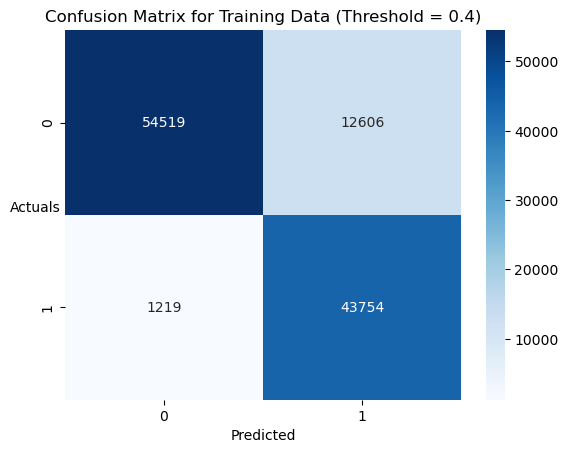

In [119]:
# Plot the confusion matrix
sns.heatmap(metrics.confusion_matrix(y_res, y_class_train_pred), annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.title('Confusion Matrix for Training Data (Threshold = 0.4)')
plt.show()

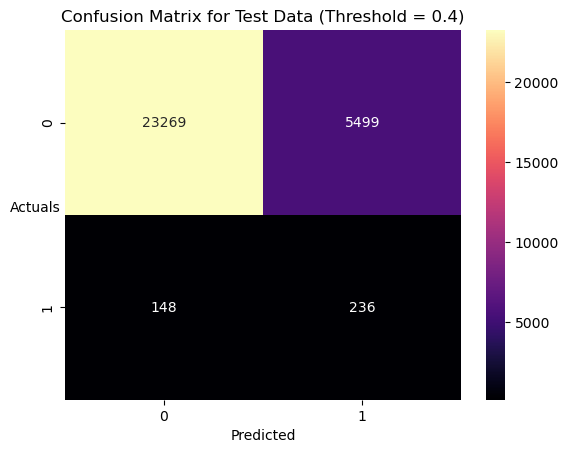

In [120]:
y_class_test_pred = np.where(np.array(test_probs_bag) > 0.4, 1, 0)

# Plot the confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_class_test_pred), annot=True, fmt='.5g', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.title('Confusion Matrix for Test Data (Threshold = 0.4)')
plt.show()

In [121]:
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(metrics.classification_report(y_res,y_class_train_pred))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(metrics.classification_report(y_test,y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89     67125
         1.0       0.78      0.97      0.86     44973

    accuracy                           0.88    112098
   macro avg       0.88      0.89      0.88    112098
weighted avg       0.90      0.88      0.88    112098


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89     28768
         1.0       0.04      0.61      0.08       384

    accuracy                           0.81     29152
   macro avg       0.52      0.71      0.48     29152
weighted avg       0.98      0.81      0.88     29152



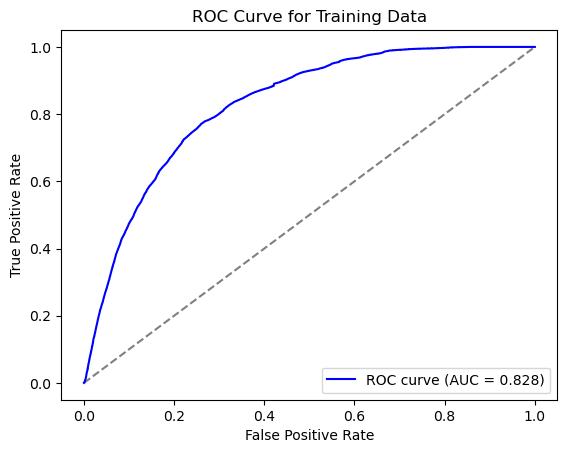

In [122]:
# Plotting the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(train_fpr, train_tpr, color='blue', label='ROC curve (AUC = {:.3f})'.format(train_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc='lower right')
plt.show()

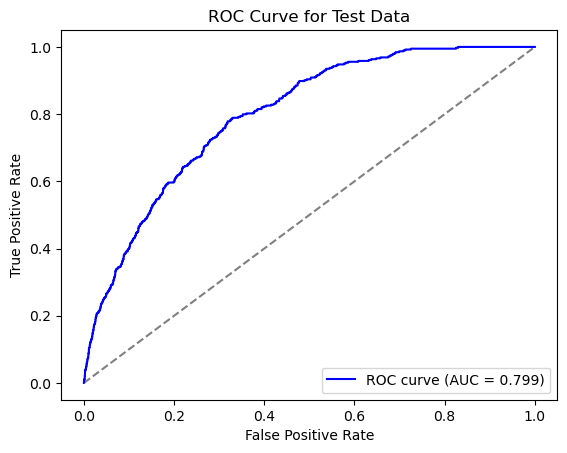

In [123]:
# Plotting the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(test_fpr, test_tpr, color='blue', label='ROC curve (AUC = {:.3f})'.format(test_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc='lower right')
plt.show()

## BOOSTING

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### a) ADA BOOSTING

In [125]:
adaboost_model = AdaBoostClassifier(random_state=1)
adaboost_model.fit(X_train1,y_res)

AdaBoostClassifier(random_state=1)

In [126]:
train_pred_ada = adaboost_model.predict(X_train1)
test_pred_ada = adaboost_model.predict(X_test1)

In [127]:
print('train data:\n===========\n')
print('Accuracy score on training data:\n-------------------------------\n', 
      adaboost_model.score(X_train1, y_res))
print('\n')
print('Classification Report:\n----------------------\n', 
      metrics.classification_report(y_res, train_pred_ada))

print('\n')

print('test data:\n===========\n')
print('Accuracy score on testing data:\n-------------------------------\n', 
      adaboost_model.score(X_test1, y_test))
print('\n')
print('Classification Report:\n----------------------\n', 
      metrics.classification_report(y_test, test_pred_ada))

train data:

Accuracy score on training data:
-------------------------------
 0.8374101232849828


Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     67125
         1.0       0.79      0.81      0.80     44973

    accuracy                           0.84    112098
   macro avg       0.83      0.83      0.83    112098
weighted avg       0.84      0.84      0.84    112098



test data:

Accuracy score on testing data:
-------------------------------
 0.8492041712403952


Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.99      0.85      0.92     28768
         1.0       0.04      0.51      0.08       384

    accuracy                           0.85     29152
   macro avg       0.52      0.68      0.50     29152
weighted avg       0.98      0.85      0.91     29152



### Is model overfitting or underfitting ?
The model is a overfitting with respect to our target class 1. Also the recall value for class 1 is quite low.
we will try to make the model performance better using hyper-parameter tuning with help of GridSearchCV.

## Model Tuning:

In [128]:
adaboost_model.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [129]:
grid={'n_estimators': [30, 50, 70],
    'learning_rate':[0.01,0.1,1],
     'algorithm': ['SAMME', 'SAMME.R']}

In [130]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = adaboost_model, param_grid = grid, cv = 7, n_jobs=-1)

In [131]:
grid_search.fit(X_train1, y_res)

GridSearchCV(cv=7, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [30, 50, 70]})

In [132]:
# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)

# Make predictions with the best model
best_predictions = best_model.predict(X_test1)
print('Updated Classification Report:\n', metrics.classification_report(y_test, best_predictions))

Best parameters found:  {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 70}
Updated Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     28768
         1.0       0.05      0.44      0.09       384

    accuracy                           0.88     29152
   macro avg       0.52      0.66      0.51     29152
weighted avg       0.98      0.88      0.92     29152



In [133]:
ada_best_model = grid_search.best_estimator_

In [134]:
train_pred_ada_best = ada_best_model.predict(X_train1)
test_pred_ada_best = ada_best_model.predict(X_test1)

In [135]:
# Print classification report for training data
print('Train Data:')
print('-----------')
print(classification_report(y_res, train_pred_ada_best))
print('======================================================')

# Print classification report for test data
print('Test Data:')
print('----------')
print(classification_report(y_test, test_pred_ada_best))

Train Data:
-----------
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     67125
         1.0       0.82      0.79      0.80     44973

    accuracy                           0.85    112098
   macro avg       0.84      0.84      0.84    112098
weighted avg       0.85      0.85      0.85    112098

Test Data:
----------
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     28768
         1.0       0.05      0.44      0.09       384

    accuracy                           0.88     29152
   macro avg       0.52      0.66      0.51     29152
weighted avg       0.98      0.88      0.92     29152



In [136]:
train_probs_ada = adaboost_model.predict_proba(X_train1)[:,1]   # keep probabilities for the positive outcome only
test_probs_ada = adaboost_model.predict_proba(X_test1)[:,1]

### Model tuning using Performance Metrics based on optimum cut-off (threshold value):

In [137]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_res, train_probs_ada)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('The optimum Cut-off value is:', optimal_threshold)

The optimum Cut-off value is: 0.49690986081978705


In [138]:
threshold = 0.496
y_class_train_pred = [1 if prob > threshold else 0 for prob in train_probs_ada]

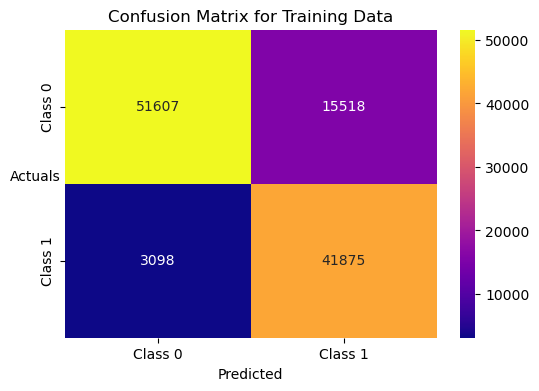

In [139]:
# Calculate the confusion matrix
conf_matrix_train = metrics.confusion_matrix(y_res, y_class_train_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt='.5g', cmap='plasma', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.title('Confusion Matrix for Training Data')
plt.show()

In [140]:
# Define the threshold
threshold = 0.496

# Convert probabilities to class predictions using the threshold
y_class_test_pred = (test_probs_ada > threshold).astype(int)

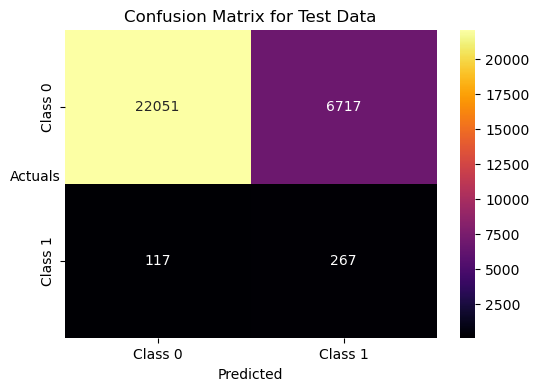

In [141]:
# Compute the confusion matrix
conf_matrix_test = metrics.confusion_matrix(y_test, y_class_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='.5g', cmap='inferno', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.title('Confusion Matrix for Test Data')
plt.show()

In [142]:
# Print classification report for train data
print('Updated Classification Report for Train Data:')
print('--------------------------------------------')
print(metrics.classification_report(y_res, y_class_train_pred))
print('======================================================\n')

# Print classification report for test data
print('Updated Classification Report for Test Data:')
print('-------------------------------------------')
print(metrics.classification_report(y_test, y_class_test_pred))

Updated Classification Report for Train Data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85     67125
         1.0       0.73      0.93      0.82     44973

    accuracy                           0.83    112098
   macro avg       0.84      0.85      0.83    112098
weighted avg       0.86      0.83      0.84    112098


Updated Classification Report for Test Data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.77      0.87     28768
         1.0       0.04      0.70      0.07       384

    accuracy                           0.77     29152
   macro avg       0.52      0.73      0.47     29152
weighted avg       0.98      0.77      0.86     29152



### AUC and ROC for the tuned Train data:

AUC for training data: 0.942


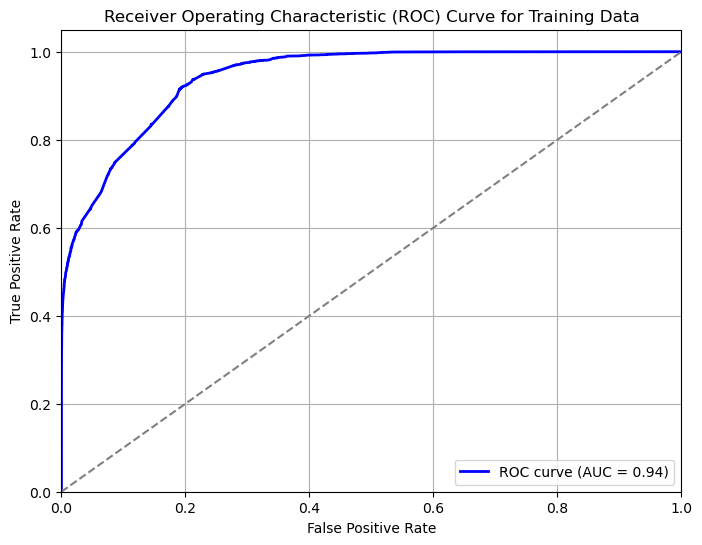

In [143]:
# Predict probabilities
probs = ada_best_model.predict_proba(X_train1)
# Keep probabilities for the positive outcome only
probs = probs[:, 1]

# Calculate AUC
train_auc = roc_auc_score(y_res, probs)
print('AUC for training data: %.3f' % train_auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(train_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

AUC for testing data: 0.812


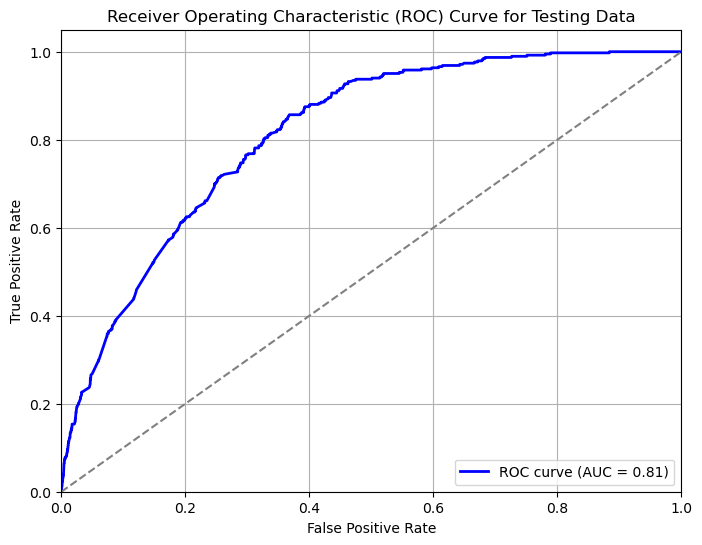

In [144]:
# Predict probabilities
probs = ada_best_model.predict_proba(X_test1)
# Keep probabilities for the positive outcome only
probs = probs[:, 1]

# Calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC for testing data: %.3f' % test_auc)

# Calculate ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(test_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Testing Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [145]:
# Get feature importances from the model
feature_importances = adaboost_model.feature_importances_

# Create a DataFrame with feature importances
importance_df = pd.DataFrame({
    'Feature': X_train1.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(importance_df)

                           Feature  Importance
4                   num_active_inv        0.30
7   status_max_archived_0_6_months        0.22
8  status_max_archived_0_24_months        0.14
5                num_arch_ok_0_12m        0.08
9                       time_hours        0.08
6               num_arch_ok_12_24m        0.06
1                              age        0.04
2           avg_payment_span_0_12m        0.04
3               max_paid_inv_0_24m        0.04
0            acct_amt_added_12_24m        0.00


### b) GRADIENT BOOSTING

In [146]:
gradboost_model = GradientBoostingClassifier(random_state=1)
gradboost_model.fit(X_train1,y_res)

GradientBoostingClassifier(random_state=1)

In [147]:
train_pred_grad = gradboost_model.predict(X_train1)
test_pred_grad = gradboost_model.predict(X_test1)

In [148]:
# Accuracy score on training data
print('Accuracy score on training data is:', gradboost_model.score(X_train1, y_res))

print('\n')

# Ensure train_pred_ada is the predictions from gradboost_model
# Predict training data using gradboost_model
train_pred_gradboost = gradboost_model.predict(X_train1)

# Print classification report for training data
print('Classification Report for Training Data:')
print('----------------------------------------')
print(metrics.classification_report(y_res, train_pred_gradboost))

Accuracy score on training data is: 0.8938428874734607


Classification Report for Training Data:
----------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     67125
         1.0       0.88      0.86      0.87     44973

    accuracy                           0.89    112098
   macro avg       0.89      0.89      0.89    112098
weighted avg       0.89      0.89      0.89    112098



In [149]:
# Accuracy score on testing data
print('Accuracy score on testing data is:', gradboost_model.score(X_test1, y_test))

print('\n')

# Ensure test_pred_ada is the predictions from gradboost_model
# Predict test data using gradboost_model
test_pred_gradboost = gradboost_model.predict(X_test1)

# Print classification report for test data
print('Classification Report for Testing Data:')
print('----------------------------------------')
print(metrics.classification_report(y_test, test_pred_gradboost))

Accuracy score on testing data is: 0.9109495060373216


Classification Report for Testing Data:
----------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     28768
         1.0       0.06      0.39      0.10       384

    accuracy                           0.91     29152
   macro avg       0.53      0.65      0.53     29152
weighted avg       0.98      0.91      0.94     29152



### MODEL TUNING

In [150]:
gradboost_model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [151]:
grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinking to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of individual trees
}

In [152]:
# Define the model
gradboost_model = GradientBoostingClassifier()

# Set up the grid search
grid_search = GridSearchCV(
    estimator=gradboost_model,
    param_grid=grid,
    cv=3,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores
    scoring='accuracy',  # Metric to optimize
    verbose=2  # Verbose level
)

In [153]:
# Fit grid search to the data
grid_search.fit(X_train1, y_res)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [154]:
# Print the best parameters and best score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Best Score: 0.9779567878106655


In [155]:
# Get the best model
best_gradboost_model = grid_search.best_estimator_

In [156]:
train_pred_grad_best = best_gradboost_model.predict(X_train1)
test_pred_grad_best = best_gradboost_model.predict(X_test1)

### Now checking the model performance on train and test data:
#### Model performance on the Train and Test Data

In [157]:
# Print classification report for training data
print('train data:')
print('-----------')
print(metrics.classification_report(y_res, train_pred_grad_best))
print('======================================================')

# Print classification report for testing data
print('test data:')
print('----------')
print(metrics.classification_report(y_test, test_pred_grad_best))

train data:
-----------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     67125
         1.0       0.99      0.97      0.98     44973

    accuracy                           0.98    112098
   macro avg       0.98      0.98      0.98    112098
weighted avg       0.98      0.98      0.98    112098

test data:
----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     28768
         1.0       0.07      0.06      0.06       384

    accuracy                           0.98     29152
   macro avg       0.53      0.52      0.53     29152
weighted avg       0.98      0.98      0.98     29152



### Getting the Predicted Classes and Probabilities:

In [158]:
# Predict probabilities for the positive class on training and testing data
train_probs_grad = best_gradboost_model.predict_proba(X_train1)[:, 1]   # Training data
test_probs_grad = best_gradboost_model.predict_proba(X_test1)[:, 1]     # Testing data

### Model tuning using Performance Metrics based on optimum cut-off (threshold value):

In [159]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_res, train_probs_grad)

# Find the index of the optimal threshold
optimal_idx = np.argmax(tpr - fpr)

# Get the optimal threshold value
optimal_threshold = thresholds[optimal_idx]

# Output the optimal threshold
print('The optimum Cut-off value is:', optimal_threshold)

The optimum Cut-off value is: 0.33771310256068277


In [160]:
y_class_train_pred = [1 if prob > 0.338 else 0 for prob in train_probs_grad]

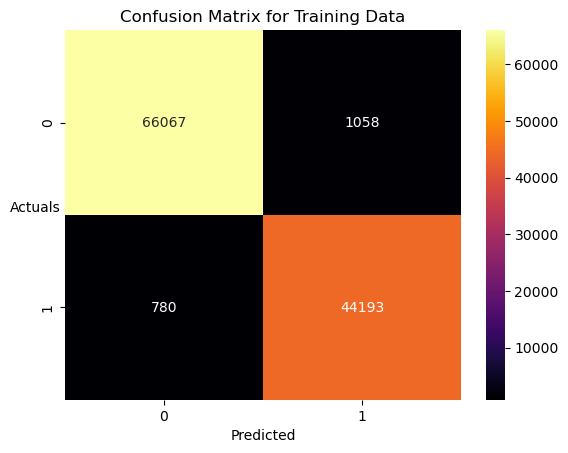

In [161]:
# Plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_res, y_class_train_pred), annot=True, fmt='.5g', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.title('Confusion Matrix for Training Data')
plt.show()

In [162]:
# Apply the threshold to convert test probabilities into class predictions
y_class_test_pred = [1 if prob > 0.456 else 0 for prob in test_probs_grad]

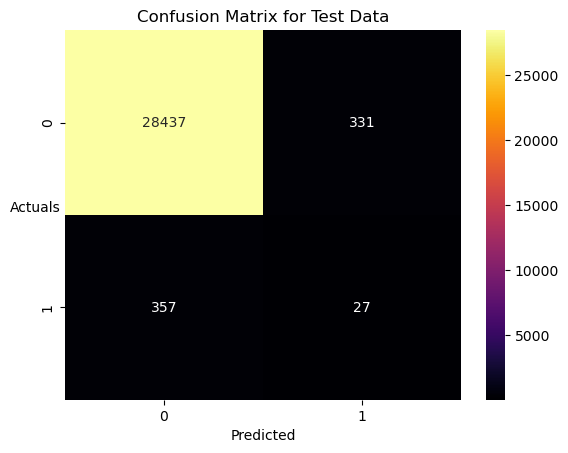

In [163]:
# Plot confusion matrix for the test data
sns.heatmap(metrics.confusion_matrix(y_test, y_class_test_pred), annot=True, fmt='.5g', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.title('Confusion Matrix for Test Data')
plt.show()

In [164]:
# Updated classification report for train data
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(metrics.classification_report(y_res, y_class_train_pred))
print('======================================================\n')

# Updated classification report for test data
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(metrics.classification_report(y_test, y_class_test_pred))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     67125
         1.0       0.98      0.98      0.98     44973

    accuracy                           0.98    112098
   macro avg       0.98      0.98      0.98    112098
weighted avg       0.98      0.98      0.98    112098


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     28768
         1.0       0.08      0.07      0.07       384

    accuracy                           0.98     29152
   macro avg       0.53      0.53      0.53     29152
weighted avg       0.98      0.98      0.98     29152



AUC for training data: 0.998


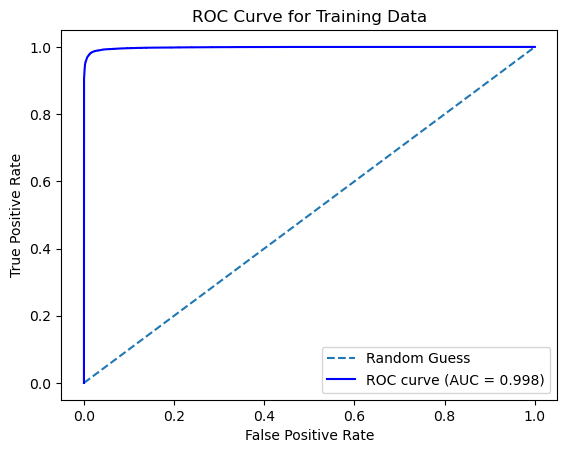

In [165]:
# Predict probabilities for the positive class
probs = best_gradboost_model.predict_proba(X_train1)[:, 1]

# Calculate AUC score
train_auc = roc_auc_score(y_res, probs)
print('AUC for training data: {:.3f}'.format(train_auc))

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.plot(train_fpr, train_tpr, label='ROC curve (AUC = {:.3f})'.format(train_auc), color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc='lower right')
plt.show()

AUC for testing data: 0.821


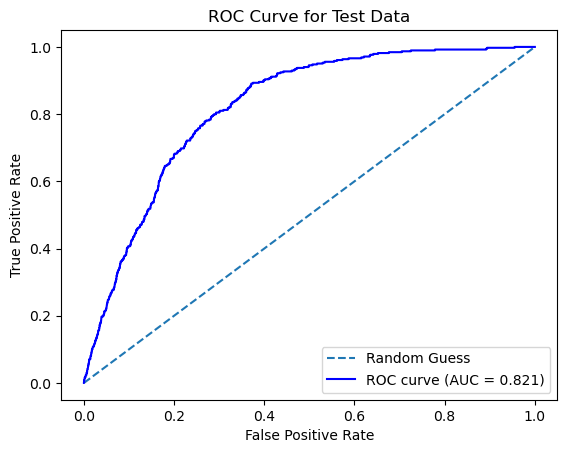

In [166]:
# Predict probabilities for the positive class
probs = best_gradboost_model.predict_proba(X_test1)[:, 1]

# Calculate AUC score
test_auc = roc_auc_score(y_test, probs)
print('AUC for testing data: {:.3f}'.format(test_auc))

# Calculate ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.plot(test_fpr, test_tpr, label='ROC curve (AUC = {:.3f})'.format(test_auc), color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc='lower right')
plt.show()

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     67125
         1.0       0.99      0.97      0.98     44973

    accuracy                           0.98    112098
   macro avg       0.98      0.98      0.98    112098
weighted avg       0.98      0.98      0.98    112098




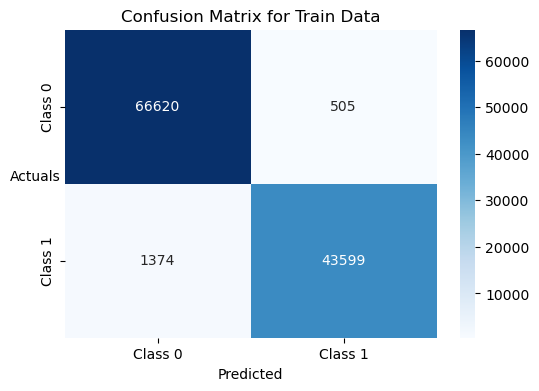

In [167]:
# Generate binary class predictions based on the threshold of 0.5
y_class_train_pred = [1 if prob > 0.5 else 0 for prob in train_probs_grad]

# Generate classification report
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(metrics.classification_report(y_res, y_class_train_pred))
print('======================================================\n')

# Confusion Matrix
conf_matrix_train = metrics.confusion_matrix(y_res, y_class_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.title('Confusion Matrix for Train Data')
plt.show()

Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     28768
         1.0       0.07      0.06      0.06       384

    accuracy                           0.98     29152
   macro avg       0.53      0.52      0.53     29152
weighted avg       0.98      0.98      0.98     29152




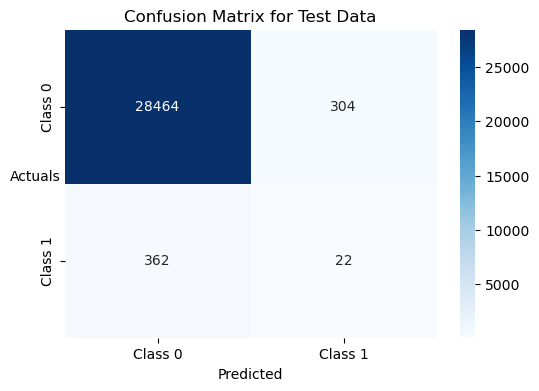

In [168]:
# Generate binary class predictions for the test set based on the threshold of 0.5
y_class_test_pred = [1 if prob > 0.5 else 0 for prob in test_probs_grad]

# Generate classification report
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(metrics.classification_report(y_test, y_class_test_pred))
print('======================================================\n')

# Confusion Matrix
conf_matrix_test = metrics.confusion_matrix(y_test, y_class_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0)
plt.title('Confusion Matrix for Test Data')
plt.show()

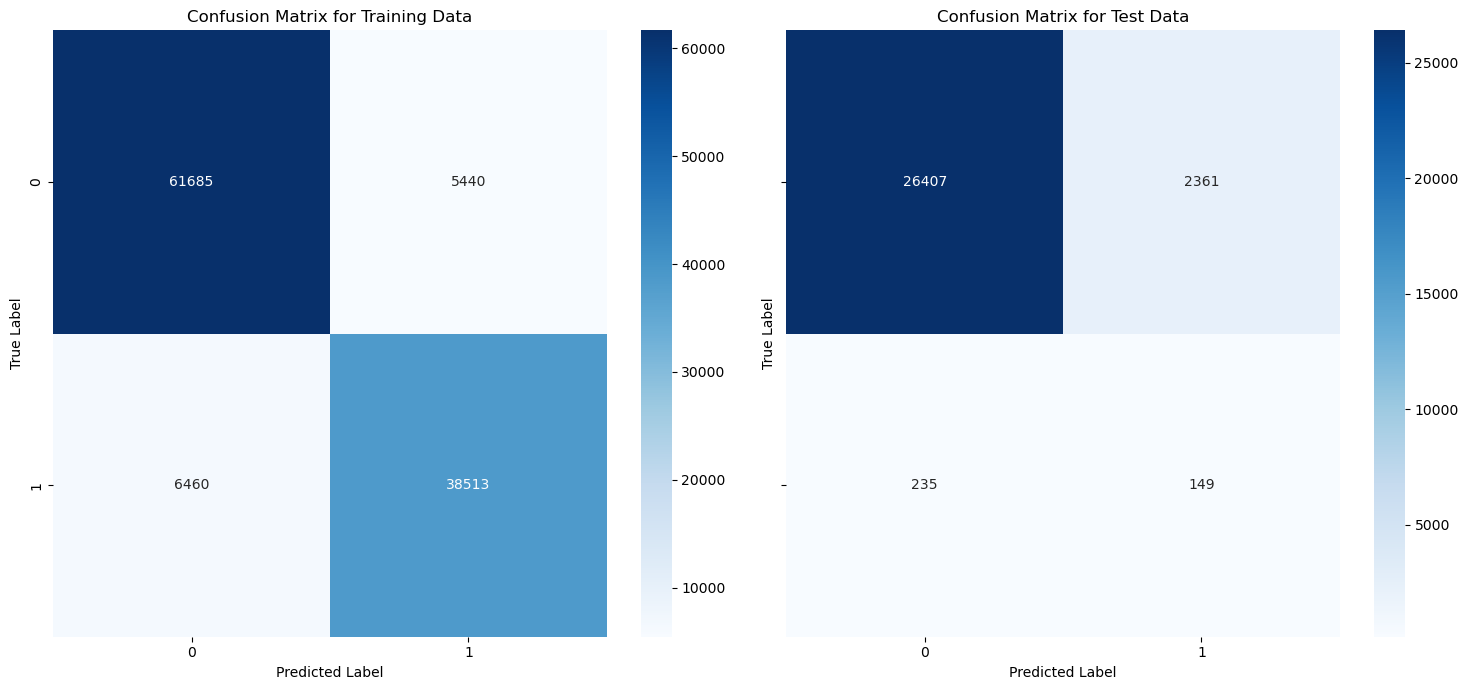

In [169]:
# Create a figure with two subplots side by side
f, a = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 7))

# Plotting confusion matrix for Training Data
conf_matrix_train = metrics.confusion_matrix(y_res, train_pred_grad)
sns.heatmap(conf_matrix_train, annot=True, fmt='.5g', cmap='Blues', ax=a[0])
a[0].set_title('Confusion Matrix for Training Data')
a[0].set_xlabel('Predicted Label')
a[0].set_ylabel('True Label')

# Plotting confusion matrix for Test Data
conf_matrix_test = metrics.confusion_matrix(y_test, test_pred_grad)
sns.heatmap(conf_matrix_test, annot=True, fmt='.5g', cmap='Blues', ax=a[1])
a[1].set_title('Confusion Matrix for Test Data')
a[1].set_xlabel('Predicted Label')
a[1].set_ylabel('True Label')

# Display the plots
plt.tight_layout()
plt.show()

In [170]:
feature_importances = pd.DataFrame(
    best_gradboost_model.feature_importances_, 
    columns=["Imp"], 
    index=X_train1.columns
).sort_values('Imp', ascending=False)

print(feature_importances)

                                 Imp
num_active_inv                  0.24
num_arch_ok_0_12m               0.23
age                             0.15
status_max_archived_0_24_months 0.15
num_arch_ok_12_24m              0.08
max_paid_inv_0_24m              0.05
avg_payment_span_0_12m          0.05
time_hours                      0.03
status_max_archived_0_6_months  0.02
acct_amt_added_12_24m           0.01
